# Gibson Namasake

# CLIMATE WATCH RECOMMENDATION SYSTEM



# _______________________________

# Introduction

> __ClimateWatch Recommendation System__ is an Integrated Climate News Analysis, Information Retrieval System, classification and recommendationatio system. The system focuses on analyzing media coverage trends on climate news, identifying topics/areas with low coverage, and low sentiments, and make recommendations to different stakeholders to boost the coverage and support holistic intervenstions for all areas.

__Purpose__: 
> Media plays a key role in climate change through informing the public, Raising Awareness, Influencing Public Opinion, education the masses etc. if media does not cover all aspects that entail climate change, then some areas will be left out which eventually returds the progress to holistic climate change. The purpose of this system is to track media coverage of all climate change areas to support holistic interventions to the effects of climate change.

 __AIM:__ 
>The aim is to identify topics that are not receiving adequate media attention or have low popularity in media coverage and make recommendations to increase their coverage.

__Project Overview:__
>i.	Your project involves analyzing and recommending topics related to climate change.
>ii.	The topics are categorized into two clusters, and within these clusters, there are ten specific topics.
>iii.	Your aim is to identify topics that are not receiving adequate attention or have low popularity in media coverage and make recommendations to increase their coverage.



__Overall Steps:__

>1. Data Preprocesssing
>>* Data cleaning
>>* Text Cleaning and formating
>>* Feature engineering
>2. Topic identification
>>* Document vectors
>>* K-Means classification
>>* Topic modeling
>3. Trend Analysis
>>* Topic popularity analysis to determine how each topic is covered by different major media houses
>>* Popularity Score assignment
>4. Sentiment analysis to understand the kind of sentiment behind each topic
>>* Training data preparation
>>* Model trainig: Logistic regression, random Forest, SVM, Naive Bayes, XGBoost
>>* Predict the sentiment- new sentiment feature
>5. Recommendation Strategy
>>* Develop the recommendation strategy to guide the system recommendations
>6. Recommendation system- Generate recommendations to different stakeholders to boost each topic coverage.
>>* ANN model
>7. ANN Model Application
>>* Feature relationships- input Embedding weights, real time embeddings
>>* Cosine similarties for to draw feature relationships
>>* Low coverage and low sentiment coverage areas
>>* System integrations and final output



The data contains short snippets of news in CSV files from 2009 to Jan 2020 from different news stations stored. A total of 418 CSV files

__Dataset Feature Name Descriptions__

>* __URL:__ Link to the news archive
>* __MatchDateTime:__ Date and time of airing
>* __Station:__ News Station
>* __Show:__ Name of the show aired on
>* __IAShowID:__ Custom Show ID in archive
>* __IAPreviewThumb:__ Link to the thumbnail image
>* __Snippet:__ Actual snippet of news published and aired

__Dataset source:__ https://www.kaggle.com/datasets/amritvirsinghx/environmental-news-nlp-dataset

# __________________

# DATA PREPROCESSING

## Libraries

In [18]:
%%time
#Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, Dot, Flatten, Dense, BatchNormalization, Activation, Lambda
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# from tensorflow.keras.layers import Embedding, Input, Dot, Flatten, Dense, BatchNormalization, Activation, Concatenate



CPU times: total: 15.6 ms
Wall time: 16.7 ms


In [19]:
np.random.seed(42)

## Load Datasets

In [20]:
%%time
#List and Count the number of datasets to load and merge
file_count = 0

for dirname, _, filenames in os.walk('Project Data/TelevisionNews'):
    for filename in filenames:
        file_count += 1
        print(os.path.join(dirname, filename))


Project Data/TelevisionNews\BBCNEWS.201701.csv
Project Data/TelevisionNews\BBCNEWS.201702.csv
Project Data/TelevisionNews\BBCNEWS.201703.csv
Project Data/TelevisionNews\BBCNEWS.201704.csv
Project Data/TelevisionNews\BBCNEWS.201705.csv
Project Data/TelevisionNews\BBCNEWS.201706.csv
Project Data/TelevisionNews\BBCNEWS.201707.csv
Project Data/TelevisionNews\BBCNEWS.201708.csv
Project Data/TelevisionNews\BBCNEWS.201709.csv
Project Data/TelevisionNews\BBCNEWS.201710.csv
Project Data/TelevisionNews\BBCNEWS.201711.csv
Project Data/TelevisionNews\BBCNEWS.201712.csv
Project Data/TelevisionNews\BBCNEWS.201801.csv
Project Data/TelevisionNews\BBCNEWS.201802.csv
Project Data/TelevisionNews\BBCNEWS.201803.csv
Project Data/TelevisionNews\BBCNEWS.201804.csv
Project Data/TelevisionNews\BBCNEWS.201805.csv
Project Data/TelevisionNews\BBCNEWS.201806.csv
Project Data/TelevisionNews\BBCNEWS.201807.csv
Project Data/TelevisionNews\BBCNEWS.201808.csv
Project Data/TelevisionNews\BBCNEWS.201809.csv
Project Data/

In [21]:
%%time
#Count number of files to load
print(f"Total number of files: {file_count}")


Total number of files: 418
CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
%%time
# Directory where your CSV files are located
directory = 'Project Data/TelevisionNews'

# Initialize an empty list to store DataFrames from each CSV file
dfs = []

# Iterate through each CSV file in the directory
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        if filename.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(dirname, filename)

            try:
                # Read the CSV file into a DataFrame and append it to the list
                df = pd.read_csv(file_path)
                if not df.empty:
                    dfs.append(df)
            except pd.errors.EmptyDataError:
                print(f"Skipping empty file: {file_path}")

# Concatenate all DataFrames in the list into one large DataFrame
if dfs:
    data = pd.concat(dfs, ignore_index=True)
else:
    print("No valid CSV files found in the directory.")


Skipping empty file: Project Data/TelevisionNews\CNN.200910.csv
CPU times: total: 3.83 s
Wall time: 4.09 s


## ________________________________

## Dataset Overview

### Check merged_df

In [23]:
%%time
data.head(2)

CPU times: total: 0 ns
Wall time: 495 µs


URL       MatchDateTime  \
0  https://archive.org/details/BBCNEWS_20170131_0...   1/31/2017 5:53:28   
1  https://archive.org/details/BBCNEWS_20170118_1...  1/18/2017 19:21:01   

   Station      Show                          IAShowID  \
0  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   
1  BBCNEWS  BBC News  BBCNEWS_20170118_190000_BBC_News   

                                      IAPreviewThumb  \
0  https://archive.org/download/BBCNEWS_20170131_...   
1  https://archive.org/download/BBCNEWS_20170118_...   

                                             Snippet  
0  beena part to do. the airline industry has not...  
1  it's beaten it by about 0.1, 0.12 degrees cels...

In [24]:
%%time
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94858 entries, 0 to 94857
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL             94858 non-null  object
 1   MatchDateTime   94858 non-null  object
 2   Station         94858 non-null  object
 3   Show            94833 non-null  object
 4   IAShowID        94858 non-null  object
 5   IAPreviewThumb  94858 non-null  object
 6   Snippet         94858 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB
CPU times: total: 156 ms
Wall time: 146 ms


In [25]:
%%time
data.Show.nunique(), data.Station.nunique()

CPU times: total: 15.6 ms
Wall time: 15.9 ms


(627, 4)

In [235]:
%%time
#Check data distribution across the stations
data['Station'].value_counts()

CPU times: total: 109 ms
Wall time: 296 ms


MSNBC      26429
FOXNEWS    25865
BBCNEWS    23260
CNN        19304
Name: Station, dtype: int64

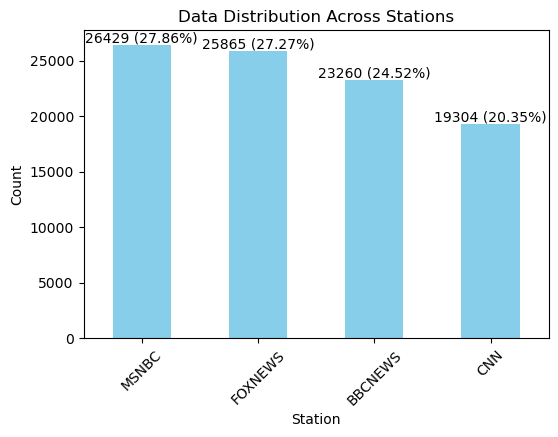

In [27]:
# Get the value counts
station_counts = data['Station'].value_counts()
# Calculate the percentage
total = station_counts.sum()
percentages = (station_counts / total) * 100

# Create a bar chart
plt.figure(figsize=(6, 4))
station_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Station')
plt.ylabel('Count')
plt.title('Data Distribution Across Stations')
plt.xticks(rotation=45)

# Add data labels to the bars
# for i, count in enumerate(station_counts):
#     plt.text(i, count, str(count), ha='center', va='bottom')
    
# Add data labels with percentages
for i, (count, percentage) in enumerate(zip(station_counts, percentages)):
    label = f"{count} ({percentage:.2f}%)"
    plt.text(i, count, label, ha='center', va='bottom')

plt.show()

In [340]:
%%time
#Check data distribution across top 10 shows

data['Show'].value_counts().head(10)

CPU times: total: 62.5 ms
Wall time: 219 ms


BBC News                          7197
All In With Chris Hayes           3449
The Five                          2217
Hardball With Chris Matthews      2138
The OReilly Factor                2087
Hannity                           2054
Special Report With Bret Baier    2053
Morning Joe                       2012
The Rachel Maddow Show            1941
CNN Newsroom                      1765
Name: Show, dtype: int64

In [341]:
%%time
#Check data distribution across last 10 shows
data['Show'].value_counts().tail(10)

CPU times: total: 15.6 ms
Wall time: 12.2 ms


The Kennedy Who Changed the World                      1
Dateline On Assignment                                 1
BBC Election 2019                                      1
Hardball College Tour                                  1
CNN Newsroom With Don Lemon                            1
Election Night in America 2014                         1
The Sixties                                            1
Americas Choice 2016 Indiana Primary                   1
Americas Choice 2016 Republican National Convention    1
MSNBC Live with David Gura                             1
Name: Show, dtype: int64

In [30]:
%%time
#Check number of shows in total

len(data['Show'].value_counts())

CPU times: total: 0 ns
Wall time: 6.06 ms


627

In [31]:
%%time
#Shows that appear less than 5 times
show_counts = data['Show'].value_counts()
shows_appearing_less_than_10_times = show_counts[show_counts < 5 ]

count_of_shows_appearing_less_than_10 = len(shows_appearing_less_than_10_times)
print(count_of_shows_appearing_less_than_10)

208
CPU times: total: 31.2 ms
Wall time: 16.6 ms


### Check Missing entries

In [32]:
%%time
#Check Missing values
missing_data = data.isnull().sum()
print(missing_data)

URL                0
MatchDateTime      0
Station            0
Show              25
IAShowID           0
IAPreviewThumb     0
Snippet            0
dtype: int64
CPU times: total: 125 ms
Wall time: 135 ms


### Check duplicates

In [33]:
%%time
#Check presence of duplicates
data['Snippet'].duplicated().value_counts()

CPU times: total: 46.9 ms
Wall time: 50.1 ms


False    90863
True      3995
Name: Snippet, dtype: int64

### Check Unique values

In [34]:
%%time
#Check for categorical features
data.nunique()

CPU times: total: 391 ms
Wall time: 442 ms


URL               94858
MatchDateTime     94565
Station               4
Show                627
IAShowID          35574
IAPreviewThumb    86219
Snippet           90863
dtype: int64

### Observations: 
>* 94858 Rows and 7 Columns
>* Missing entries under Show feature
>* There are duplicates on Snippet feature
>* MatchDateTime is in object datatype and not datetime
>* URL and IAPreviewThumb features are URL links
>* There is no target variable

## _____________________________

## Data Cleaning

In [35]:
%%time
#Create a new dataframe: merged_df
merged_df = data.copy()

CPU times: total: 15.6 ms
Wall time: 22.8 ms


### Change MatchDateTime to datetime dtype

In [36]:
%%time
#Convert MatchDateTime to datetime format
merged_df['MatchDateTime'] = pd.to_datetime(merged_df['MatchDateTime'])

CPU times: total: 12.2 s
Wall time: 12.2 s


In [37]:
%%time
#Confirm MatchDateTime is in datetime
merged_df.dtypes

CPU times: total: 0 ns
Wall time: 0 ns


URL                       object
MatchDateTime     datetime64[ns]
Station                   object
Show                      object
IAShowID                  object
IAPreviewThumb            object
Snippet                   object
dtype: object

### Remove Missing entries

In [38]:
%%time
#Check rows with missing values
rows_with_missing_show = merged_df[merged_df['Show'].isnull()]
len(rows_with_missing_show)

CPU times: total: 15.6 ms
Wall time: 15.7 ms


25

In [39]:
%%time
#Display rows with missing values
rows_with_missing_show.head()

CPU times: total: 0 ns
Wall time: 0 ns


URL       MatchDateTime  \
12837  https://archive.org/details/BBCNEWS_20190503_0... 2019-05-03 03:26:47   
12838  https://archive.org/details/BBCNEWS_20190503_0... 2019-05-03 03:27:20   
12839  https://archive.org/details/BBCNEWS_20190503_0... 2019-05-03 04:18:50   
12993  https://archive.org/details/BBCNEWS_20190503_0... 2019-05-03 04:39:21   
42343  https://archive.org/details/CNNW_20200101_0300... 2020-01-01 03:08:44   

       Station Show                 IAShowID  \
12837  BBCNEWS  NaN  BBCNEWS_20190503_023500   
12838  BBCNEWS  NaN  BBCNEWS_20190503_023500   
12839  BBCNEWS  NaN  BBCNEWS_20190503_023500   
12993  BBCNEWS  NaN  BBCNEWS_20190503_043500   
42343      CNN  NaN     CNNW_20200101_030000   

                                          IAPreviewThumb  \
12837  https://archive.org/download/BBCNEWS_20190503_...   
12838  https://archive.org/download/BBCNEWS_20190503_...   
12839  https://archive.org/download/BBCNEWS_20190503_...   
12993  https://archive.org/download/BBCNEWS_20190503_...   
42343  https://archive.org/download/CNNW_20200101_030...   

                                                 Snippet  
12837  these seats but these are local campaigns that...  
12838  800 votes. we went from below them to above th...  
12839  people are turning to us. the lib dems have go...  
12993  greens and it will be interesting to see how t...  
42343  lansbury, former presidential hopeful bob dole...

In [40]:
%%time
# Check if there are shows at similar time for these shows on the same station
duplicate_show_times = merged_df.groupby(['MatchDateTime', 'Station', 'Show']).size().reset_index(name='Count')

shows_with_same_time = duplicate_show_times[duplicate_show_times['Count'] > 1]
shows_with_same_time

CPU times: total: 93.8 ms
Wall time: 99.9 ms


MatchDateTime  Station  \
30021 2014-11-12 07:00:30      CNN   
30769 2014-12-14 09:00:58      CNN   
34195 2015-07-22 07:00:14      CNN   
37737 2015-11-30 10:00:15      CNN   
37814 2015-11-30 12:15:00    MSNBC   
37815 2015-11-30 12:15:31    MSNBC   
37816 2015-11-30 12:15:50    MSNBC   
37819 2015-11-30 12:16:51    MSNBC   
37820 2015-11-30 12:17:02    MSNBC   
37821 2015-11-30 12:18:24    MSNBC   
39590 2016-02-28 21:00:35      CNN   
39591 2016-02-28 21:00:55      CNN   
42498 2016-10-12 17:45:46  FOXNEWS   
42499 2016-10-12 17:46:00  FOXNEWS   
42501 2016-10-12 17:46:37  FOXNEWS   
42503 2016-10-12 17:46:54  FOXNEWS   
44222 2016-12-11 19:12:32  FOXNEWS   
47657 2017-04-29 20:00:28    MSNBC   
47676 2017-04-29 22:00:57      CNN   
50212 2017-06-02 22:00:45      CNN   
50712 2017-06-03 16:00:32      CNN   
56334 2017-12-29 23:00:44      CNN   
57180 2018-03-24 09:00:55      CNN   
58071 2018-06-08 09:00:31      CNN   
60093 2018-10-05 22:00:56      CNN   
62288 2018-11-24 10:00:59      CNN   
70108 2019-04-01 07:00:44      CNN   
80094 2019-08-12 09:00:46  FOXNEWS   
92032 2019-12-22 20:00:35      CNN   
92049 2019-12-22 23:00:15      CNN   

                                                    Show  Count  
30021                                     CNNI Simulcast      2  
30769                                     CNNI Simulcast      2  
34195                                  CNN Newsroom Live      2  
37737  Early Start With John Berman and Christine Romans      2  
37814                                        Morning Joe      2  
37815                                        Morning Joe      2  
37816                                        Morning Joe      2  
37819                                        Morning Joe      2  
37820                                        Morning Joe      2  
37821                                        Morning Joe      2  
39590              CNN Newsroom With Fredricka Whitfield      2  
39591              CNN Newsroom With Fredricka Whitfield      2  
42498                                      Happening Now      2  
42499                                      Happening Now      2  
42501                                      Happening Now      2  
42503                                      Happening Now      2  
44222                 Fox News Sunday With Chris Wallace      2  
47657                                         MSNBC Live      2  
47676                   Situation Room With Wolf Blitzer      2  
50212                   Situation Room With Wolf Blitzer      2  
50712              CNN Newsroom With Fredricka Whitfield      2  
56334                   Situation Room With Wolf Blitzer      2  
57180                                  CNN Newsroom Live      2  
58071  Early Start with Christine Romans and Dave Briggs      2  
60093                   Situation Room With Wolf Blitzer      2  
62288                                  CNN Newsroom Live      2  
70108                                  CNN Newsroom Live      2  
80094                              Fox and Friends First      2  
92032              CNN Newsroom With Fredricka Whitfield      2  
92049                      CNN Newsroom With Ana Cabrera      2

In [41]:
%%time
# Drop entries with these null values since there are no similar shows at the same time as these shows on the same stations
merged_df = merged_df.dropna(subset=['Show'])

merged_df['Show'].isnull().sum()

CPU times: total: 62.5 ms
Wall time: 46.9 ms


0

In [42]:
%%time
#Recheck dataframe dimenstions after droping missing entries
merged_df.shape

CPU times: total: 0 ns
Wall time: 0 ns


(94833, 7)

### Duplicate entries

In [43]:
%%time
# Identify duplicate Snippet entries
duplicate_snippets = merged_df[merged_df.duplicated(subset=['Snippet'], keep=False)]

duplicate_snippets

CPU times: total: 15.6 ms
Wall time: 15.7 ms


URL       MatchDateTime  \
101    https://archive.org/details/BBCNEWS_20170110_0... 2017-01-10 03:29:26   
102    https://archive.org/details/BBCNEWS_20170110_0... 2017-01-10 03:30:44   
288    https://archive.org/details/BBCNEWS_20170212_0... 2017-02-12 01:39:45   
289    https://archive.org/details/BBCNEWS_20170212_2... 2017-02-12 20:42:18   
290    https://archive.org/details/BBCNEWS_20170212_1... 2017-02-12 13:39:31   
...                                                  ...                 ...   
94708  https://archive.org/details/MSNBCW_20200120_14... 2020-01-20 14:29:17   
94758  https://archive.org/details/MSNBCW_20200110_04... 2020-01-10 04:38:32   
94760  https://archive.org/details/MSNBCW_20200101_05... 2020-01-01 05:02:16   
94831  https://archive.org/details/MSNBCW_20200111_04... 2020-01-11 04:51:54   
94840  https://archive.org/details/MSNBCW_20200120_22... 2020-01-20 22:58:20   

       Station                               Show  \
101    BBCNEWS                           BBC News   
102    BBCNEWS                          Reporters   
288    BBCNEWS                    The Travel Show   
289    BBCNEWS                    The Travel Show   
290    BBCNEWS                    The Travel Show   
...        ...                                ...   
94708    MSNBC    MSNBC Live With Stephanie Ruhle   
94758    MSNBC  The 11th Hour With Brian Williams   
94760    MSNBC               Global Citizen Prize   
94831    MSNBC  The 11th Hour With Brian Williams   
94840    MSNBC                          MTP Daily   

                                                IAShowID  \
101                     BBCNEWS_20170110_030000_BBC_News   
102                    BBCNEWS_20170110_033000_Reporters   
288              BBCNEWS_20170212_013000_The_Travel_Show   
289              BBCNEWS_20170212_203000_The_Travel_Show   
290              BBCNEWS_20170212_133000_The_Travel_Show   
...                                                  ...   
94708  MSNBCW_20200120_140000_MSNBC_Live_With_Stephan...   
94758  MSNBCW_20200110_040000_The_11th_Hour_With_Bria...   
94760        MSNBCW_20200101_050000_Global_Citizen_Prize   
94831  MSNBCW_20200111_040000_The_11th_Hour_With_Bria...   
94840                   MSNBCW_20200120_220000_MTP_Daily   

                                          IAPreviewThumb  \
101    https://archive.org/download/BBCNEWS_20170110_...   
102    https://archive.org/download/BBCNEWS_20170110_...   
288    https://archive.org/download/BBCNEWS_20170212_...   
289    https://archive.org/download/BBCNEWS_20170212_...   
290    https://archive.org/download/BBCNEWS_20170212_...   
...                                                  ...   
94708  https://archive.org/download/MSNBCW_20200120_1...   
94758  https://archive.org/download/MSNBCW_20200110_0...   
94760  https://archive.org/download/MSNBCW_20200101_0...   
94831  https://archive.org/download/MSNBCW_20200111_0...   
94840  https://archive.org/download/MSNBCW_20200120_2...   

                                                 Snippet  
101    of huge hydro-electric dams. it argues the pro...  
102    of huge hydro-electric dams. it argues the pro...  
288    take a budget airline, and then perhaps hire a...  
289    take a budget airline, and then perhaps hire a...  
290    take a budget airline, and then perhaps hire a...  
...                                                  ...  
94708  trump:'all of this with the global warming. a ...  
94758  this melting pot of impacted species. everywhe...  
94760  the world's most inspiring activists, those wh...  
94831  everywhere is going to get touched by climate ...  
94840  in more than 50 years. as a leader in the figh...  

[6711 rows x 7 columns]

In [44]:
%%time
# Check if the simalar content is being aired on the same station, at the same time on the same show name.
# Initialize a list to store similar entries
similar_entries = []

# Iterate through duplicate Snippet groups
for snippet, group in duplicate_snippets.groupby('Snippet'):
    # Check if all other features are similar (excluding the Snippet itself)
    if group.drop(columns=['Snippet']).nunique().eq(1).all():
        # If all other features are similar, consider them as similar entries
        similar_entries.append(group)      

# Print similar entries or indicate when there are no completely similar entries
if len(similar_entries) > 0:
    for entry in similar_entries:
        print(entry)
else:
    print('No completely similar entries on the same station, same showing time and with same show name')

No completely similar entries on the same station, same showing time and with same show name
CPU times: total: 4.39 s
Wall time: 4.38 s


>* These means they are similar content but aired on different shows, at different times on the same station targeting different audiences.
>* Due to our project objective of generating and recoming the most popular station, all duplicated will be dropped

In [45]:
%%time
# Identify duplicate Snippet entries
duplicate_snippets = merged_df[merged_df.duplicated(subset=['Snippet'], keep=False)]

# Drop the duplicate rows
merged_df = merged_df.drop_duplicates(subset=['Snippet'], keep='first')
merged_df.shape

CPU times: total: 46.9 ms
Wall time: 47.5 ms


(90847, 7)

In [46]:
%%time
#Check presence of duplicates
merged_df['Snippet'].duplicated().value_counts()

CPU times: total: 31.2 ms
Wall time: 9.38 ms


False    90847
Name: Snippet, dtype: int64

### Drop IAPreviewThumb

In [47]:
%%time
# Remove IAPreviewThumb as its not important
merged_df.drop(['IAPreviewThumb'], axis=1, inplace = True)

CPU times: total: 15.6 ms
Wall time: 13.6 ms


In [48]:
%%time
merged_df.head(3)

CPU times: total: 0 ns
Wall time: 0 ns


URL       MatchDateTime  \
0  https://archive.org/details/BBCNEWS_20170131_0... 2017-01-31 05:53:28   
1  https://archive.org/details/BBCNEWS_20170118_1... 2017-01-18 19:21:01   
2  https://archive.org/details/BBCNEWS_20170105_2... 2017-01-05 21:48:46   

   Station            Show                                IAShowID  \
0  BBCNEWS        BBC News        BBCNEWS_20170131_054500_BBC_News   
1  BBCNEWS        BBC News        BBCNEWS_20170118_190000_BBC_News   
2  BBCNEWS  Outside Source  BBCNEWS_20170105_213000_Outside_Source   

                                             Snippet  
0  beena part to do. the airline industry has not...  
1  it's beaten it by about 0.1, 0.12 degrees cels...  
2  contact more than expected, how. your co nta c...

## _______________________________

## Text Preprocessing

In [49]:
%%time
#Create a new DataFrame for cleaning
cleaned_df = merged_df.copy()
cleaned_df.head(2)

CPU times: total: 15.6 ms
Wall time: 15.7 ms


URL       MatchDateTime  \
0  https://archive.org/details/BBCNEWS_20170131_0... 2017-01-31 05:53:28   
1  https://archive.org/details/BBCNEWS_20170118_1... 2017-01-18 19:21:01   

   Station      Show                          IAShowID  \
0  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   
1  BBCNEWS  BBC News  BBCNEWS_20170118_190000_BBC_News   

                                             Snippet  
0  beena part to do. the airline industry has not...  
1  it's beaten it by about 0.1, 0.12 degrees cels...

### Remove unwanted parts

In [50]:
%%time
nltk.download('punkt')
nltk.download('stopwords')

def text_preprocessing(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

#     data['text'] = data['text'].apply(lambda x: x.lower())
#     data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

    # Punctuation and special character removal but keep decimal numbers in the text while removing other non-alphanumeric characters
    tokens = [word for word in tokens if word.isalnum() or re.match(r'\d+\.\d+', word)]


    # Numbers removal
#     tokens = [word for word in tokens if not word.isdigit()]

    # Remove extra white spaces
    cleaned_text = ' '.join(tokens)
    cleaned_text = re.sub(' +', ' ', cleaned_text)

    return ' '.join(tokens)

# Apply the text preprocessing function to the 'Snippet' column
cleaned_df['Cleaned_Snippet'] = cleaned_df['Snippet'].apply(text_preprocessing)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gibson.namasake\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gibson.namasake\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: total: 51.8 s
Wall time: 52.8 s


>* NOTE: In our project we shall do sentiment analysis or topic modeling, hence retaining stop words is essential to preserve meaning and context

In [51]:
%%time
#Display a few rows of the Cleaned_Snippet feature
cleaned_df.Cleaned_Snippet.head(2)

CPU times: total: 0 ns
Wall time: 0 ns


0    beena part to do the airline industry has not ...
1    it beaten it by about 0.1 0.12 degrees celsius...
Name: Cleaned_Snippet, dtype: object

In [52]:
%%time
# Display the entire content of the 'Cleaned_Snippet' column without truncation
pd.set_option('display.max_colwidth', None)
cleaned_df['Cleaned_Snippet']

CPU times: total: 0 ns
Wall time: 0 ns


0                                                                                                                                                                                                                      beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol
1                                                                                                               it beaten it by about 0.1 0.12 degrees celsius which does seem like a lot but in terms of the yearly variations it is actually huge part of this rise was caused by an el nino event a warm ocean current that disrupts the world weather but scientists say greenhouse gases
2                                 contact more than expected how your co nta ct le ns more than expected how your contact lens has come out of your eye good catch what does i do in terms of policy already there is a pushback on global w

### Remove Stop Words

In [53]:
%%time
# Function to remove stop words and join tokens into a single string
def remove_stopwords_and_join(tokens):
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stop words from the Cleaned_Snippet column and join the tokens
cleaned_df['No_StopWord'] = cleaned_df['Cleaned_Snippet'].apply(str.split).apply(remove_stopwords_and_join)


CPU times: total: 40.5 s
Wall time: 41.1 s


In [54]:
%%time
cleaned_df['No_StopWord'].head(2)

CPU times: total: 0 ns
Wall time: 0 ns


0                                                                                   beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol
1    beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases
Name: No_StopWord, dtype: object

### Lemmatization

In [55]:
%%time
#Display the cleaned DataFrame
cleaned_df.head(1)

CPU times: total: 0 ns
Wall time: 0 ns


URL  \
0  https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   

        MatchDateTime  Station      Show                          IAShowID  \
0 2017-01-31 05:53:28  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   

                                                                                                                                                                        Snippet  \
0  beena part to do. the airline industry has not been a part of this move to reduce carbon and teal last year. -- and teal. they agreed on a deal to curb greenhouse gases sol   

                                                                                                                                                          Cleaned_Snippet  \
0  beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol   

                                                                                                     No_StopWord  
0  beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol

### Word lengths

In [56]:
%%time
# Function to calculate the average word length
def calculate_average_word_length(text):
    words = text.split()  # Split the text into words
    word_lengths = [len(word) for word in words]  # Calculate the length of each word
    if len(word_lengths) == 0:
        return 0  # Handle the case where there are no words
    else:
        return sum(word_lengths) / len(word_lengths)  # Calculate the average word length

# Calculate the average word length and add it to a new column
cleaned_df['Average_Word_Length'] = cleaned_df['Cleaned_Snippet'].apply(calculate_average_word_length)

# Print the DataFrame with the average word length column
cleaned_df.head(1)

CPU times: total: 594 ms
Wall time: 589 ms


URL  \
0  https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   

        MatchDateTime  Station      Show                          IAShowID  \
0 2017-01-31 05:53:28  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   

                                                                                                                                                                        Snippet  \
0  beena part to do. the airline industry has not been a part of this move to reduce carbon and teal last year. -- and teal. they agreed on a deal to curb greenhouse gases sol   

                                                                                                                                                          Cleaned_Snippet  \
0  beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol   

                                                                                                     No_StopWord  \
0  beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   

   Average_Word_Length  
0             3.911765

In [57]:
%%time
# Calculate text lengths and add a 'Text_Length' column
cleaned_df['Text_Length'] = cleaned_df['Cleaned_Snippet'].apply(lambda x: len(x))

# Calculate the average text length
average_text_length = cleaned_df['Text_Length'].mean()
average_text_length

CPU times: total: 62.5 ms
Wall time: 63.1 ms


226.261956916574

### Vocabulary Size

In [58]:
%%time
from nltk.tokenize import word_tokenize

# Function to tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the sentences in X_train and create a set of unique words
unique_words_set = set(word for sentence in cleaned_df['Cleaned_Snippet'] for word in tokenize_text(sentence))

# Get the total number of unique words
num_unique_words = len(unique_words_set)

print("Vocabulary:", num_unique_words)


Vocabulary: 41855
CPU times: total: 20.8 s
Wall time: 21 s


### Text lengths

In [59]:
%%time
#Text lengths
print("\nAverage Text Length:", average_text_length)
# print("\nLongest Text Length:", cleaned_df['Text_Length'].max())
# print("\nShortest Text Length:", cleaned_df['Text_Length'].min())


Average Text Length: 226.261956916574
CPU times: total: 31.2 ms
Wall time: 11.3 ms


In [60]:
%%time
#Display the vocabulary size and text lengths
cleaned_df[['Cleaned_Snippet', 'Text_Length']]

CPU times: total: 46.9 ms
Wall time: 24.5 ms


Cleaned_Snippet  \
0                                                                                                                                                                                                                    beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol   
1                                                                                                             it beaten it by about 0.1 0.12 degrees celsius which does seem like a lot but in terms of the yearly variations it is actually huge part of this rise was caused by an el nino event a warm ocean current that disrupts the world weather but scientists say greenhouse gases   
2                               contact more than expected how your co nta ct le ns more than expected how your contact lens has come out of your eye good catch what does i do in terms of policy already there is a pushback on global warming interesting to see this against the backdrop of president trump coming into the oval office saying things like climate change is something   
3                                                                                                                                                                                                                                 where every time a marketplace is closed down another appears to replace it inafew in a few minutes we are going to be talking about global warming it is   
4                                                                                                                                                                                                                      applause climate change a controversial issue which has seen him at odds with the incoming president was next on the speech agenda take the challenge climate change   
...                                                                                                                                                                                                                                                                                                                                                                                     ...   
94853                                                                          they could be facing the climate change has made it worse arson lightning strikes they have a fire season but the extreme drought they were in and the extreme heat has made it worse some of the satellite imagery are giving you a sense of how spread out it is all across the country at the same time i   
94854                                                                                         fact that they had a number of decisions thrown back at them by the federal courts saying you must look at the implications of climate change for projects like pipelines you have to do it this administration does want to so it going to say it does have to but in the end the law is the   
94855                                       i think there were missed opportunities to talk about things like puerto rico the earthquakes happening in puerto rico in the context of climate change to talk about immigration which now would be a very interesting conversation to have among this new cohort so i hope moving forward especially when you look at nevada california texas   
94856  potentially reshape the democratic primaries this was something that was focused on a lot of domestic policy a lot about health care climate change about whether or not they could beat donald trump now you have democratic candidates trying to show they can understand foreign policy you have bernie sanders and elizabeth warren calling this an assassination of the general   
94857                                                   beat donald trump but that is the floor not the ceiling the call of our country right now is to

### Create df_init DataFrame

In [61]:
%%time
#Copy cleaned_df DataFrame
df_init = cleaned_df.copy()

CPU times: total: 31.2 ms
Wall time: 16.1 ms


In [62]:
%%time
#Check DF dimensions
df_init.shape

CPU times: total: 0 ns
Wall time: 0 ns


(90847, 10)

In [63]:
%%time
#Check its Columns
df_init.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'Snippet',
       'Cleaned_Snippet', 'No_StopWord', 'Average_Word_Length', 'Text_Length'],
      dtype='object')

In [64]:
%%time
#Drop unwated features
df_init.drop(['Snippet', 'Average_Word_Length', 'Text_Length'], axis=1, inplace=True)

CPU times: total: 15.6 ms
Wall time: 15.9 ms


In [65]:
%%time
#Display resultant DF
df_init.head(1)

CPU times: total: 0 ns
Wall time: 0 ns


URL  \
0  https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   

        MatchDateTime  Station      Show                          IAShowID  \
0 2017-01-31 05:53:28  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   

                                                                                                                                                          Cleaned_Snippet  \
0  beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol   

                                                                                                     No_StopWord  
0  beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol

# __________________________________

# FEATURE ENGINEERING

In [66]:
%%time
df_init.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID',
       'Cleaned_Snippet', 'No_StopWord'],
      dtype='object')

## Year, Month, and Day Features

Extracting year, month, day, and time from the MatchDateTime field is beneficial for trend analysis and understanding how climate-related discussions evolve over time. By breaking down the timestamp into these components, we can perform various time-series analyses and gain insights into temporal patterns and trends related to climate topics. 

Here's how these components will be useful:

>* __Year:__ Analyzing discussions year by year will help reveal long-term trends and changes in climate-related topics. This will help identify when certain topics gained or lost prominence over the years.

>* __Month and Day:__ Analyzing discussions at a monthly or daily level will help discover seasonal or periodic patterns. For example, finding out which kind of climate discussions are more prevalent during specific seasons or on particular dates.

>* __Time (Hour and Minute):__ Examining the time of day when climate-related discussions occur can provide insights into audience engagement. It will help understand when people are most active in discussing climate topics.

In [67]:
%%time
#Year, Month, Day and time Feature

df_init['Year'] = df_init['MatchDateTime'].dt.year
df_init['Month'] = df_init['MatchDateTime'].dt.month
df_init['Day'] = df_init['MatchDateTime'].dt.day
df_init['Time'] = df_init['MatchDateTime'].dt.strftime('%H:%M')  # Extract time in HH:MM format

# Extracting the hour and minute separately:
df_init['Hour'] = df_init['MatchDateTime'].dt.hour
df_init['Minute'] = df_init['MatchDateTime'].dt.minute

CPU times: total: 672 ms
Wall time: 672 ms


In [68]:
%%time
#Season Feature: Winter, Spring, Summer and Autumn

df_init['Season'] = df_init['MatchDateTime'].dt.month.apply(lambda x: (
    'Winter' if (x >= 12 and x <= 2) or (x == 1)
    else 'Spring' if (x >= 3 and x <= 5)
    else 'Summer' if (x >= 6 and x <= 8)
    else 'Autumn'
))

# Print a sample of the updated DataFrame
df_init[['MatchDateTime', 'Season']]


CPU times: total: 62.5 ms
Wall time: 51.3 ms


MatchDateTime  Season
0     2017-01-31 05:53:28  Winter
1     2017-01-18 19:21:01  Winter
2     2017-01-05 21:48:46  Winter
3     2017-01-05 21:13:33  Winter
4     2017-01-11 03:11:51  Winter
...                   ...     ...
94853 2020-01-07 10:27:25  Winter
94854 2020-01-10 01:57:54  Winter
94855 2020-01-15 05:53:44  Winter
94856 2020-01-05 03:55:58  Winter
94857 2020-01-14 05:43:03  Winter

[90847 rows x 2 columns]

In [69]:
%%time
df_init.head(0)

CPU times: total: 31.2 ms
Wall time: 6 ms


Empty DataFrame
Columns: [URL, MatchDateTime, Station, Show, IAShowID, Cleaned_Snippet, No_StopWord, Year, Month, Day, Time, Hour, Minute, Season]
Index: []

In [70]:
%%time
df_init['Season'].value_counts()

CPU times: total: 15.6 ms
Wall time: 15.8 ms


Autumn    43698
Summer    21868
Spring    17692
Winter     7589
Name: Season, dtype: int64

## _____________________________

## TOPIC MODELING:

__STEPS__

__Clustering Using K-Means:__
  >* Apply K-Means clustering algorithm to your Word2Vec word vectors. K-Means aims to group similar words (vectors) in the Snippet Feature into clusters based on their similarity.
  >* The code attempted different numbers of clusters (from 2 to 10) and calculated the silhouette scores for each clustering to determine the best number of clusters.
  >* Silhouette score helps you evaluate the quality of clustering, where higher values indicate better-defined clusters.

 __Selecting the Best Number of Clusters:__
  >* Based on the silhouette scores, you found that the best number of clusters is 2. This means that the K-Means algorithm grouped the words into two clusters, which are the most distinct and well-separated clusters in the data.

 __Understanding the Clusters to generate Cluster labels and Cluster names :__
  >* The final step in the process is to understand and interpret the words within each cluster. By exploring the words in these clusters, you can gain insights into what these clusters represent.
  >* In the context of topic modeling, these clusters may represent different topics or themes present in your text data.

__Use the clusters in topic modeling to generate Topic Names and Topic Labels:__

 >* Clustering techniques like K-Means in topic modeling to group words or documents into topics. Each cluster will represent a different topic.
 >* Finding the best number of clusters is crucial in topic modeling. It determines how topics are identified within the data.
 <* Interpreting the clusters by examining the words within each cluster helps you understand the content and themes represented by each topic.

Overall, these steps are part of the process of discovering topics within your text data using unsupervised machine learning techniques and visualizations, which is a key aspect of topic modeling.

### _____________________________

### Create Document Vectors Using Pretrained Embeddings: Glove Embeddings

#### Loading Pre-trained GloVe Word Vectors

In [74]:
%%time
# import numpy as np

embedding_dim = 100  # Set the dimension to match the dimension of the pre-trained word embeddings (e.g., 100 for GloVe)

# Path to the GloVe file
glove_file = 'glove.6B.100d.txt'

# Create a dictionary to store word vectors
word_to_vec = {}

# Read the GloVe file and store word vectors in the dictionary
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        word_to_vec[word] = vector

CPU times: total: 15.1 s
Wall time: 15.4 s


#### Vectorization of Text Data Using GloVe Embeddings:
After loading the GloVe embeddings, we use them to represent the text data. We vectorize the documents based on these pre-trained word vectors.

In [75]:
%%time
# Vectorize your text data using GloVe embeddings
document_vectors = []
for doc in tokenized_data:
    doc_vector = np.mean([word_to_vec[word] for word in doc if word in word_to_vec], axis=0)
    document_vectors.append(doc_vector)


CPU times: total: 4.69 s
Wall time: 4.8 s


In [76]:
document_vectors

[array([-0.16153371, -0.01583588,  0.25203335, -0.05208939,  0.1041235 ,
        -0.56629634, -0.11429922,  0.2038148 , -0.06715255,  0.13411029,
        -0.05318406, -0.19406088, -0.0317643 , -0.13987882, -0.1116863 ,
        -0.2982537 ,  0.17809772, -0.05992349,  0.00191376, -0.18238574,
         0.29187444, -0.12260813,  0.04554078,  0.19164859,  0.01731728,
         0.12579767, -0.04355628, -0.17873345, -0.13714643, -0.13448933,
        -0.05213277,  0.43962345, -0.20624582, -0.16786483, -0.18471503,
         0.26134422,  0.3207039 ,  0.02953879, -0.06537667, -0.04077828,
        -0.20235763, -0.16375433, -0.07673816,  0.07575317, -0.01738279,
         0.27183402,  0.03711868, -0.04604985, -0.19284482, -0.44753498,
         0.00299322, -0.10515662, -0.18098158,  0.5943193 , -0.27413967,
        -1.599559  , -0.03524889, -0.17012602,  1.1558137 ,  0.40097004,
         0.05191289,  0.17921817, -0.189912  , -0.02512794,  0.41343102,
         0.03319084,  0.20898056,  0.13888878,  0.2

For each document, it calculates the mean (average) of the word vectors of the words in the document, considering only words that have corresponding GloVe embeddings. This results in a numerical vector representation for each document.

#### Confirm Glove embeddings are working

In [77]:
%%time
# Function to get the word vector for a given word
def get_word_vector(word):
    return word_to_vec.get(word, None)

# Calculate cosine similarity between two word vectors
def cosine_similarity(v1, v2):
    if v1 is not None and v2 is not None:
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        if norm_v1 > 0 and norm_v2 > 0:
            return dot_product / (norm_v1 * norm_v2)
    return 0  # Return a default value if vectors are not available

# Function to find most similar words to a given word
def find_similar_words(word, top_n=10):
    if word in word_to_vec:
        word_vector = get_word_vector(word)
        similarities = {}
        for other_word in word_to_vec:
            if other_word != word:
                other_vector = get_word_vector(other_word)
                similarity = cosine_similarity(word_vector, other_vector)
                similarities[other_word] = similarity
        # Sort words by similarity
        similar_words = sorted(similarities, key=similarities.get, reverse=True)
        # Return both the similar words and their similarity scores
        return [(word, similarities[word]) for word in similar_words[:top_n]]
    else:
        return []

# Example usage:
input_word = "peace"
similar_words = find_similar_words(input_word)
print(f"Words similar to '{input_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Words similar to 'peace':
reconciliation: 0.7765944600105286
accord: 0.7573467493057251
talks: 0.744116485118866
unity: 0.7382168769836426
ceasefire: 0.7309715151786804
truce: 0.725864827632904
progress: 0.7246789336204529
negotiations: 0.7207327485084534
cease: 0.7177103757858276
conflict: 0.7151065468788147
CPU times: total: 8.33 s
Wall time: 8.34 s


>* Adopt the document_vectors generated from Pretrained embeddings (GloVe) as opposed to vectord generated from manual embeddings

### Classification of the document_vectors
#### Classify the document_vectors into Classes using KMeans Classification

With the document vectors created using GloVe embeddings, we to apply K-Means clustering to group similar documents together based on these representations. ie. document_vectors are the input data for K-Means clustering.

In [78]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering with different values of K
k_values = [2, 3, 4, 5, 6]  # Adjust the number of clusters to test
best_score = -1  # Initialize the best silhouette score
best_k = None
cluster_labels_dict = {}  # Dictionary to store cluster labels for different K values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(document_vectors)
    score = silhouette_score(document_vectors, cluster_labels)
    
    if score > best_score:
        best_score = score
        best_k = k

    # Store the cluster labels in the dictionary
    cluster_labels_dict[k] = cluster_labels

# Print the best silhouette score and the best number of clusters
print("Best Silhouette Score:", best_score)
print("Best number of clusters:", best_k)

# Access cluster labels for each K value
for k, labels in cluster_labels_dict.items():
    print(f"Cluster labels for K={k}: {labels}")


C:\Users\gibson.namasake\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gibson.namasake\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gibson.namasake\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gibson.namasake\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: Fut

Best Silhouette Score: 0.08881594
Best number of clusters: 2
Cluster labels for K=2: [1 1 0 ... 0 0 0]
Cluster labels for K=3: [0 0 2 ... 1 2 1]
Cluster labels for K=4: [2 2 0 ... 3 0 3]
Cluster labels for K=5: [2 3 0 ... 1 0 1]
Cluster labels for K=6: [0 5 3 ... 4 3 4]
CPU times: total: 1h 1min 2s
Wall time: 18min 22s


>* __Silhouette Score__: The Silhouette Score is a measure of cluster quality. The "Best Silhouette Score" is the highest Silhouette Score achieved among these different K values. It indicates how well a cluster is well-separated and internally cohesive
>* __K Values:__ Different clusters of K, such as 2, 3, 4, 5, and 6 were tested
>* __Best K_value:__ The clustering with K=2 produced clusters that are relatively well-separated and internally cohesive. The "Best number of clusters" refers to the value of K for which obtained the best Silhouette Score

#### Add Feature: Cluster_Labels to the DataFrame

In [79]:
%%time
import numpy as np

# Assuming cluster_labels is a NumPy array
unique_labels = np.unique(cluster_labels)
len(cluster_labels), cluster_labels, unique_labels

CPU times: total: 0 ns
Wall time: 7.06 ms


(90847, array([0, 5, 3, ..., 4, 3, 4]), array([0, 1, 2, 3, 4, 5]))

In [80]:
%%time
from sklearn.cluster import KMeans

#best_k is set to 2.
best_k = 2

# Apply K-Means clustering with the best K value
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(document_vectors)

# Assign cluster labels to your DataFrame
df_init['Cluster_Labels'] = cluster_labels


C:\Users\gibson.namasake\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 17.5 s
Wall time: 3.43 s


In [81]:
%%time
df_init['Cluster_Labels'].value_counts()

CPU times: total: 125 ms
Wall time: 19.9 ms


0    58641
1    32206
Name: Cluster_Labels, dtype: int64

In [82]:
%%time
df_init.head(1)

CPU times: total: 0 ns
Wall time: 0 ns


URL  \
0  https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   

        MatchDateTime  Station      Show                          IAShowID  \
0 2017-01-31 05:53:28  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   

                                                                                                                                                          Cleaned_Snippet  \
0  beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol   

                                                                                                     No_StopWord  \
0  beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   

   Year  Month  Day   Time  Hour  Minute  Season  Cluster_Labels  
0  2017      1   31  05:53     5      53  Winter               1

#### Word Frequencies

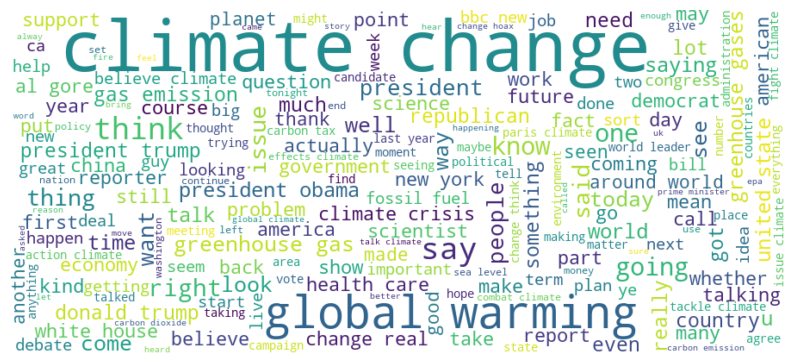

CPU times: total: 16.3 s
Wall time: 16.5 s


In [83]:
%%time
from wordcloud import WordCloud


# Read in the dataframe from a CSV file

df_init['No_StopWord']= df_init['No_StopWord'].astype(str)
# Concatenate all of the Churn_Reasons into a single string
text = ' '.join(str(reasons) for reasons in df_init.No_StopWord)


# Create a word cloud
wordcloud = WordCloud(background_color='white', width=900, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gibson.namasake\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
climate: 81835
change: 74799
global: 22923
warming: 19915
president: 14236
people: 12225
going: 11190
think: 11147
one: 9949
world: 9047


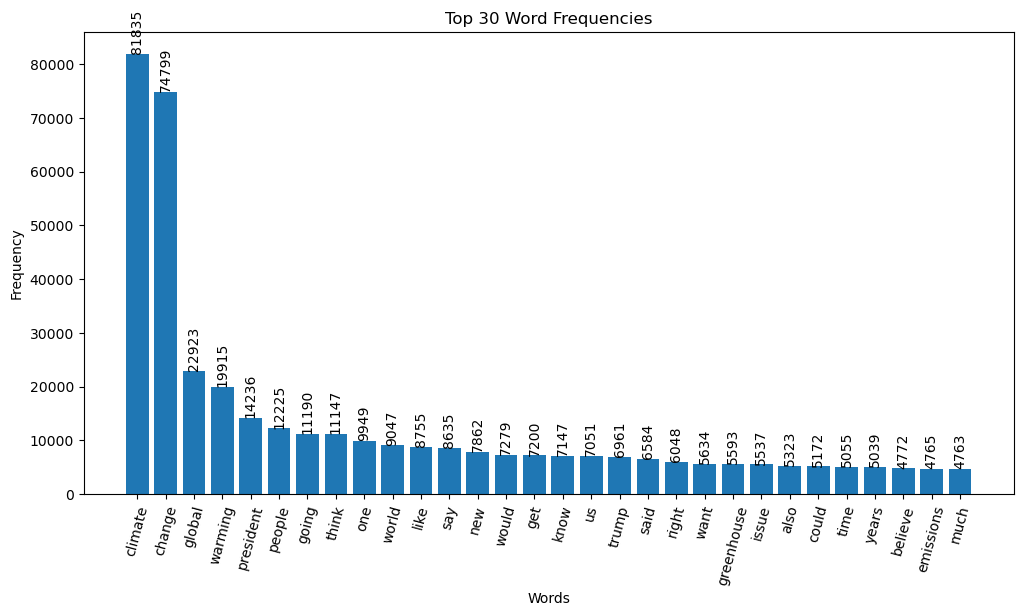

CPU times: total: 8.61 s
Wall time: 8.63 s


In [84]:
%%time

# Assuming you have a DataFrame named df with a column 'No_StopWords'
text = ' '.join(str(reasons) for reasons in df_init.No_StopWord)

# Tokenize the text into words
words = word_tokenize(text)

# Filter out common stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

# Calculate word frequencies
word_freq = Counter(filtered_words)

# Print the most common words and their frequencies
most_common = word_freq.most_common(10)
print("Most Common Words:")
for word, freq in most_common:
    print(f"{word}: {freq}")

# Create a bar chart for word frequencies
words, frequencies = zip(*word_freq.most_common(30))
plt.figure(figsize=(12, 6))
bars = plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Word Frequencies')
plt.xticks(rotation=75)

# Add data labels to each bar
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(freq), ha='center', va='bottom', rotation=90)

plt.show()


### Extract Topics from Created Clusters Using LDA

>* Latent Dirichlet Allocation (LDA) is a generative probabilistic model used for topic modeling. It is a statistical model that helps uncover the underlying topics or themes in a collection of documents. LDA assumes that each document in the corpus is a mixture of topics, and each topic is a mixture of words.
>* Assumption: LDA assumes that there are a fixed number of topics in the entire document collection. It does not know the actual topics; instead, it tries to learn them from the documents.

#### Group all documents by cluster

In [85]:
%%time

# 'best_k' contains the number of clusters selected

# Set the batch size
batch_size = 10000  # Adjust the batch size based on your dataset and memory constraints

# Initialize an empty list to store cluster labels for all documents
all_cluster_labels = []

# Iterate through the batches
for batch_start in range(0, len(tokenized_data), batch_size):
    batch_end = batch_start + batch_size
    batch_tokenized_data = tokenized_data[batch_start:batch_end]
    
    # Get the document vectors for the current batch
    batch_document_vectors = document_vectors[batch_start:batch_end]
    
    # Apply K-Means within the batch
    kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(batch_document_vectors)
    
    # Append the cluster labels for the current batch to the list
    all_cluster_labels.extend(cluster_labels)

# Group all documents by cluster
clusters = {}
for doc, label in zip(tokenized_data, all_cluster_labels):
    if label not in clusters:
        clusters[label] = [doc]
    else:
        clusters[label].append(doc)

# Print the contents of each cluster
documents_to_print_per_cluster = 20 # Limit the number of documents to print per cluster

for cluster_id, docs_in_cluster in clusters.items():
    print(f"Cluster {cluster_id}:")
    for i, doc in enumerate(docs_in_cluster):
        if i >= documents_to_print_per_cluster:
            break
        print(doc)
    print("\n")


Cluster 0:
['beena', 'part', 'airline', 'industry', 'part', 'move', 'reduce', 'carbon', 'teal', 'last', 'year', 'teal', 'agreed', 'deal', 'curb', 'greenhouse', 'gases', 'sol']
['beaten', '0.1', '0.12', 'degrees', 'celsius', 'seem', 'like', 'lot', 'terms', 'yearly', 'variations', 'actually', 'huge', 'part', 'rise', 'caused', 'el', 'nino', 'event', 'warm', 'ocean', 'current', 'disrupts', 'world', 'weather', 'scientists', 'say', 'greenhouse', 'gases']
['problems', 'facing', 'today', 'europe', 'climate', 'change']
['agreement', 'global', 'deal', 'came', 'force', 'last', 'year', 'carbon', 'dioxide', 'record', 'levels', 'scientists', 'say', 'temperature', 'threshold', 'course', 'surpass', 'tackle', 'global', 'warming']
['set', 'paris', 'climate', 'agreement', 'global', 'deal', 'came', 'force', 'last', 'year', 'carbon', 'dioxide', 'record', 'levels', 'scientists', 'say', 'temperature', 'threshold', 'course', 'surpass', 'tackle', 'global', 'warming']
['sheu', 'shelf', 'could', 'flow', 'faster'

#### Cluster Names Definition: 

While the provided text snippets don't contain explicit labels, it's possible to interpret the topics based on the words and themes present in each cluster. Here's a breakdown:

__Cluster 0:__
>* Contains words related to environmental issues, carbon reduction, global warming, greenhouse gases, and climate change.
>* These terms are often associated with debates and discussions about climate policies, regulations, and agreements.
>* Based on these terms, it's reasonable to classify this cluster as __"Climate Policy and Debate."__

__Cluster 1:__
>* Contains words related to climate change, global warming, climate solutions, and discussions about climate change's impact.
>* This cluster appears to focus on scientific aspects, the effects of climate change on the environment, and the need for solutions.
>* Given this focus on climate science and environmental effects, it can be classified as __"Climate Science and Environmental Effects."__

This classification is somewhat subjective and is based on the content and context of the words within each cluster. Since topic modeling is often an unsupervised technique, and the topics are inferred from the data. In practice, human interpretation is used to label and understand the topics, as seen in this case. These labels are then used to categorize and interpret the results of the topic modeling analysis.

#### Add Feature: Class_Name generated above

In [86]:
%%time
# Define your class_names mapping
class_names = {
    0: "Climate Policy and Debate",
    1: "Climate Science and Environmental Effects"
}


# Map cluster labels to class names
df_init['Cluster_Name'] = df_init['Cluster_Labels'].map(class_names)

# Now, you'll have a 'Class Name' column in your DataFrame with the corresponding class names.


CPU times: total: 109 ms
Wall time: 12.2 ms


### Examine Each Cluster Themes to Extract Topic Names

>* Each cluster wordings carry certain themes
>* We identify these running themes and use them as topic names.
>* Analyze the Content of Each Cluster to identify recurring themes or topics. We look for common keywords, phrases, or concepts that appear in multiple documents.
>* Define Appropriate Topic Names: Based on the analysis of each cluster, we define topic names that represent the main themes within the cluster. These topic names are descriptive and capture the essence of the content in each cluster.
>* Lastly we Map the Themes to Topic Names and use them as DataFrame features

#### Running Document Themes

In [87]:
%%time
# Define the topic names
topic_names = [
    "Climate Action", "Human Impact", "Policy and Agreements",
    "Awareness and Concerns", "Global Warming Discourse",
    "News and Government Actions", "Greenhouse Gas Emissions",
    "Public Opinion", "Scientific Consensus", "Political Actions"
]

CPU times: total: 0 ns
Wall time: 0 ns


### Classify each Document Under it's Theme

In [88]:
%%time

# Define a CountVectorizer for text vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Vectorize the documents
document_vectors = vectorizer.fit_transform(df_init['No_StopWord'])

# Initialize the LDA model
lda = LatentDirichletAllocation(n_components=len(topic_names), random_state=42)

# Fit the LDA model to the document vectors
lda.fit(document_vectors)

# Initialize lists to store the assigned topics and their names
assigned_topics = []
assigned_topic_names = []

# Iterate through the documents
for document_vector in document_vectors:
    # Get the LDA topic distribution for the document
    topic_distribution = lda.transform(document_vector)

    # Find the topic with the highest probability
    assigned_topic_index = topic_distribution.argmax()

    # Assign the topic name to the document
    assigned_topic_name = topic_names[assigned_topic_index]

    # Append the assigned topic and its name to the lists
    assigned_topics.append(assigned_topic_index)
    assigned_topic_names.append(assigned_topic_name)


CPU times: total: 8min 49s
Wall time: 8min 56s


#### Add the 'topic_class' and 'topic_name' columns to df_init

In [89]:
%%time
#Create and add Feature Topic_Class and Topic_Name
df_init['Topic_Name'] = assigned_topic_names
df_init['Topic_Class'] = assigned_topics

CPU times: total: 797 ms
Wall time: 825 ms


In [90]:
%%time
#Count values for Topic_Name feature
df_init['Topic_Name'].value_counts()

CPU times: total: 0 ns
Wall time: 0 ns


Policy and Agreements          16927
Public Opinion                 13052
Political Actions              10208
Global Warming Discourse        9808
Scientific Consensus            9345
Awareness and Concerns          8855
News and Government Actions     7985
Climate Action                  5551
Greenhouse Gas Emissions        5408
Human Impact                    3708
Name: Topic_Name, dtype: int64

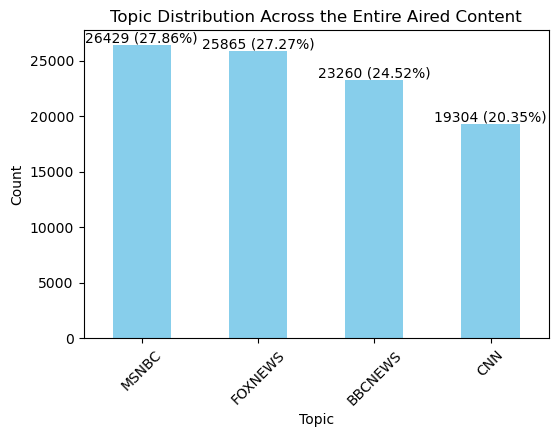

In [254]:
# Get the value counts
topic_counts = df_init['Topic_Name'].value_counts()
# Calculate the percentage
total = station_counts.sum()
percentages = (station_counts / total) * 100

# Create a bar chart
plt.figure(figsize=(6, 4))
station_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Distribution Across the Entire Aired Content')
plt.xticks(rotation=45)

# Add data labels to the bars
# for i, count in enumerate(station_counts):
#     plt.text(i, count, str(count), ha='center', va='bottom')
    
# Add data labels with percentages
for i, (count, percentage) in enumerate(zip(station_counts, percentages)):
    label = f"{count} ({percentage:.2f}%)"
    plt.text(i, count, label, ha='center', va='bottom')

plt.show()

In [92]:
%%time
#Count values for Topic_class feature
df_init['Topic_Class'].value_counts()

CPU times: total: 0 ns
Wall time: 0 ns


2    16927
7    13052
9    10208
4     9808
8     9345
3     8855
5     7985
0     5551
6     5408
1     3708
Name: Topic_Class, dtype: int64

In [93]:
%%time
#Display resultant DF
df_init.head(2)

CPU times: total: 0 ns
Wall time: 2.02 ms


URL  \
0    https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1  https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   

        MatchDateTime  Station      Show                          IAShowID  \
0 2017-01-31 05:53:28  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   
1 2017-01-18 19:21:01  BBCNEWS  BBC News  BBCNEWS_20170118_190000_BBC_News   

                                                                                                                                                                                                                                                                 Cleaned_Snippet  \
0                                                                                                         beena part to do the airline industry has not been a part of this move to reduce carbon and teal last year and teal they agreed on a deal to curb greenhouse gases sol   
1  it beaten it by about 0.1 0.12 degrees celsius which does seem like a lot but in terms of the yearly variations it is actually huge part of this rise was caused by an el nino event a warm ocean current that disrupts the world weather but scientists say greenhouse gases   

                                                                                                                                                                                    No_StopWord  \
0                                                                                 beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1  beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   

   Year  Month  Day   Time  Hour  Minute  Season  Cluster_Labels  \
0  2017      1   31  05:53     5      53  Winter               1   
1  2017      1   18  19:21    19      21  Winter               1   

                                Cluster_Name                   Topic_Name  \
0  Climate Science and Environmental Effects  News and Government Actions   
1  Climate Science and Environmental Effects               Public Opinion   

   Topic_Class  
0            5  
1            7

### __Cluster Decriptions__

The two clusters "Climate Policy and Debate" and "Climate Science and Environmental Effects," are two distinct categories within the context of climatic content recommendation system. Here's the difference between them:

>* __Climate Policy and Debate:__ This category includes content related to the policies, regulations, and discussions surrounding climate change and environmental issues. It may encompass topics such as international climate agreements (e.g., the Paris Agreement), debates on climate-related policies, and discussions about how governments and organizations are addressing climate change. This category is more focused on the political and policy aspects of climate change.

>* __Climate Science and Environmental Effects:__ In contrast, "Climate Science and Environmental Effects" encompasses content related to the scientific aspects of climate change, environmental research, and the effects of climate change on the environment. This category may include articles, studies, and reports on climate science, climate modeling, and the impact of climate change on ecosystems, weather patterns, and biodiversity. It's more oriented toward the scientific and environmental dimensions of climate change.

The difference lies in the focus of the content. The first category deals with policy and debates, while the second focuses on scientific research and environmental effects. Both are important aspects of the broader climate change discussion, but they address different facets of the issue.

Topic Clustering 

__Cluster 1 - Climate Action and Policy:__

>1.    Climate Action
>2.    Policy and Agreements
>3.    Political Actions
>4.    News and Government Actions

__Cluster 2 - Environmental and Scientific:__

>5.    Global Warming Discourse
>6.    Public Opinion
>7.    Human Impact
>8.    Awareness and Concerns
>9.    Greenhouse Gas Emissions
>10.    Scientific Consensus

This grouping separates topics related to climate policies, actions, and government involvement (Cluster 1) from topics related to public opinion, environmental impacts, and scientific consensus (Cluster 2). It's important to note that this grouping is based on a high-level categorization, and the specific content of each topic may overlap with multiple areas within the broader context of climate change and environmental issues.

### __Topic Overview:__

A. __Cluster 1 - Climate Action and Policy:__

>1.    __Climate Action:__ This topic is focused on the practical steps and initiatives taken by various stakeholders to address climate change. It includes actions at the individual, community, corporate, and government levels, such as reducing greenhouse gas emissions, adopting renewable energy, and implementing climate policies.

>2.    __Policy and Agreements:__ This topic covers climate-related policies, agreements, and international efforts to combat climate change. It includes discussions about international agreements like the Paris Agreement, national climate policies, and legislative measures.

>3.    __Political Actions:__ This topic is concerned with the political aspects of climate change, including the role of governments, political debates, and actions taken by political leaders and organizations to address climate issues.

>4.    __News and Government Actions:__ This category involves reporting on climate-related news and government actions. It includes media coverage of climate events, government policies, and announcements related to climate change.

B. __Cluster 2 - Environmental and Scientific:__

>5.    __Global Warming Discourse:__ This topic focuses on discussions and debates related to global warming and climate change. It includes conversations about the science, causes, and effects of global warming.

>6.    __Public Opinion:__ Public opinion covers the sentiment and attitudes of the general public regarding climate change. It reflects how people perceive and respond to climate-related issues.

>7.    __Human Impact:__ This topic explores the human impact on the environment and climate. It encompasses discussions on topics like deforestation, pollution, and resource consumption.

>8.    __Awareness and Concerns:__ This category deals with raising awareness about climate change and environmental concerns. It includes efforts to educate the public and communities about climate issues and their consequences.

>9.    __Greenhouse Gas Emissions:__ This topic is centered around greenhouse gases and their contribution to climate change. It includes discussions on emissions reduction, carbon footprints, and sustainable practices.

>10.    __Scientific Consensus:__ Scientific consensus refers to the widespread agreement among scientists about the reality and causes of climate change. It involves discussions about research findings, studies, and the scientific basis for climate-related claims.

These clusters provide an overview of the main themes within each group, but each topic can be highly complex and multifaceted. Climate change is a broad and interconnected issue, and these clusters help categorize different aspects of the topic for analysis and discussion.

### Create df dataframe

In [94]:
%%time
# Copy df_init to create df DataFrame
df_trend = df_init.copy()

CPU times: total: 78.1 ms
Wall time: 80.5 ms


In [95]:
%%time
#Display the columns
df_trend.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID',
       'Cleaned_Snippet', 'No_StopWord', 'Year', 'Month', 'Day', 'Time',
       'Hour', 'Minute', 'Season', 'Cluster_Labels', 'Cluster_Name',
       'Topic_Name', 'Topic_Class'],
      dtype='object')

#### Drop unwanted columns from df datafrme

In [96]:
%%time
df_trend.drop([ 'MatchDateTime', 'Cleaned_Snippet', 'Time', 'Hour','Minute'], axis=1, inplace=True)

CPU times: total: 31.2 ms
Wall time: 30.3 ms


### Final Processed DataFrame

In [97]:
%%time
#Check a sample of features
df_trend.sample(1)

CPU times: total: 31.2 ms
Wall time: 16.1 ms


URL  \
56471  https://archive.org/details/FOXNEWSW_20150513_100000_FOX_and_Friends#start/3375/end/3410   

       Station             Show                                  IAShowID  \
56471  FOXNEWS  FOX and Friends  FOXNEWSW_20150513_100000_FOX_and_Friends   

                                                                                                                                              No_StopWord  \
56471  r spend climate change homeland security seems like disconnect get event happened home state garland radical events look president proposed budget   

       Year  Month  Day  Season  Cluster_Labels               Cluster_Name  \
56471  2015      5   13  Spring               0  Climate Policy and Debate   

                     Topic_Name  Topic_Class  
56471  Global Warming Discourse            4

In [98]:
%%time
#df Columns
df_trend.shape

CPU times: total: 0 ns
Wall time: 0 ns


(90847, 13)

In [99]:
%%time
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90847 entries, 0 to 94857
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL             90847 non-null  object
 1   Station         90847 non-null  object
 2   Show            90847 non-null  object
 3   IAShowID        90847 non-null  object
 4   No_StopWord     90847 non-null  object
 5   Year            90847 non-null  int64 
 6   Month           90847 non-null  int64 
 7   Day             90847 non-null  int64 
 8   Season          90847 non-null  object
 9   Cluster_Labels  90847 non-null  int32 
 10  Cluster_Name    90847 non-null  object
 11  Topic_Name      90847 non-null  object
 12  Topic_Class     90847 non-null  int64 
dtypes: int32(1), int64(4), object(8)
memory usage: 9.4+ MB
CPU times: total: 219 ms
Wall time: 199 ms



### Summary of the columns in the final DataFrame:

>*  __URL:__ The URL of the source.
>*  __Station:__ The station where the content originated.
>*  __Show:__ The show where the content was broadcast.
>*  __IAShowID:__ An identification for the show.
>*  __No_StopWord:__ The content with stop words removed.
>*  __Year:__ The extracted year from MatchDateTime showing the year the content was aired
>*  __Month:__ The extracted month from MatchDateTime showing the month the content was aired
>*  __Day:__ The extracted day from MatchDateTime showing the day the content was aired
>*  __Season:__ The added column representing the annual seasons showing when content was aired
>*  __Cluster_Labels:__ Snippet Feature Classes assigned during topic modeling.
>*  __Cluster_Name:__ Assigned name of the Snippet Feature Class.
>*  __Topic_Name:__ The name of the running themes in the Snippet Feature Class contents.
>*  __Topic_Class:__ The assigned topic class.

## ______________________________

## TREND ANALYSIS

### Topic Trend Analysis

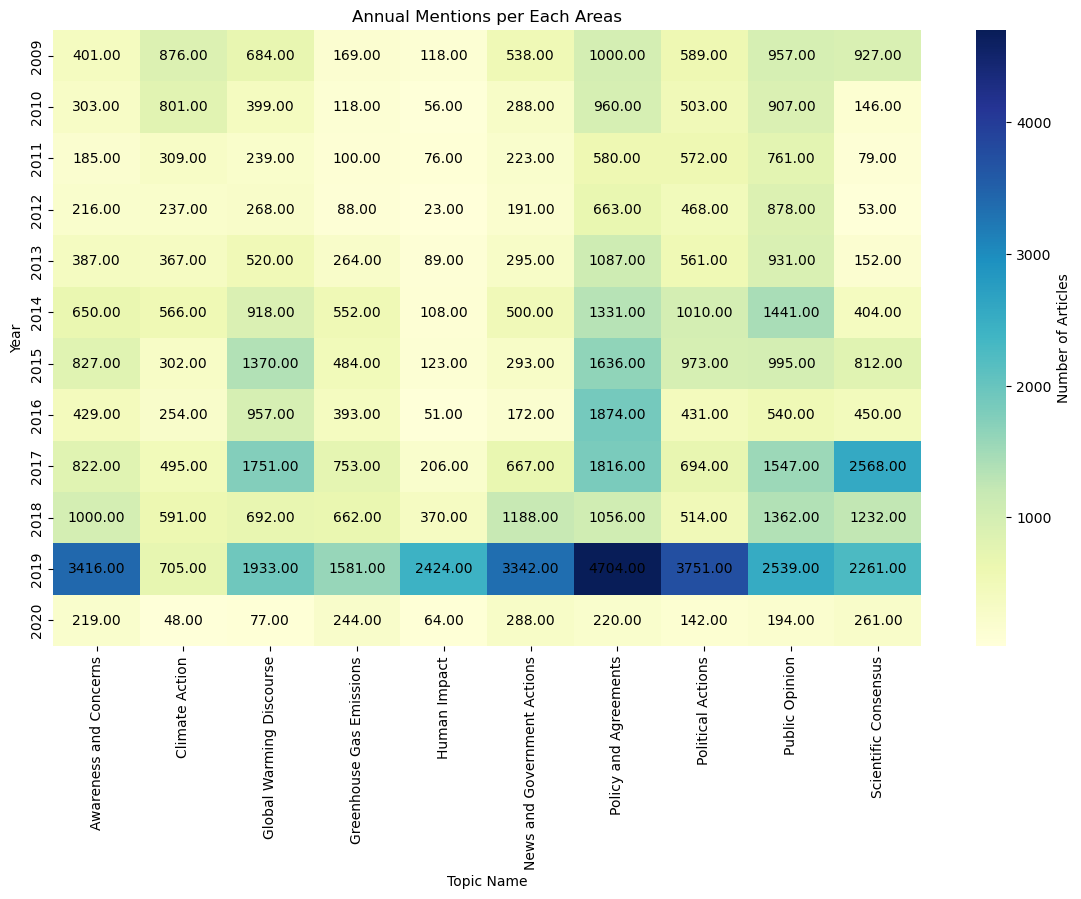

CPU times: total: 906 ms
Wall time: 940 ms


In [100]:
%%time

# Group by year and month, count the number of articles in each topic
topic_trend = df_trend.groupby(['Year', 'Topic_Name']).size().unstack(fill_value=0)

# Create a heatmap to visualize topic trends
plt.figure(figsize=(14, 8))
ax = sns.heatmap(topic_trend, cmap="YlGnBu", cbar_kws={'label': 'Number of Articles'})
plt.title('Annual Mentions per Each Areas')
plt.xlabel('Topic Name')
plt.ylabel('Year')
plt.xticks(rotation=90)

# Add data labels to heatmap cells
for i in range(len(topic_trend.columns)):
    for j in range(len(topic_trend.index)):
        ax.text(i + 0.5, j + 0.5, f"{topic_trend.values[j, i]:.2f}", ha='center', va='center', color='black')

plt.show()


##### Observation:

__2017 registered the highest number of articles as 2020 the number drastically reduced__

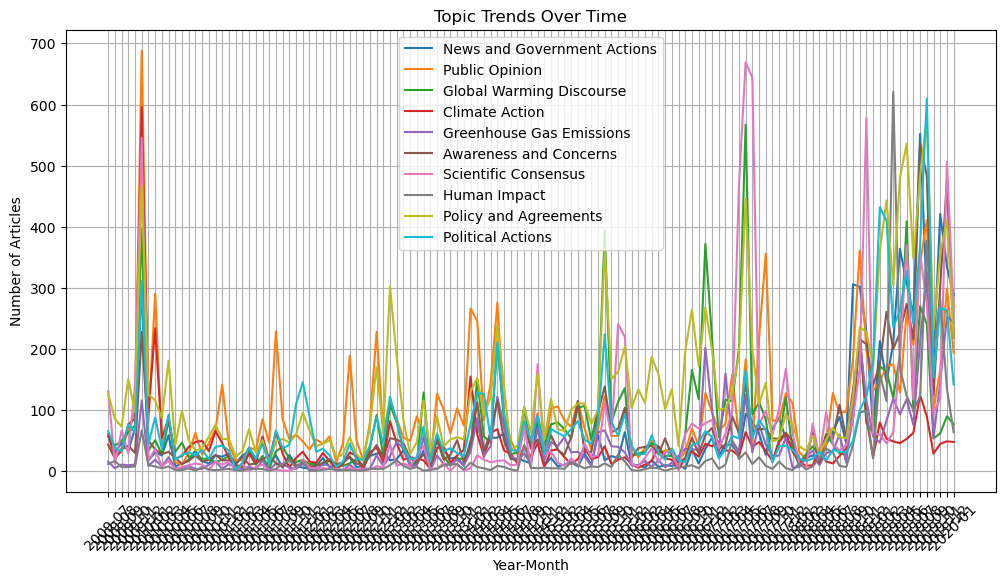

CPU times: total: 2.34 s
Wall time: 2.65 s


In [101]:
%%time
# Create a line plot for each topic
topics = df_trend['Topic_Name'].unique()

plt.figure(figsize=(12, 6))
for i, topic in enumerate(topics):
    topic_df = df_trend[df_trend['Topic_Name'] == topic]
    topic_trend = topic_df.groupby(['Year', 'Month']).size()
    
    # Convert the index (year, month) to a string format for plotting
    topic_trend.index = topic_trend.index.map(lambda x: f'{x[0]}-{x[1]:02d}')
    
    plt.plot(topic_trend.index, topic_trend.values, label=topic)

plt.title('Topic Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

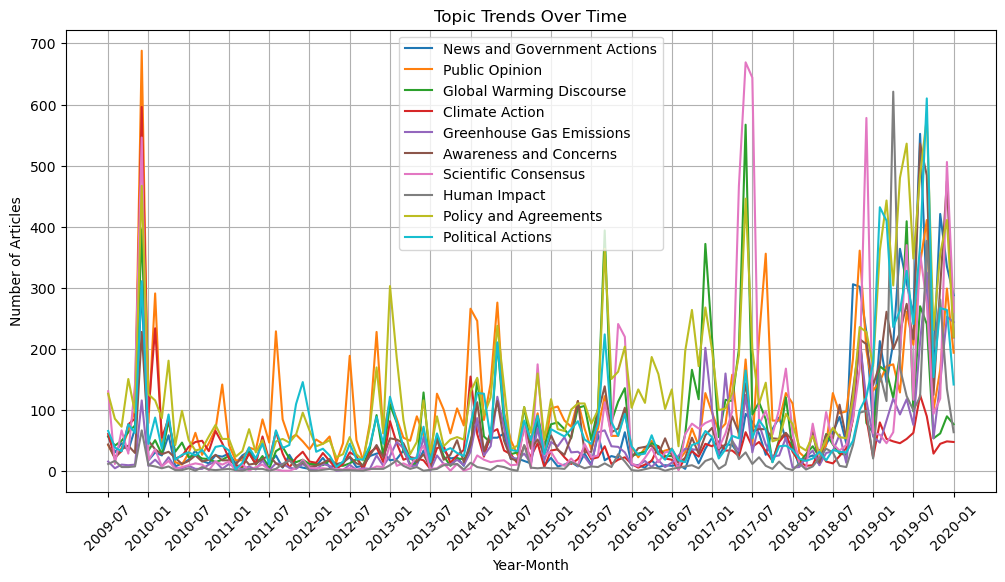

CPU times: total: 969 ms
Wall time: 969 ms


In [102]:
%%time
# Create a line plot for each topic
topics = df_trend['Topic_Name'].unique()

plt.figure(figsize=(12, 6))
for i, topic in enumerate(topics):
    topic_df = df_trend[df_trend['Topic_Name'] == topic]
    topic_trend = topic_df.groupby(['Year', 'Month']).size()

    # Convert the index (year, month) to a string format for plotting
    topic_trend.index = topic_trend.index.map(lambda x: f'{x[0]}-{x[1]:02d}')

    plt.plot(topic_trend.index, topic_trend.values, label=topic)

plt.title('Topic Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.legend()

# Display a subset of x-axis labels (e.g., every 6th label)
step = 6
plt.xticks(range(0, len(topic_trend.index), step), topic_trend.index[::step], rotation=45)

plt.grid(True)
plt.show()


### Annual Trends from 2007 to 2020

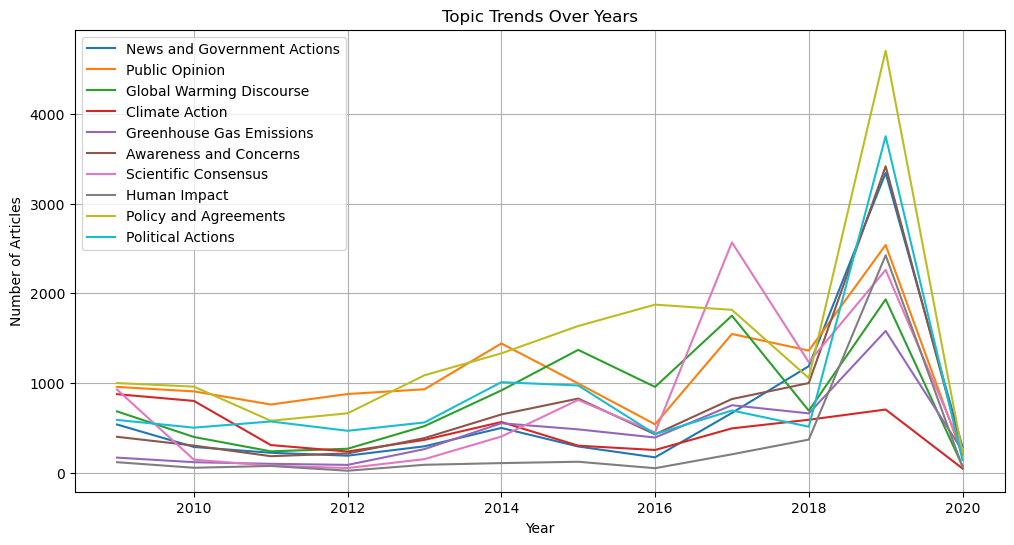

CPU times: total: 531 ms
Wall time: 517 ms


In [103]:
%%time
# Create a line plot for each topic
topics = df_trend['Topic_Name'].unique()

plt.figure(figsize=(12, 6))
for i, topic in enumerate(topics):
    topic_df = df_trend[df_trend['Topic_Name'] == topic]
    topic_trend = topic_df.groupby(['Year']).size()
    
    plt.plot(topic_trend.index, topic_trend.values, label=topic)

plt.title('Topic Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()

##### Observations:

>* __Each topic had varying levels of trend strength for the 12 year period with more emphasis having been 2019__

### Trend Scores / Popularity Score

> __A trend score,__ is a quantitative measure that represents the popularity or prevalence of a specific topic or category over a period of time. It is a way to quantify how frequently or prominently a particular topic appears in a dataset, such as news articles or documents, over a specified time frame.

> The trend score can be calculated in various ways, but typically, it is calculated by counting the number of occurrences or mentions of a particular topic within a set time period, like a year, month, or day. It is then often normalized or scaled to represent the topic's importance relative to other topics, allowing for comparisons and analysis of trends over time.

> In this project we are calculating trend scores for different topics to analyze how their popularity changes over time, with a focus on climate-related topics. These trend scores help identify which topics are receiving more or less attention in the media and can be useful for tracking public interest, media coverage, or sentiment associated with those topics.

> Trend Score will help to prioritize content recommendations based on the current popularity or trendiness of topics. Articles or topics with a high trend score may be recommended more prominently.

Adding a popularity or trend score as a feature will help the recommendation system be more dynamic and responsive to real-time trends and audience engagement. It can also serve as a basis for ranking and sorting content recommendations.

In [104]:
%%time
#Functions for calculating Trend Scores (Yearly, Monthly and quarterly trend scores)

def calculate_yearly_trend(df):
    yearly_trend = df_trend.groupby(['Year', 'Topic_Name'])['Topic_Name'].count().unstack(fill_value=0)
    yearly_trend = yearly_trend.div(yearly_trend.sum(axis=1), axis=0)
    return yearly_trend

def calculate_monthly_trend(df):
    monthly_trend = df_trend.groupby(['Year', 'Month', 'Topic_Name'])['Topic_Name'].count().unstack(fill_value=0)
    monthly_trend = monthly_trend.div(monthly_trend.sum(axis=1), axis=0)
    return monthly_trend

def calculate_daily_trend(df):
    daily_trend = df_trend.groupby(['Year', 'Month', 'Day', 'Topic_Name'])['Topic_Name'].count().unstack(fill_value=0)
    daily_trend = daily_trend.div(daily_trend.sum(axis=1), axis=0)
    return daily_trend

def calculate_average_yearly_trend(df):
    yearly_trend = calculate_yearly_trend(df)
    average_yearly_trend = yearly_trend.mean()
    return average_yearly_trend

def calculate_average_monthly_trend(df):
    monthly_trend = calculate_monthly_trend(df)
    average_monthly_trend = monthly_trend.mean()
    return average_monthly_trend

def calculate_average_daily_trend(df):
    daily_trend = calculate_daily_trend(df)
    average_daily_trend = daily_trend.mean()
    return average_daily_trend


# Call the functions:
yearly_scores = calculate_yearly_trend(df)
monthly_scores = calculate_monthly_trend(df)
daily_scores = calculate_daily_trend(df)
average_yearly_trend = calculate_average_yearly_trend(df)
average_monthly_trend = calculate_average_monthly_trend(df)
average_daily_trend = calculate_average_daily_trend(df)


CPU times: total: 188 ms
Wall time: 189 ms


In [105]:
%%time
yearly_scores[3:10:2]
yearly_scores

CPU times: total: 0 ns
Wall time: 0 ns


Topic_Name  Awareness and Concerns  Climate Action  Global Warming Discourse  \
Year                                                                           
2009                      0.064068        0.139958                  0.109283   
2010                      0.067619        0.178755                  0.089043   
2011                      0.059219        0.098912                  0.076504   
2012                      0.070016        0.076823                  0.086872   
2013                      0.083172        0.078874                  0.111756   
2014                      0.086898        0.075668                  0.122727   
2015                      0.105822        0.038644                  0.175304   
2016                      0.077283        0.045758                  0.172401   
2017                      0.072621        0.043732                  0.154696   
2018                      0.115380        0.068190                  0.079843   
2019                      0.128151        0.026448                  0.072517   
2020                      0.124644        0.027319                  0.043825   

Topic_Name  Greenhouse Gas Emissions  Human Impact  \
Year                                                 
2009                        0.027001      0.018853   
2010                        0.026333      0.012497   
2011                        0.032010      0.024328   
2012                        0.028525      0.007455   
2013                        0.056738      0.019127   
2014                        0.073797      0.014439   
2015                        0.061932      0.015739   
2016                        0.070798      0.009188   
2017                        0.066525      0.018199   
2018                        0.076382      0.042691   
2019                        0.059311      0.090936   
2020                        0.138873      0.036426   

Topic_Name  News and Government Actions  Policy and Agreements  \
Year                                                             
2009                           0.085956               0.159770   
2010                           0.064271               0.214238   
2011                           0.071383               0.185659   
2012                           0.061912               0.214911   
2013                           0.063400               0.233613   
2014                           0.066845               0.177941   
2015                           0.037492               0.209341   
2016                           0.030985               0.337597   
2017                           0.058927               0.160438   
2018                           0.137072               0.121841   
2019                           0.125375               0.176471   
2020                           0.163916               0.125213   

Topic_Name  Political Actions  Public Opinion  Scientific Consensus  
Year                                                                 
2009                 0.094104        0.152900              0.148107  
2010                 0.112252        0.202410              0.032582  
2011                 0.183099        0.243598              0.025288  
2012                 0.151702        0.284603              0.017180  
2013                 0.120567        0.200086              0.032667  
2014                 0.135027        0.192647              0.054011  
2015                 0.124504        0.127319              0.103903  
2016                 0.077644        0.097280              0.081066  
2017                 0.061313        0.136673              0.226875  
2018                 0.059305        0.157148              0.142148  
2019                 0.140719        0.095251              0.084821  
2020                 0.080820        0.110415              0.148549

<Figure size 1200x600 with 0 Axes>

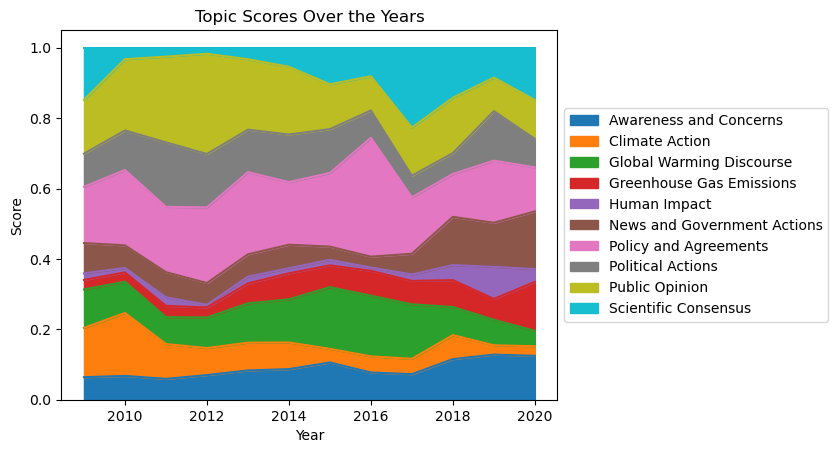

CPU times: total: 438 ms
Wall time: 465 ms


In [106]:
%%time
# Create a stacked area chart using the 'yearly_scores' DataFrame
plt.figure(figsize=(12, 6))
yearly_scores.plot(kind='area', stacked=True)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Topic Scores Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


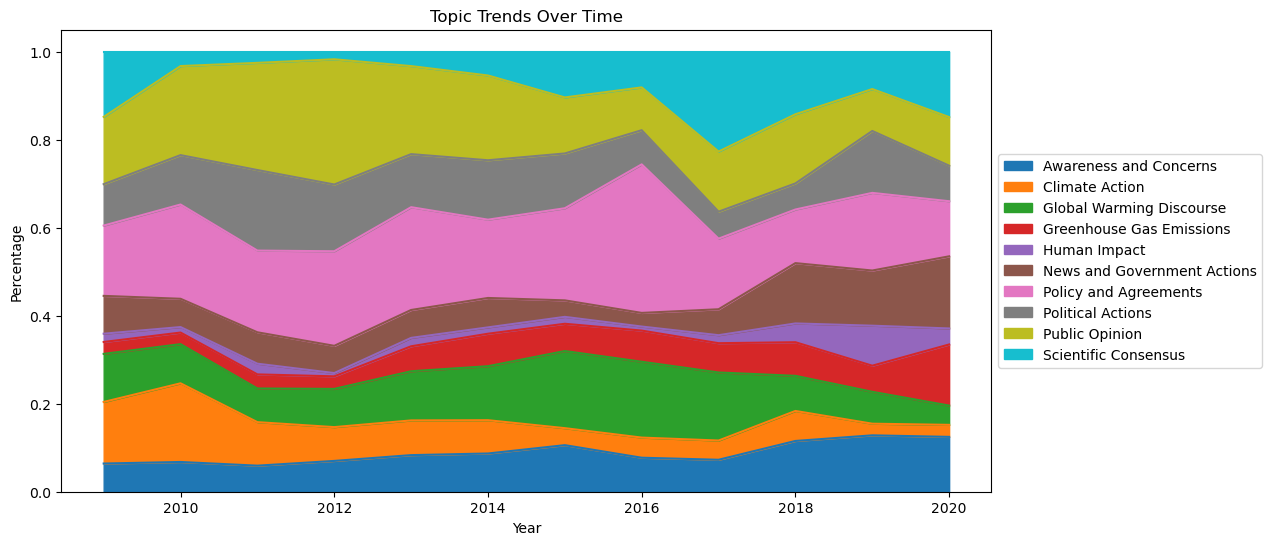

CPU times: total: 422 ms
Wall time: 430 ms


In [107]:
%%time
# Create a stacked area chart
plt.figure(figsize=(12, 6))
#yearly_scores.plot(kind='area', stacked=True, colormap='tab20', ax=plt.gca())
yearly_scores.plot(kind='area', stacked=True, ax=plt.gca())

plt.title('Topic Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In this code:

>* __Yearly_trend:__ yearly_trend calculates the yearly trend score for each topic by grouping data by 'Year' and 'Topic_Name', counting the articles, and normalizing the counts.
>* __Monthly_trend:__ monthly_trend calculates the monthly trend score for each topic by grouping data by 'Year', 'Month', and 'Topic_Name', counting the articles, and normalizing the counts.
>* __Daily_trend:__ daily_trend calculates the daily trend score for each topic by grouping data by 'Year', 'Month', 'Day', and 'Topic_Name', counting the articles, and normalizing the counts.

These dataframes will contain the trend scores for each topic in different timeframes. You can then incorporate these scores into your recommendation system or further analysis to identify topics that are currently trending in climate-related news.

### Add Overall_Trend_Score Feature to the df DataFrame

In [108]:
%%time
average_yearly_trend

CPU times: total: 0 ns
Wall time: 0 ns


Topic_Name
Awareness and Concerns         0.087908
Climate Action                 0.074923
Global Warming Discourse       0.107898
Greenhouse Gas Emissions       0.059852
Human Impact                   0.025823
News and Government Actions    0.080628
Policy and Agreements          0.193086
Political Actions              0.111755
Public Opinion                 0.166694
Scientific Consensus           0.091433
dtype: float64

In [109]:
%%time
# Create a dictionary from the 'average_yearly_trend' Series
trend_score_dict = average_yearly_trend.to_dict()
trend_score_dict

CPU times: total: 31.2 ms
Wall time: 4.84 ms


{'Awareness and Concerns': 0.08790789679702737,
 'Climate Action': 0.07492337322349293,
 'Global Warming Discourse': 0.10789750302036484,
 'Greenhouse Gas Emissions': 0.059852149983378934,
 'Human Impact': 0.025823164576505863,
 'News and Government Actions': 0.08062793620288805,
 'Policy and Agreements': 0.19308612695555305,
 'Political Actions': 0.11175459568802641,
 'Public Opinion': 0.16669413795787105,
 'Scientific Consensus': 0.09143311559489146}

In [110]:
%%time
# Create a dictionary from the 'average_yearly_trend' Series
trend_score_dict = average_yearly_trend.to_dict()

# Map the 'Overall_Trend_Score' based on 'Topic_Name' and add to the df DataFrame
df_trend['Overall_Trend_Score'] = df_trend['Topic_Name'].map(trend_score_dict)


CPU times: total: 0 ns
Wall time: 0 ns


In [111]:
%%time
df_trend[['Topic_Name', 'Overall_Trend_Score']].sample(4)

CPU times: total: 15.6 ms
Wall time: 13.5 ms


Topic_Name  Overall_Trend_Score
73459         Public Opinion             0.166694
56373         Public Opinion             0.166694
27032  Policy and Agreements             0.193086
64843  Policy and Agreements             0.193086

#### Visualize the Overall_Trend_Scores per Topic

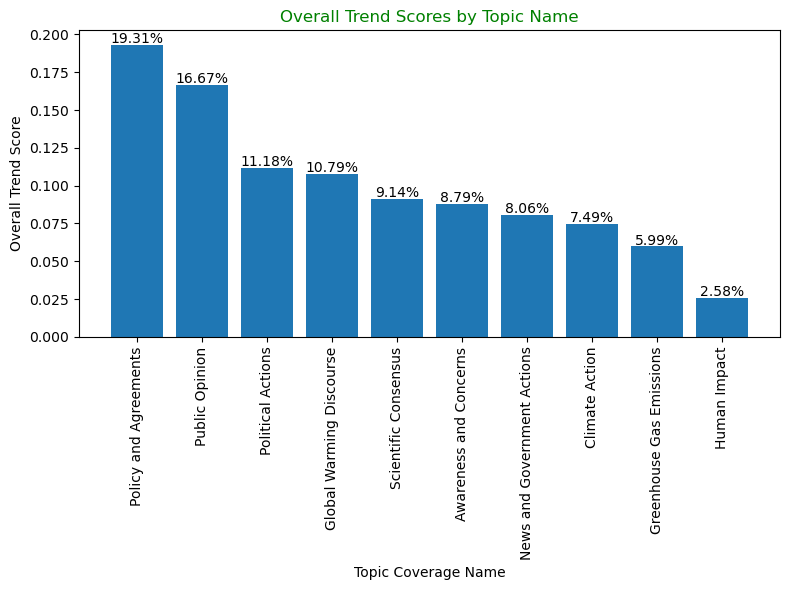

CPU times: total: 766 ms
Wall time: 784 ms


In [225]:
%%time

# Extract topic names and trend scores from the dictionary
topic_names = list(trend_score_dict.keys())
trend_scores = list(trend_score_dict.values())

# Sort the topics by sentiment score
sorted_topics = sorted(zip(topic_names, trend_scores), key=lambda x: x[1], reverse=True)
topic_names, trend_scores = zip(*sorted_topics)

# Convert trend scores to percentages with two decimal places
trend_scores_as_percentages = [f'{score * 100:.2f}%' for score in trend_scores]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(topic_names, trend_scores)
plt.xlabel("Topic Coverage Name")
plt.ylabel("Overall Trend Score")
plt.title("Overall Trend Scores by Topic Name", color='green', fontsize = 12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate each bar with its value as a percentage
for bar, label in zip(bars, trend_scores_as_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, label, ha='center')

plt.tight_layout()
plt.show()


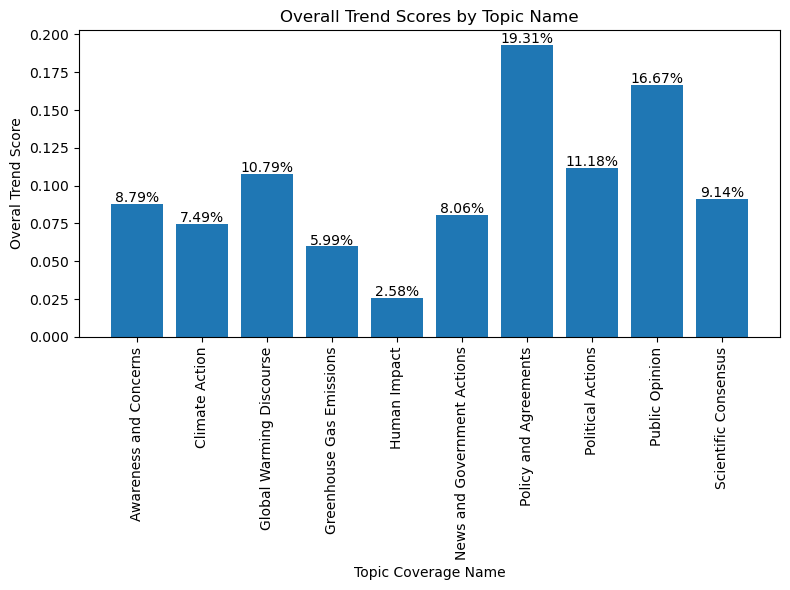

CPU times: total: 688 ms
Wall time: 677 ms


In [221]:
%%time

# Extract topic names and trend scores from the dictionary
topic_names = list(trend_score_dict.keys())
trend_scores = list(trend_score_dict.values())

# Sort the topics by sentiment score
# trend_scores = trend_scores.sort_values(ascending=False)

# Convert trend scores to percentages with two decimal places
trend_scores_as_percentages = [f'{score * 100:.2f}%' for score in trend_scores]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(topic_names, trend_scores)
plt.xlabel("Topic Coverage Name")
plt.ylabel("Overal Trend Score")
plt.title("Overall Trend Scores by Topic Name", color='green', fontsize = 12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate each bar with its value as a percentage
for bar, label in zip(bars, trend_scores_as_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, label, ha='center')

plt.tight_layout()
plt.show()


_____________________________

### Popularity Score Visualizations

The combined trend scores plots provide valuable insights into the popularity and relevance of various topics related to a specific subject over different time periods, including yearly, monthly, and daily trends. These plots are particularly useful for understanding how different topics gain or lose prominence in the context of the subject.

>* __"Overall Trend Score":__
>        This bar chart displays the overall trend scores for each topic related to the subject.
>        The scores are calculated over multiple years, providing a long-term perspective on topic popularity.
>        Topics with higher bars indicate they have been consistently covered over the years.

>* __"Current Year Trend Score":__
>        This chart focuses on the trend scores for the current year (as specified by the user).
>        It highlights the recent popularity of each topic.
>        A high score suggests that a topic is currently being covered while low score implies a topic is not being given attention.

>*  __"Current Month Trend Score":__
>        This chart delves even deeper, offering insights into the popularity of topics within the current month.
>        It is especially useful for tracking short-term trends and assessing the subject's real-time coverage.

>*  __"Current Day Trend Score":__
>        The daily trend score chart shows how topics have been trending on a specific day, combining both year and month selections.
>        This is ideal for pinpointing recent spikes in interest or the emergence of unexpected trends.

These plots help decision-makers, analysts, and enthusiasts gain a comprehensive understanding of how specific topics within the subject matter evolve over time. By tracking trends on multiple timescales, users can make data-driven decisions, identify emerging interests, and respond to changing dynamics effectively.

In [114]:
%%time
#trending_coverage_areas(df, current_year, current_month, current_day)

CPU times: total: 0 ns
Wall time: 0 ns


Enter the current year: 2019
Enter the current month: 4
Enter the current day: 5
Enter the current year: 2019
Enter the current month: 4
Enter the current day: 5


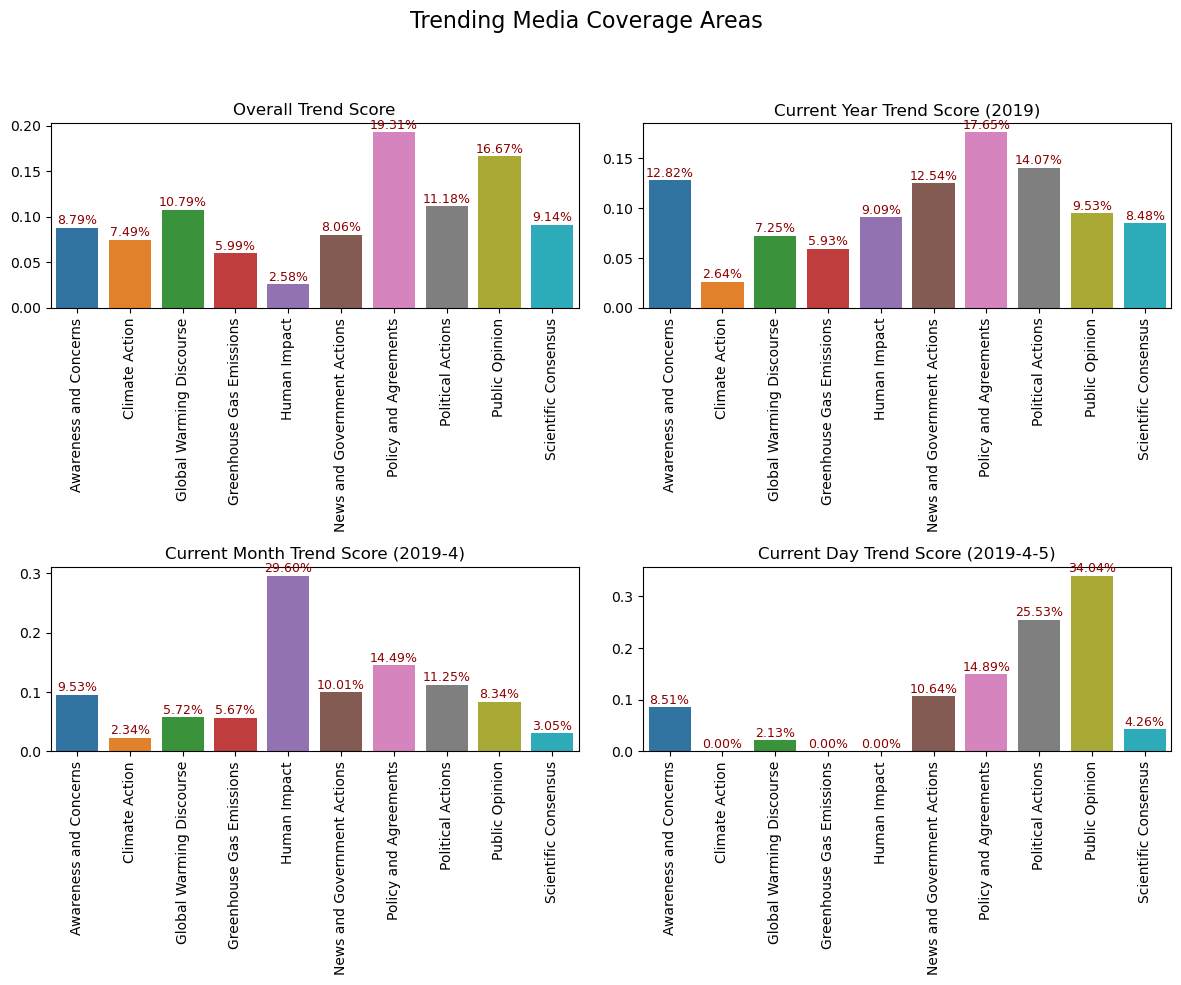

CPU times: total: 1.62 s
Wall time: 19.3 s


In [115]:
%%time
# Calling the function with current_year, current_month, and current_day as arguments:
current_year = int(input("Enter the current year: "))
current_month = int(input("Enter the current month: "))
current_day = int(input("Enter the current day: "))

trending_coverage_areas(df, current_year, current_month, current_day)

### PopularityLabel

In [116]:
%%time
# Calculate the overall trend mean
overall_trend_mean = df_trend['Overall_Trend_Score'].mean()

# Add the 'PopularityLabel' column to 'df' based on the condition
df_trend['PopularityLabel'] = df_trend['Overall_Trend_Score'].apply(lambda x: 0 if x < overall_trend_mean else 1)

# Display the updated DataFrame
df_trend['PopularityLabel'].value_counts()

CPU times: total: 78.1 ms
Wall time: 72.3 ms


0    60868
1    29979
Name: PopularityLabel, dtype: int64

In [345]:
df_trend

URL  \
0                                   https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1                                 https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   
2                           https://archive.org/details/BBCNEWS_20170105_213000_Outside_Source#start/1111/end/1146   
3                             https://archive.org/details/BBCNEWS_20170105_210000_Outside_Source#start/798/end/833   
4                                   https://archive.org/details/BBCNEWS_20170111_030000_BBC_News#start/696/end/731   
...                                                                                                            ...   
94853                            https://archive.org/details/MSNBCW_20200107_100000_First_Look#start/1630/end/1665   
94854               https://archive.org/details/MSNBCW_20200110_010000_All_In_With_Chris_Hayes#start/3459/end/3494   
94855     https://archive.org/details/MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams#start/3209/end/3244   
94856  https://archive.org/details/MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell#start/3343/end/3378   
94857                https://archive.org/details/MSNBCW_20200114_050000_The_Rachel_Maddow_Show#start/2568/end/2603   

       Station                                  Show  \
0      BBCNEWS                              BBC News   
1      BBCNEWS                              BBC News   
2      BBCNEWS                        Outside Source   
3      BBCNEWS                        Outside Source   
4      BBCNEWS                              BBC News   
...        ...                                   ...   
94853    MSNBC                            First Look   
94854    MSNBC               All In With Chris Hayes   
94855    MSNBC     The 11th Hour With Brian Williams   
94856    MSNBC  The Last Word With Lawrence ODonnell   
94857    MSNBC                The Rachel Maddow Show   

                                                          IAShowID  \
0                                 BBCNEWS_20170131_054500_BBC_News   
1                                 BBCNEWS_20170118_190000_BBC_News   
2                           BBCNEWS_20170105_213000_Outside_Source   
3                           BBCNEWS_20170105_210000_Outside_Source   
4                                 BBCNEWS_20170111_030000_BBC_News   
...                                                            ...   
94853                            MSNBCW_20200107_100000_First_Look   
94854               MSNBCW_20200110_010000_All_In_With_Chris_Hayes   
94855     MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams   
94856  MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell   
94857                MSNBCW_20200114_050000_The_Rachel_Maddow_Show   

                                                                                                                                                                                                                                                                   No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                   

## ________________________________

## SENTIMENT ANALYSIS

### Creating Sentiment Score on unlabeled Dataset

In [117]:
df_sent = df_trend.copy()


Each message that is aired to the audience is part a certain topic and each of this messages has a sentiment in it, how do we predict this sentiment and make use of it in our recommendation system?

### Sentiment Score Using: Textblob

In [118]:
#Sentiment Score Using: Textblob

from textblob import TextBlob

# Assuming 'Cleaned_Snippet' is the column with text data
df_sent['Sentiment'] = df_sent['No_StopWord'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new column with sentiment labels (e.g., 'Positive', 'Negative', 'Neutral')
df_sent['Sentiment_TextBlob'] = df_sent['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

df_sent

URL  \
0                                   https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1                                 https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   
2                           https://archive.org/details/BBCNEWS_20170105_213000_Outside_Source#start/1111/end/1146   
3                             https://archive.org/details/BBCNEWS_20170105_210000_Outside_Source#start/798/end/833   
4                                   https://archive.org/details/BBCNEWS_20170111_030000_BBC_News#start/696/end/731   
...                                                                                                            ...   
94853                            https://archive.org/details/MSNBCW_20200107_100000_First_Look#start/1630/end/1665   
94854               https://archive.org/details/MSNBCW_20200110_010000_All_In_With_Chris_Hayes#start/3459/end/3494   
94855     https://archive.org/details/MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams#start/3209/end/3244   
94856  https://archive.org/details/MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell#start/3343/end/3378   
94857                https://archive.org/details/MSNBCW_20200114_050000_The_Rachel_Maddow_Show#start/2568/end/2603   

       Station                                  Show  \
0      BBCNEWS                              BBC News   
1      BBCNEWS                              BBC News   
2      BBCNEWS                        Outside Source   
3      BBCNEWS                        Outside Source   
4      BBCNEWS                              BBC News   
...        ...                                   ...   
94853    MSNBC                            First Look   
94854    MSNBC               All In With Chris Hayes   
94855    MSNBC     The 11th Hour With Brian Williams   
94856    MSNBC  The Last Word With Lawrence ODonnell   
94857    MSNBC                The Rachel Maddow Show   

                                                          IAShowID  \
0                                 BBCNEWS_20170131_054500_BBC_News   
1                                 BBCNEWS_20170118_190000_BBC_News   
2                           BBCNEWS_20170105_213000_Outside_Source   
3                           BBCNEWS_20170105_210000_Outside_Source   
4                                 BBCNEWS_20170111_030000_BBC_News   
...                                                            ...   
94853                            MSNBCW_20200107_100000_First_Look   
94854               MSNBCW_20200110_010000_All_In_With_Chris_Hayes   
94855     MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams   
94856  MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell   
94857                MSNBCW_20200114_050000_The_Rachel_Maddow_Show   

                                                                                                                                                                                                                                                                   No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                   

### Sentiment Score Using: nltk Sentiment Vader

In [119]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (do this once)
#nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment and add a 'sentiment' column
df_sent['Sentiment2'] = df_sent['No_StopWord'].apply(lambda text: analyzer.polarity_scores(text))

# Create a new column with sentiment labels ('Negative,' 'Neutral,' 'Positive')
df_sent['Sentiment_Vader'] = df_sent['Sentiment2'].apply(lambda Sentiment2: "Positive" if Sentiment2['compound'] >= 0.05 else ("Negative" if Sentiment2['compound'] <= -0.05 else "Neutral"))

# Print the DataFrame
df_sent



URL  \
0                                   https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1                                 https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   
2                           https://archive.org/details/BBCNEWS_20170105_213000_Outside_Source#start/1111/end/1146   
3                             https://archive.org/details/BBCNEWS_20170105_210000_Outside_Source#start/798/end/833   
4                                   https://archive.org/details/BBCNEWS_20170111_030000_BBC_News#start/696/end/731   
...                                                                                                            ...   
94853                            https://archive.org/details/MSNBCW_20200107_100000_First_Look#start/1630/end/1665   
94854               https://archive.org/details/MSNBCW_20200110_010000_All_In_With_Chris_Hayes#start/3459/end/3494   
94855     https://archive.org/details/MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams#start/3209/end/3244   
94856  https://archive.org/details/MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell#start/3343/end/3378   
94857                https://archive.org/details/MSNBCW_20200114_050000_The_Rachel_Maddow_Show#start/2568/end/2603   

       Station                                  Show  \
0      BBCNEWS                              BBC News   
1      BBCNEWS                              BBC News   
2      BBCNEWS                        Outside Source   
3      BBCNEWS                        Outside Source   
4      BBCNEWS                              BBC News   
...        ...                                   ...   
94853    MSNBC                            First Look   
94854    MSNBC               All In With Chris Hayes   
94855    MSNBC     The 11th Hour With Brian Williams   
94856    MSNBC  The Last Word With Lawrence ODonnell   
94857    MSNBC                The Rachel Maddow Show   

                                                          IAShowID  \
0                                 BBCNEWS_20170131_054500_BBC_News   
1                                 BBCNEWS_20170118_190000_BBC_News   
2                           BBCNEWS_20170105_213000_Outside_Source   
3                           BBCNEWS_20170105_210000_Outside_Source   
4                                 BBCNEWS_20170111_030000_BBC_News   
...                                                            ...   
94853                            MSNBCW_20200107_100000_First_Look   
94854               MSNBCW_20200110_010000_All_In_With_Chris_Hayes   
94855     MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams   
94856  MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell   
94857                MSNBCW_20200114_050000_The_Rachel_Maddow_Show   

                                                                                                                                                                                                                                                                   No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                   

### Sentiment Score Using: AFINN library

In [120]:
# Sentiment Score Using: AFINN library
from afinn import Afinn

afinn = Afinn()

# Sample data (replace with your own dataset)
text_data = df_sent['No_StopWord'].tolist()

# Function to analyze sentiment and create labels
def create_sentiment_labels(text):
    score = afinn.score(text)
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment analysis function to create labels
df_sent['Sentiment_AFINN'] = df_sent['No_StopWord'].apply(create_sentiment_labels)

# Display the DataFrame with sentiment labels
df_sent


URL  \
0                                   https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1                                 https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   
2                           https://archive.org/details/BBCNEWS_20170105_213000_Outside_Source#start/1111/end/1146   
3                             https://archive.org/details/BBCNEWS_20170105_210000_Outside_Source#start/798/end/833   
4                                   https://archive.org/details/BBCNEWS_20170111_030000_BBC_News#start/696/end/731   
...                                                                                                            ...   
94853                            https://archive.org/details/MSNBCW_20200107_100000_First_Look#start/1630/end/1665   
94854               https://archive.org/details/MSNBCW_20200110_010000_All_In_With_Chris_Hayes#start/3459/end/3494   
94855     https://archive.org/details/MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams#start/3209/end/3244   
94856  https://archive.org/details/MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell#start/3343/end/3378   
94857                https://archive.org/details/MSNBCW_20200114_050000_The_Rachel_Maddow_Show#start/2568/end/2603   

       Station                                  Show  \
0      BBCNEWS                              BBC News   
1      BBCNEWS                              BBC News   
2      BBCNEWS                        Outside Source   
3      BBCNEWS                        Outside Source   
4      BBCNEWS                              BBC News   
...        ...                                   ...   
94853    MSNBC                            First Look   
94854    MSNBC               All In With Chris Hayes   
94855    MSNBC     The 11th Hour With Brian Williams   
94856    MSNBC  The Last Word With Lawrence ODonnell   
94857    MSNBC                The Rachel Maddow Show   

                                                          IAShowID  \
0                                 BBCNEWS_20170131_054500_BBC_News   
1                                 BBCNEWS_20170118_190000_BBC_News   
2                           BBCNEWS_20170105_213000_Outside_Source   
3                           BBCNEWS_20170105_210000_Outside_Source   
4                                 BBCNEWS_20170111_030000_BBC_News   
...                                                            ...   
94853                            MSNBCW_20200107_100000_First_Look   
94854               MSNBCW_20200110_010000_All_In_With_Chris_Hayes   
94855     MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams   
94856  MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell   
94857                MSNBCW_20200114_050000_The_Rachel_Maddow_Show   

                                                                                                                                                                                                                                                                   No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                   

### Final Sentiment Score

In [121]:
#Final Sentiment Score- Combining all the above and returning one that has the highest occurence
from collections import Counter

def get_final_sentiment(row):
    # Create a list of sentiment labels from the row
    sentiment_labels = [row['Sentiment_TextBlob'], row['Sentiment_Vader'], row['Sentiment_AFINN']]

    # Count the frequency of sentiment labels
    sentiment_counts = Counter(sentiment_labels)

    # Find the most common sentiment label
    most_common_sentiment = sentiment_counts.most_common(1)

    if most_common_sentiment:
        # If there's a clear majority, return the most common sentiment
        return most_common_sentiment[0][0]
    else:
        # If there's no clear majority, take the average score
        sentiment_scores = [1 if score == "Positive" else -1 if score == "Negative" else 0 for score in sentiment_labels]
        average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        return "Positive" if average_sentiment > 0 else "Negative" if average_sentiment < 0 else "Neutral"

# Create the final Sentiment Score column
df_sent['sentiment'] = df_sent.apply(get_final_sentiment, axis=1)

In [122]:
# Display the DataFrame with the final Sentiment Score column
df_sent.sample(3)

URL  \
55298          https://archive.org/details/FOXNEWSW_20141104_230000_Americas_Election_HQ#start/27688/end/27723   
56291                https://archive.org/details/FOXNEWSW_20150425_030000_The_OReilly_Factor#start/367/end/402   
52098  https://archive.org/details/FOXNEWSW_20131023_220000_Special_Report_With_Bret_Baier#start/1179/end/1214   

       Station                            Show  \
55298  FOXNEWS            Americas Election HQ   
56291  FOXNEWS              The OReilly Factor   
52098  FOXNEWS  Special Report With Bret Baier   

                                                      IAShowID  \
55298            FOXNEWSW_20141104_230000_Americas_Election_HQ   
56291              FOXNEWSW_20150425_030000_The_OReilly_Factor   
52098  FOXNEWSW_20131023_220000_Special_Report_With_Bret_Baier   

                                                                                                                                                                                                                       No_StopWord  \
55298                                                                                                    democrats want look got problems party obama agenda right push sweeping international climate change keystone xl pipeline   
56291                                             foundation like others want tackle malaria aids climate change disaster relief reason like bill clinton speak spoke issues timing dropping money clinton foundation deals struck   
52098  tucker carlson julie pace shroud mystery surrounding obama care website problems plus input bing pulse first supreme court considers tapping brakes epa global warming crusade michael tell us used priceline express deals   

       Year  Month  Day  Season  Cluster_Labels  ...             Topic_Name  \
55298  2014     11    5  Autumn               0  ...  Policy and Agreements   
56291  2015      4   25  Spring               0  ...  Policy and Agreements   
52098  2013     10   23  Autumn               0  ...      Political Actions   

      Topic_Class  Overall_Trend_Score  PopularityLabel  Sentiment  \
55298           2             0.193086                1   0.142857   
56291           2             0.193086                1   0.000000   
52098           9             0.111755                0   0.125000   

       Sentiment_TextBlob  \
55298            Positive   
56291             Neutral   
52098            Positive   

                                                           Sentiment2  \
55298   {'neg': 0.13, 'neu': 0.676, 'pos': 0.193, 'compound': 0.0772}   
56291  {'neg': 0.177, 'neu': 0.551, 'pos': 0.272, 'compound': 0.3182}   
52098  {'neg': 0.069, 'neu': 0.716, 'pos': 0.215, 'compound': 0.6908}   

      Sentiment_Vader Sentiment_AFINN sentiment  
55298        Positive        Negative  Positive  
56291        Positive        Positive  Positive  
52098        Positive        Positive  Positive  

[3 rows x 21 columns]

In [123]:
# Drop the original sentiment label columns
df_sent = df_sent.drop(columns=['Sentiment', 'Sentiment_TextBlob', 'Sentiment2', 'Sentiment_Vader', 'Sentiment_AFINN'])


In [124]:
df_sent.head(1)

URL  \
0  https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   

   Station      Show                          IAShowID  \
0  BBCNEWS  BBC News  BBCNEWS_20170131_054500_BBC_News   

                                                                                                     No_StopWord  \
0  beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   

   Year  Month  Day  Season  Cluster_Labels  \
0  2017      1   31  Winter               1   

                                Cluster_Name                   Topic_Name  \
0  Climate Science and Environmental Effects  News and Government Actions   

   Topic_Class  Overall_Trend_Score  PopularityLabel sentiment  
0            5             0.080628                0  Positive

In [125]:
df_sent['sentiment'].value_counts()

Positive    47588
Negative    32924
Neutral     10335
Name: sentiment, dtype: int64

### Create df_sent_copy Dataset

In [126]:
df_sent_copy = df_sent[['No_StopWord', 'sentiment']]

In [127]:
df_sent_copy

No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                                                                                                            every time marketplace closed another appears replace inafew minutes going talking global warming   
4                                                                                                                                                    applause climate change controversial issue seen odds incoming president next speech agenda take challenge climate change   
...                                                                                                                                                                                                                                                                        ...   
94853                                                                                             could facing climate change made worse arson lightning strikes fire season extreme drought extreme heat made worse satellite imagery giving sense spread across country time   
94854                                                                                                              fact number decisions thrown back federal courts saying must look implications climate change projects like pipelines administration want going say end law   
94855                            think missed opportunities talk things like puerto rico earthquakes happening puerto rico context climate change talk immigration would interesting conversation among new cohort hope moving forward especially look nevada california texas   
94856  potentially reshape democratic primaries something focused lot domestic policy lot health care climate change whether could beat donald trump democratic candidates trying show understand foreign policy bernie sanders elizabeth warren calling assassination general   
94857                                                                     beat donald trump floor ceiling call country right mobilize nation deal problems bigger partisanship fact still remember climate change talking scientists said going world war ii type mobilization   

      sentiment  
0      Positive  
1      Positive  
2      Positive  
3      Negative  
4      Positive  
...         ...  
94853  Negative  
94854  Positive  
94855  Positive  
94856  Positive  
94857  Negative  

[90847 rows x 2 columns]

In [128]:
# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

### Encode the Sentiment Labels

In [129]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column to numeric values
df_sent_copy['sentiment_encoded'] = label_encoder.fit_transform(df_sent_copy['sentiment'])
df_sent_copy['sentiment_encoded']. value_counts()

C:\Users\gibson.namasake\AppData\Local\Temp\ipykernel_17172\4238160064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent_copy['sentiment_encoded'] = label_encoder.fit_transform(df_sent_copy['sentiment'])


2    47588
0    32924
1    10335
Name: sentiment_encoded, dtype: int64

In [130]:
y = df_sent_copy['sentiment_encoded'].values

In [131]:
X = document_vectors
X

<90847x24905 sparse matrix of type '<class 'numpy.int64'>'
	with 1628569 stored elements in Compressed Sparse Row format>

In [132]:

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(document_vectors, df_sent_copy['sentiment_encoded'], test_size=0.2, random_state=42)


# Print the shapes of the resulting datasets
print(X_train.shape, y_train.shape)  # Shape of the training data and labels
print(X_test.shape, y_test.shape)    # Shape of the test data and labels


(72677, 24905) (72677,)
(18170, 24905) (18170,)


In [133]:
y

array([2, 2, 2, ..., 2, 2, 0])

### MODEL 1: LOGISTIC REGRESSION

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [135]:
%%time
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\gibson.namasake\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Precision: 0.8341514516132204
Test Recall: 0.8395707209686296
Test F1-Score: 0.8360306224761266
Test Accuracy: 0.8395707209686296


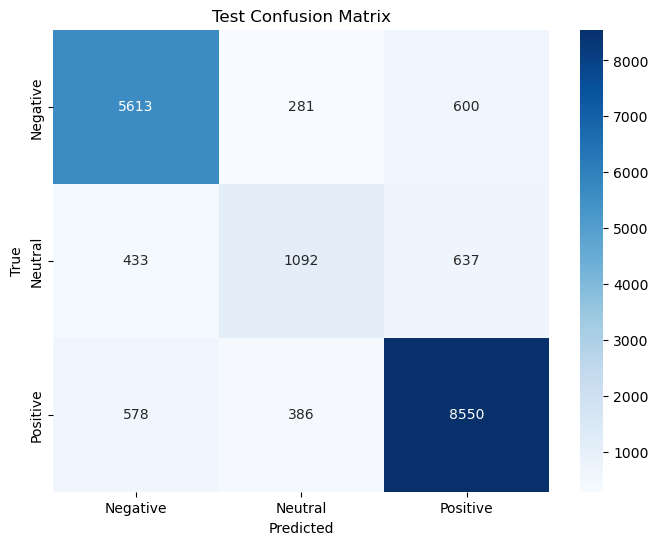

CPU times: total: 21 s
Wall time: 6 s


In [136]:
%%time
# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = logistic_regression_model.predict(X_test)

# Model Evaulation
# Calculate precision, recall, F1-score and Accuracy for the test set
logi_precision = precision_score(y_test, y_test_pred, average='weighted')
logi_recall = recall_score(y_test, y_test_pred, average='weighted')
logi_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy for the test set
logistic_accuracy = accuracy_score(y_test, y_test_pred)

# Print the computed metrics for the test set
print("Test Precision:", logi_precision)
print("Test Recall:", logi_recall)
print("Test F1-Score:", logi_f1)
print("Test Accuracy:", logistic_accuracy)

# Make predictions on the test set
#y_test_pred = logistic_regression_model.predict(X_test)

# Calculate the confusion matrix for the test set
test_confusion = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')
plt.show()


### MODEL 2: NAIVE BAYES

In [137]:
%%time
#Create and Train a Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 54.8 ms


MultinomialNB()

Test Accuracy: 0.7314804623004953
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      6494
           1       0.47      0.25      0.33      2162
           2       0.75      0.85      0.80      9514

    accuracy                           0.73     18170
   macro avg       0.66      0.61      0.62     18170
weighted avg       0.72      0.73      0.72     18170

Confusion Matrix:
 [[4702  248 1544]
 [ 512  547 1103]
 [1113  359 8042]]


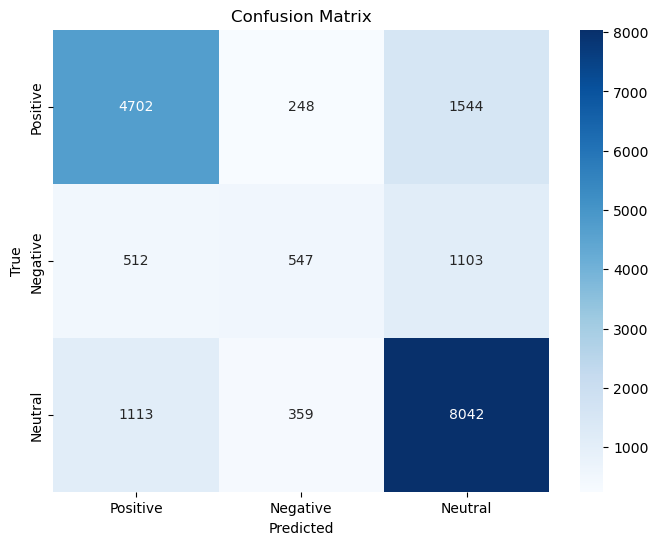

CPU times: total: 375 ms
Wall time: 355 ms


In [138]:
%%time
#  Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", naive_bayes_accuracy)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mtx)
# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Positive', 'Negative', 'Neutral']

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### MODEL 3: RANDOM FOREST

Random Forest Accuracy: 0.7916345624656026
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      6494
           1       0.70      0.45      0.55      2162
           2       0.78      0.91      0.84      9514

    accuracy                           0.79     18170
   macro avg       0.77      0.70      0.72     18170
weighted avg       0.79      0.79      0.78     18170

Confusion Matrix for Random Forest:
 [[4764  185 1545]
 [ 302  981  879]
 [ 633  242 8639]]


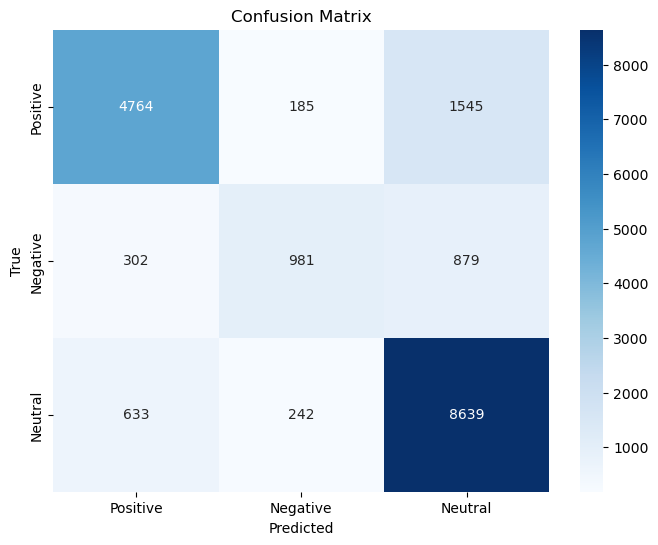

CPU times: total: 17min 18s
Wall time: 17min 25s


In [139]:
%%time
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate a classification report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", report_rf)

# Create a confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", confusion_matrix_rf)


# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### MODEL 4: SVM

### MODEL 5: XGBOOST

XGBoost Accuracy: 0.7385250412768299
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76      6494
           1       0.79      0.03      0.06      2162
           2       0.70      0.93      0.80      9514

    accuracy                           0.74     18170
   macro avg       0.78      0.55      0.54     18170
weighted avg       0.76      0.74      0.70     18170

Confusion Matrix for XGBoost:
 [[4473    3 2018]
 [ 225   69 1868]
 [ 622   15 8877]]


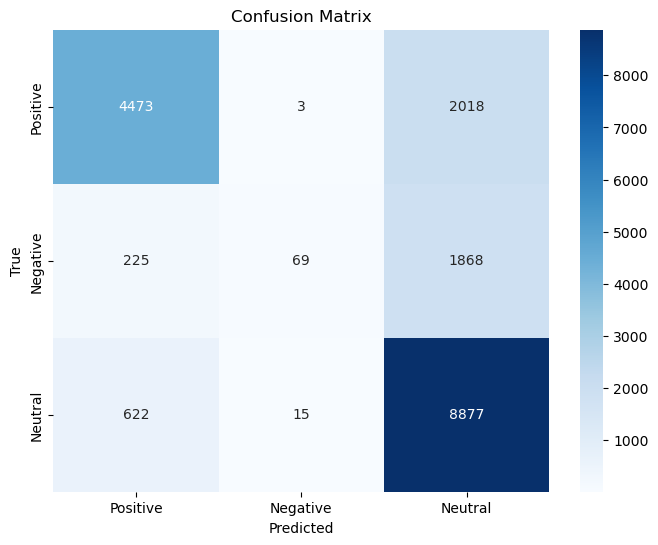

CPU times: total: 1min 32s
Wall time: 12.2 s


In [140]:
%%time
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgboost_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluate the model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print("XGBoost Accuracy:", accuracy_xgboost)

# Generate a classification report
report_xgboost = classification_report(y_test, y_pred_xgboost)
print("Classification Report for XGBoost:\n", report_xgboost)

# Create a confusion matrix
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print("Confusion Matrix for XGBoost:\n", confusion_matrix_xgboost)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Model Performance Comparisons

In [141]:
%%time
# Create a DataFrame to store the accuracy values
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost'],
    'Accuracy': [logistic_accuracy, naive_bayes_accuracy, accuracy_rf, accuracy_xgboost]
})

# Print the accuracy values
accuracy_df

CPU times: total: 0 ns
Wall time: 549 µs


Model  Accuracy
0  Logistic Regression  0.839571
1          Naive Bayes  0.731480
2        Random Forest  0.791635
3              XGBoost  0.738525

### Application of the Predicted Sentiments

In [142]:
%%time
# Create df_final DataFrame
df_final= df_sent.copy()

CPU times: total: 15.6 ms
Wall time: 16.4 ms


#### Generate Sentiment Scores Using the best Model

In [143]:
%%time
#Model Predictions
logistic_predictions = logistic_regression_model.predict(document_vectors)
naive_bayes_predictions = logistic_regression_model.predict(document_vectors)
rf_predictions =  random_forest_model.predict(document_vectors)
xgboost_predictions  = xgboost_model.predict(document_vectors)

CPU times: total: 15.9 s
Wall time: 14.2 s


In [144]:
%%time
# Create a DataFrame to store the accuracy values
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost'],
    'Accuracy': [logistic_accuracy, naive_bayes_accuracy, accuracy_rf, accuracy_xgboost]
})

# Find the model with the highest accuracy
best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]['Model']

# Assuming you have predictions for each model
# Use the predictions from the best model as the new feature
if best_model == 'Logistic Regression':
    df_final['Sentiment_Label'] = logistic_predictions
elif best_model == 'Naive Bayes':
    df_final['Sentiment_label'] = naive_bayes_predictions
elif best_model == 'Random Forest':
    df_final['Sentiment_Label'] = rf_predictions
elif best_model == 'XGBoost':
    df_final['Sentiment_Label'] = xgboost_predictions



CPU times: total: 0 ns
Wall time: 1.5 ms


In [145]:
%%time
df_final = df_final.drop('sentiment', axis=1)

CPU times: total: 141 ms
Wall time: 33.4 ms


In [146]:
%%time
df_final

CPU times: total: 0 ns
Wall time: 0 ns


URL  \
0                                   https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1                                 https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   
2                           https://archive.org/details/BBCNEWS_20170105_213000_Outside_Source#start/1111/end/1146   
3                             https://archive.org/details/BBCNEWS_20170105_210000_Outside_Source#start/798/end/833   
4                                   https://archive.org/details/BBCNEWS_20170111_030000_BBC_News#start/696/end/731   
...                                                                                                            ...   
94853                            https://archive.org/details/MSNBCW_20200107_100000_First_Look#start/1630/end/1665   
94854               https://archive.org/details/MSNBCW_20200110_010000_All_In_With_Chris_Hayes#start/3459/end/3494   
94855     https://archive.org/details/MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams#start/3209/end/3244   
94856  https://archive.org/details/MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell#start/3343/end/3378   
94857                https://archive.org/details/MSNBCW_20200114_050000_The_Rachel_Maddow_Show#start/2568/end/2603   

       Station                                  Show  \
0      BBCNEWS                              BBC News   
1      BBCNEWS                              BBC News   
2      BBCNEWS                        Outside Source   
3      BBCNEWS                        Outside Source   
4      BBCNEWS                              BBC News   
...        ...                                   ...   
94853    MSNBC                            First Look   
94854    MSNBC               All In With Chris Hayes   
94855    MSNBC     The 11th Hour With Brian Williams   
94856    MSNBC  The Last Word With Lawrence ODonnell   
94857    MSNBC                The Rachel Maddow Show   

                                                          IAShowID  \
0                                 BBCNEWS_20170131_054500_BBC_News   
1                                 BBCNEWS_20170118_190000_BBC_News   
2                           BBCNEWS_20170105_213000_Outside_Source   
3                           BBCNEWS_20170105_210000_Outside_Source   
4                                 BBCNEWS_20170111_030000_BBC_News   
...                                                            ...   
94853                            MSNBCW_20200107_100000_First_Look   
94854               MSNBCW_20200110_010000_All_In_With_Chris_Hayes   
94855     MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams   
94856  MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell   
94857                MSNBCW_20200114_050000_The_Rachel_Maddow_Show   

                                                                                                                                                                                                                                                                   No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                   

#### Overall Sentiment Scores Per Topic

In [147]:
%%time
#Calculate the Overal sentiment scores for each topic
def calculate_topic_sentiment(col):
    # Group data by topics and calculate the mean sentiment score for each topic
    aggregated_df = df_final.groupby('Topic_Name')['Sentiment_Label'].mean()
    return aggregated_df

# Call the function to get the aggregated sentiment scores
aggregated_sentiments = calculate_topic_sentiment(df)

# Calculate the overall mean sentiment score
overall_mean_sentiment = aggregated_sentiments.mean()

#Categorize topics as negative or positive with mean as the median
negative_topics = aggregated_sentiments[aggregated_sentiments < overall_mean_sentiment].index.tolist()
positive_topics = aggregated_sentiments[aggregated_sentiments >= overall_mean_sentiment].index.tolist()

# Access the lists of negative and positive sentiment topics
print("Overall Sentiment Mean:", overall_mean_sentiment)
print('---------------------------------------------')
print("Sentiment_scores:", aggregated_sentiments)
print('---------------------------------------------')
print("Negative Sentiment Topics:", negative_topics)
print('---------------------------------------------')
print("Positive Sentiment Topics:", positive_topics)



Overall Sentiment Mean: 1.1159738568140143
---------------------------------------------
Sentiment_scores: Topic_Name
Awareness and Concerns         1.023602
Climate Action                 1.019276
Global Warming Discourse       1.231852
Greenhouse Gas Emissions       0.903291
Human Impact                   0.816343
News and Government Actions    1.198873
Policy and Agreements          1.389851
Political Actions              1.233934
Public Opinion                 1.089105
Scientific Consensus           1.253612
Name: Sentiment_Label, dtype: float64
---------------------------------------------
Negative Sentiment Topics: ['Awareness and Concerns', 'Climate Action', 'Greenhouse Gas Emissions', 'Human Impact', 'Public Opinion']
---------------------------------------------
Positive Sentiment Topics: ['Global Warming Discourse', 'News and Government Actions', 'Policy and Agreements', 'Political Actions', 'Scientific Consensus']
CPU times: total: 15.6 ms
Wall time: 20.5 ms


#### Add Sentiment_Score Feature

In [148]:
%%time
# Merge the 'aggregated_sentiments' Series with 'df_final' on the 'Topic_Name' column
df_final = df_final.merge(aggregated_sentiments, left_on='Topic_Name', right_index=True, how='left')

# Rename the columns
df_final.rename(columns={'Sentiment_Label_x': 'Sentiment_Label', 'Sentiment_Label_y': 'Sentiment_Score'}, inplace=True)

# Display the updated DataFrame
df_final


CPU times: total: 31.2 ms
Wall time: 41.6 ms


URL  \
0                                   https://archive.org/details/BBCNEWS_20170131_054500_BBC_News#start/493/end/528   
1                                 https://archive.org/details/BBCNEWS_20170118_190000_BBC_News#start/1246/end/1281   
2                           https://archive.org/details/BBCNEWS_20170105_213000_Outside_Source#start/1111/end/1146   
3                             https://archive.org/details/BBCNEWS_20170105_210000_Outside_Source#start/798/end/833   
4                                   https://archive.org/details/BBCNEWS_20170111_030000_BBC_News#start/696/end/731   
...                                                                                                            ...   
94853                            https://archive.org/details/MSNBCW_20200107_100000_First_Look#start/1630/end/1665   
94854               https://archive.org/details/MSNBCW_20200110_010000_All_In_With_Chris_Hayes#start/3459/end/3494   
94855     https://archive.org/details/MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams#start/3209/end/3244   
94856  https://archive.org/details/MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell#start/3343/end/3378   
94857                https://archive.org/details/MSNBCW_20200114_050000_The_Rachel_Maddow_Show#start/2568/end/2603   

       Station                                  Show  \
0      BBCNEWS                              BBC News   
1      BBCNEWS                              BBC News   
2      BBCNEWS                        Outside Source   
3      BBCNEWS                        Outside Source   
4      BBCNEWS                              BBC News   
...        ...                                   ...   
94853    MSNBC                            First Look   
94854    MSNBC               All In With Chris Hayes   
94855    MSNBC     The 11th Hour With Brian Williams   
94856    MSNBC  The Last Word With Lawrence ODonnell   
94857    MSNBC                The Rachel Maddow Show   

                                                          IAShowID  \
0                                 BBCNEWS_20170131_054500_BBC_News   
1                                 BBCNEWS_20170118_190000_BBC_News   
2                           BBCNEWS_20170105_213000_Outside_Source   
3                           BBCNEWS_20170105_210000_Outside_Source   
4                                 BBCNEWS_20170111_030000_BBC_News   
...                                                            ...   
94853                            MSNBCW_20200107_100000_First_Look   
94854               MSNBCW_20200110_010000_All_In_With_Chris_Hayes   
94855     MSNBCW_20200115_050000_The_11th_Hour_With_Brian_Williams   
94856  MSNBCW_20200105_030000_The_Last_Word_With_Lawrence_ODonnell   
94857                MSNBCW_20200114_050000_The_Rachel_Maddow_Show   

                                                                                                                                                                                                                                                                   No_StopWord  \
0                                                                                                                                                                beena part airline industry part move reduce carbon teal last year teal agreed deal curb greenhouse gases sol   
1                                                                                 beaten 0.1 0.12 degrees celsius seem like lot terms yearly variations actually huge part rise caused el nino event warm ocean current disrupts world weather scientists say greenhouse gases   
2                                              contact expected co nta ct le ns expected contact lens come eye good catch terms policy already pushback global warming interesting see backdrop president trump coming oval office saying things like climate change something   
3                                                                                   

### Topic Sentiment Plot

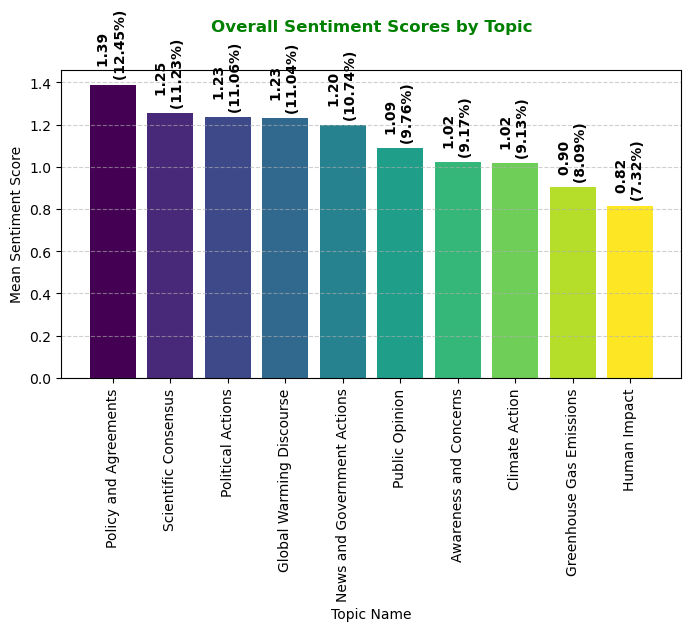

CPU times: total: 547 ms
Wall time: 541 ms


In [219]:
%%time
# Group the data by 'Topic_Name' and calculate the mean sentiment score for each topic
topic_sentiments = df_final.groupby('Topic_Name')['Sentiment_Score'].mean()

# Sort the topics by sentiment score
topic_sentiments = topic_sentiments.sort_values(ascending=False)
# Calculate the percentage
total = topic_sentiments.sum()
percentages = (topic_sentiments / total) * 100

# Create a list of different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(topic_sentiments)))

# Create a bar plot with different colors
plt.figure(figsize=(8, 4))
plt.bar(topic_sentiments.index, topic_sentiments, color=colors)
plt.xlabel('Topic Name')
plt.ylabel('Mean Sentiment Score')
plt.title('Overall Sentiment Scores by Topic', y=1.1, fontweight='bold', color='green')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)

# Add vertical data labels to the bars
for i, count in enumerate(topic_sentiments):
    label = f"{count:.2f} \n ({percentages[i]:.2f}%)"
    plt.text(i, count, label, ha='center', va='bottom', rotation='vertical', fontweight='bold')

# Display the plot
plt.show()


__Scientific Consensus and Public Opinion deplays average overal sentiment strength while Climate Action, News and Government Actions, Greenhouse Gas Emissions and Political Actions exhibit very strong sentiment strength__


The plot displaying the sentiment scores/strengths for different topics is important for several reasons:

>*    Topic Analysis: It provides a visual representation of how different topics or categories are perceived in terms of sentiment. This helps in understanding which topics are generally associated with positive or negative sentiments.

>*    Content Focus: This analysis helps the stations to understand which topics require more attention or focus. For example, the need to pay more attention to topics with lower sentiment scores to improve user satisfaction.

>*    Content Strategy: It can inform your content strategy. If some topics consistently have high sentiment scores, stations might want to create more content around those topics. Conversely, if some topics have low sentiment scores, stations might want to adjust their messaging or content.

## Sentiment Vs Topic Popularity Relationship

In [150]:
df_final.columns

Index(['URL', 'Station', 'Show', 'IAShowID', 'No_StopWord', 'Year', 'Month',
       'Day', 'Season', 'Cluster_Labels', 'Cluster_Name', 'Topic_Name',
       'Topic_Class', 'Overall_Trend_Score', 'PopularityLabel',
       'Sentiment_Label', 'Sentiment_Score'],
      dtype='object')

In [151]:
#mean_sentiment = df_final.groupby(['Overall Trend Score', 'Sentiment Score'])['Sentiment Score'].mean()

mean_sentiment = df_final.groupby(['Overall_Trend_Score', 'Sentiment_Score'])['Sentiment_Score'].transform('mean')
mean_sentiment

0        1.198873
1        1.089105
2        1.231852
3        1.019276
4        1.231852
           ...   
94853    1.023602
94854    1.389851
94855    1.389851
94856    1.389851
94857    1.023602
Name: Sentiment_Score, Length: 90847, dtype: float64

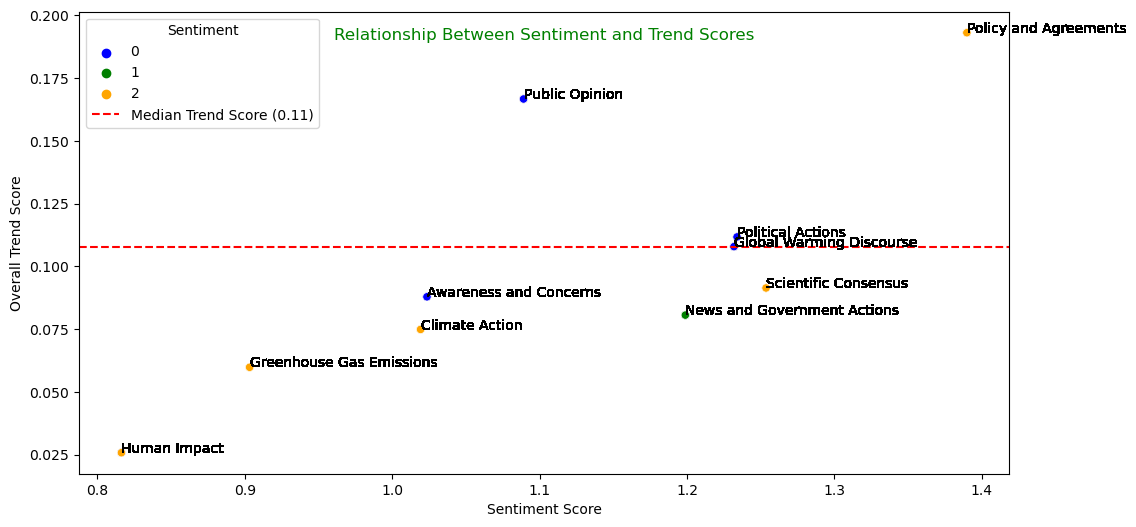

CPU times: total: 7min
Wall time: 7min 5s


In [224]:
%%time

# Create a scatterplot with custom colors
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_final, x='Sentiment_Score', y='Overall_Trend_Score', hue='Sentiment_Label',
    palette={0: 'blue', 1: 'green', 2: 'orange'}  # Apply the custom color palette
)

# Calculate the median of Overall Trend Score
median_trend_score = df_final['Overall_Trend_Score'].median()

# Add a horizontal median line
plt.axhline(median_trend_score, color='red', linestyle='--', label=f'Median Trend Score ({median_trend_score:.2f})')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Overall Trend Score')
plt.title('Relationship Between Sentiment and Trend Scores', fontsize=12, color='green', y=0.92)

# Show the legend
plt.legend(title='Sentiment')

# Add topic names to each point
for i, row in df_final.iterrows():
    plt.text(row['Sentiment_Score'], row['Overall_Trend_Score'], row['Topic_Name'], fontsize=10)

# Display the plot
plt.show()


__Observation:__ 

>* Topics with low sentiment score/strength are less popular while topics with high or strong sentiment score/strength are more popular 
>* Most of the positive messages did not have a strong sentiment score as compared to negative messages hence scored low popularity

>> __Improving the overall sentiment score of all topics would probably improve their popularity. The recommendation system to consider this.__
>* If Climate topics with negative sentiment are garnering higher popularity (as indicated by higher "Overall Trend Scores") compared to messages with positive sentiment, it suggests that public attention and engagement may be driven more by negative or alarming information related to climate topics.

> In the context of climate topics, negative sentiment may be associated with issues such as environmental crises, extreme weather events, or the consequences of climate change, which can capture public interest and concern.

________

## Recommendation System Strategy

From the above graph we observe that topics with low popularity have weak sentiment stregths. By focusing on this topics, we form our recommendation strategy to improve topical holistic coverage by making recommendations on topics that fit this characteristic. Climate change stakeholders can target areas to tailor their strategied to increase coverage and engagement. For example this can include shifting the message sentiment to be more issue-based and action-oriented can also be an effective way to drive attention and encourage discussions on critical topics on climate change.

Here's a more detailed breakdown of how this strategy that defines the system's goals:

>1. __Identify Low Popularity Topics:__ Your system should use data analytics to identify topics that are receiving low media coverage or public attention. These topics represent opportunities for increased visibility and engagement.

>2. __Analyze Sentiment:__ Analyzing sentiment scores within the identified low popularity topics is crucial. Both strong Positive and negative sentiment indicates an opportunity to drive higher popularity narratives and action. If there's low engagement in these topics, improving sentiment scores can help draw more attention.

>3. __Recommendations:__ Once low popularity topics with low sentiments scores are identified, the system can provide recommendations for higher coverage to interested stakeholders. This may include suggesting content, campaigns, or messaging strategies to address these topics effectively.

>4. __Message Shift:__ To make topics more issue-based, it's essential to craft messages that highlight the urgency and importance of the topic. Shifting the sentiment to be more action-oriented can encourage individuals and organizations to take part in discussions and initiatives related to these topics.

# _____________________________________

# NON PERSONALIZED HYBRID RECOMMENDATION SYSTEM

> A non-personalized recommendation system, also known as an "unpersonalized" or "generic" recommendation system, provides recommendations that are not tailored to the preferences, behavior, or characteristics of individual users. Instead, non-personalized recommendation systems offer the same set of recommendations to all users or a group of users without considering their specific interests or past interactions.

## Model Approach

__Model that can recommend topics based on both historical and current date__

To achieve both aspects of recommending topics based on historical data and recommending topics to stations based on the current date, we design a hybrid non personalized recommendation system. This system will consider both long-term historical data and real-time data. 

__Approach:__

>*    __Historical Recommendation:__
>        We Use historical data (including topics, stations, and their interactions) to build a collaborative filtering model. Collaborative filtering is a common technique to recommend topics based on user (station) history.

>*    __Real-Time Recommendation:__
>        For real-time recommendations, we consider the current date and any additional real-time data (e.g., trends, user interactions).
        We use embeddings for the current date (Year, Month, Day) to capture trends and seasonal patterns over time.

>*    __Hybrid Model:__
>        We build a hybrid recommendation model that combines both collaborative filtering and real-time recommendations.

## Feature Preparation

In [236]:
%%time
df = df_final.copy()

CPU times: total: 1.61 s
Wall time: 1.83 s


In [237]:
%%time
columns_to_drop = ['URL', 'IAShowID', 'Cluster_Labels', 'Topic_Class']
df = df.drop(columns_to_drop, axis=1)


CPU times: total: 15.6 ms
Wall time: 77.6 ms


### Check the Vocab Size 

In [156]:
%%time

# Function to tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the sentences in X_train and create a set of unique words
topic_unique_words = set(word for sentence in df['Topic_Name'] for word in tokenize_text(sentence))

# Get the total number of unique words
vocab_size = len(topic_unique_words)

print("Vocabulary:", vocab_size)


Vocabulary: 23
CPU times: total: 9.25 s
Wall time: 9.3 s


### Check Year Length

In [157]:
%%time
# Calculate the maximum text length in the 'Topic_Name' column
max_text_length_topic = df['Topic_Name'].apply(len).max()

print("Maximum topic Length:", max_text_length_topic)

# Calculate the maximum text length in the 'Topic_Name' column
max_text_length_station = df['Station'].apply(len).max()

print("Maximum station Length:", max_text_length_station)

max_year = df['Year'].max()
min_year = df['Year'].min()
print('Max and Min Year:', max_year, min_year)
max_year - min_year + 1

Maximum topic Length: 27
Maximum station Length: 7
Max and Min Year: 2020 2009
CPU times: total: 78.1 ms
Wall time: 83.5 ms


12

### Confirm Dtypes

In [158]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90847 entries, 0 to 94857
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Station              90847 non-null  object 
 1   Show                 90847 non-null  object 
 2   No_StopWord          90847 non-null  object 
 3   Year                 90847 non-null  int64  
 4   Month                90847 non-null  int64  
 5   Day                  90847 non-null  int64  
 6   Season               90847 non-null  object 
 7   Cluster_Name         90847 non-null  object 
 8   Topic_Name           90847 non-null  object 
 9   Overall_Trend_Score  90847 non-null  float64
 10  PopularityLabel      90847 non-null  int64  
 11  Sentiment_Label      90847 non-null  int32  
 12  Sentiment_Score      90847 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 9.4+ MB
CPU times: total: 172 ms
Wall time: 158 ms


### Convert to categorical dtypes

In [159]:
%%time
# List of columns to convert to categorical
columns_to_convert = ['Station', 'Show', 'Year', 'Month', 'Day', 
                      'Cluster_Name', 'Topic_Name',
                     'PopularityLabel', 'Sentiment_Label']

# Convert the specified columns to categorical
for column in columns_to_convert:
    df[column] = df[column].astype('category')

CPU times: total: 109 ms
Wall time: 107 ms


### Label Encoding

In [160]:
%%time
from sklearn.preprocessing import LabelEncoder

# List of columns to convert to numerical using label encoding
columns_to_encode = columns_to_convert
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

CPU times: total: 109 ms
Wall time: 99.6 ms


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90847 entries, 0 to 94857
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Station              90847 non-null  int32  
 1   Show                 90847 non-null  int32  
 2   No_StopWord          90847 non-null  object 
 3   Year                 90847 non-null  int64  
 4   Month                90847 non-null  int64  
 5   Day                  90847 non-null  int64  
 6   Season               90847 non-null  object 
 7   Cluster_Name         90847 non-null  int32  
 8   Topic_Name           90847 non-null  int32  
 9   Overall_Trend_Score  90847 non-null  float64
 10  PopularityLabel      90847 non-null  int64  
 11  Sentiment_Label      90847 non-null  int64  
 12  Sentiment_Score      90847 non-null  float64
dtypes: float64(2), int32(4), int64(5), object(2)
memory usage: 8.3+ MB


### Dataset Spliting

Splitting the dataset into separate sets as described above can help in achieving the project aim in several ways:

>*    Training, Validation, and Testing: By splitting the data into training, validation, and testing sets, we can train  the recommendation system model on the training data, tune its hyperparameters and monitor its performance on the validation set, and finally, evaluate its effectiveness on unseen data using the test set. This process ensures that your model generalizes well to new data.

>*    Feature Separation: Splitting the features into separate data structures for each feature allows the model to learn from individual aspects of the data. For example, 'Station', 'Topic_Name', 'Overall_Trend_Score', and 'Sentiment_Label' are crucial features that can influence the recommendation system. By keeping them separate, the model can better understand and leverage these features to make recommendations.

>*    Target Variable: 'PopularityLabel' is the target variable that indicates the popularity of a topic. By keeping it separate in the 'y' variable, you enable the model to learn the patterns that lead to higher or lower popularity. This separation is essential for training a supervised learning model to predict the popularity label.

>*    Hyperparameter Tuning: With a validation set, you can fine-tune the hyperparameters of your model. For example, you can experiment with different embedding sizes, neural network architectures, or learning rates to optimize the recommendation system's performance based on your project's goals.

>*    Evaluation: The testing set provides an unbiased evaluation of your recommendation system's performance. It allows you to assess how well your model can recommend topics with adequate attention or low popularity based on historical data.

In summary, splitting the dataset in this manner helps in training, validating, and evaluating the recommendation system model effectively to make accurate recommendations for topics with low popularity, which aligns with the project aim.

### Check and Address class imbalance

In [162]:
df.PopularityLabel.value_counts()

0    60868
1    29979
Name: PopularityLabel, dtype: int64

In [163]:
%%time
from sklearn.model_selection import train_test_split


# Define your feature columns and target variable
X_station = df['Station']
X_topic = df['Topic_Name']
#X_overall_trend_score = df['Overall_Trend_Score']
X_sentiment_label = df['Sentiment_Label']
X_sentiment_score = df['Sentiment_Score']
X_year = df['Year']
X_month = df['Month']
X_day = df['Day']

y = df['PopularityLabel']

# Split the data into training, validation, and testing sets
X_station_train, X_station_temp, X_topic_train, X_topic_temp, \
X_sentiment_label_train, X_sentiment_label_temp,\
X_sentiment_score_train, X_sentiment_score_temp, \
X_year_train, X_year_temp, X_month_train, X_month_temp, X_day_train, \
X_day_temp, y_train, y_temp = train_test_split(X_station, X_topic,\
                                                X_sentiment_label,\
                                               X_sentiment_score, X_year, X_month, X_day, y, \
                                               test_size=0.3, random_state=42)

#validation, and testing sets
X_station_val, X_station_test, X_topic_val, X_topic_test, \
X_sentiment_label_val, X_sentiment_label_test, \
X_sentiment_score_val, X_sentiment_score_test, X_year_val,\
X_year_test, X_month_val, X_month_test, X_day_val, X_day_test, \
y_val, y_test = train_test_split(X_station_temp, X_topic_temp,\
                                 X_sentiment_label_temp, \
                                 X_sentiment_score_temp, X_year_temp, \
                                 X_month_temp, X_day_temp, y_temp, test_size=0.5, random_state=42)


CPU times: total: 31.2 ms
Wall time: 31.4 ms


In [164]:
%%time
# Check the shapes of the splits
X_station_train.shape, X_topic_train.shape, X_sentiment_label_train.shape, \
X_sentiment_score_train.shape, X_year_train.shape, X_month_train.shape, \
X_day_train.shape, y_train.shape, X_station_val.shape, X_topic_val.shape, \
X_sentiment_label_val.shape, X_sentiment_score_val.shape, X_year_val.shape,\
X_month_val.shape, X_day_val.shape, y_val.shape, X_station_test.shape,\
X_topic_test.shape, X_sentiment_label_test.shape, X_sentiment_score_test.shape,\
X_year_test.shape, X_month_test.shape, X_day_test.shape, y_test.shape


CPU times: total: 0 ns
Wall time: 0 ns


((63592,),
 (63592,),
 (63592,),
 (63592,),
 (63592,),
 (63592,),
 (63592,),
 (63592,),
 (13627,),
 (13627,),
 (13627,),
 (13627,),
 (13627,),
 (13627,),
 (13627,),
 (13627,),
 (13628,),
 (13628,),
 (13628,),
 (13628,),
 (13628,),
 (13628,),
 (13628,),
 (13628,))

#### Class Weighting

> One way to address class imbalance in an ANN is by assigning different weights to the classes. Most machine learning frameworks allow you to assign different weights to each class. We assign higher weights to the minority class, which effectively makes misclassifications of the minority class more costly during training without altering the dataset.  By assigning higher weights to the minority class, we make the network pay more attention to it during training.

Class weighting was the most recommended since other methods affect the number of class representations in the dataset thus affecting our popularity score.

#### Calculate the class weights:

In [165]:
%%time
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weight_dict

CPU times: total: 0 ns
Wall time: 0 ns


{0: 0.7458247325952336, 1: 1.5169847328244275}

> In the above code, we calculate the class weights using the compute_class_weight function and provide them as a dictionary to the class_weight parameter when calling train_test_split. When training the machine learning model, we pass these class weights to model.

## ______________________________________

## MODEL DEVELOPMENT: HYBRID ANN MODEL

### Why Artificial Neural Network:
>    Its ability to capture the underlying patterns and relationships from the data to learn representations and use these representations to make recommendations including the __ability to model non-linear relationships.__ Matrix Factorization based methods can do the same but Deep Learning based methods are best at capturing the non linear relationships


### Model Breakdown

A hybrid recommendation model that combines historical data embeddings with real-time data embeddings to make recommendations. The model takes multiple inputs, including station, topic, overall trend score, sentiment, sentiment score, year, month, and day, and produces a binary output. Here's a breakdown of the model:


1. __Input layers__

To improve media coverage and highlight low popularity topics and bring them to the forefront, we start by defining the key elements of our recommendation system. These elements form the foundation for our advanced model, which uses historical and real-time data to provide valuable recommendations to media stations.

Our system's core consists of input layers, each focusing on specific data dimensions

>*    __Station Input (Station):__ This layer is dedicated to media stations, representing the entities responsible for broadcasting news, stories, and discussions. The 'Station' input allows us to identify each station individually, facilitating personalized recommendations tailored to their unique coverage patterns.

>*    __Topic Input (Topic):__ Topics are the focal points of our media landscape. The 'Topic' input is where we categorize and represent the various subjects, issues, and themes that encompass our coverage. By recognizing topics, we lay the foundation for understanding what our stations are reporting on.

>*    __Sentiment Input (Sentiment):__ Sentiments, whether positive, negative, or neutral, add a layer of emotional context to media coverage. The 'Sentiment' input helps us gauge the emotional tone of news articles and stories.

>*    __Sentiment Score Input (Sentiment_Score):__ In conjunction with sentiment, the 'Sentiment_Score' input quantifies the intensity of emotions. It gives us a nuanced understanding of how strongly a particular sentiment is expressed within a given piece of content.

>*    __Year, Month, and Day Inputs (Year, Month, Day):__ For real-time recommendations, the inputs 'Year,' 'Month,' and 'Day' allow us to integrate the present date, ensuring that recommendations are timely and aligned with the dynamics of the media landscape on a particular day.

These input layers, collectively, constitute the information universe of our recommendation system. They are the keys to unlocking insights from both historical data and the latest trends, ultimately guiding our mission to shed light on underrepresented topics in the media world. By fusing these dimensions, we aim to offer media stations a comprehensive perspective on what topics deserve their attention and coverage, bridging the gap between unexplored subjects and the broader audience.



__2. Input Embedding Layers:__ 

Embedding layers are used to convert categorical features into dense vectors:
>* station_embedding
>* topic_embedding
>* sentiment_embedding
>* year_embedding
>* month_embedding
>* day_embedding

__3. Combining Historical and Real-Time Data:__
>* The embeddings for station, topic, and sentiment are concatenated into combined_embeddings.
>* The embeddings for year, month, and day are concatenated into real_time_data.


__4. Flatten and Fully Connected Layers:__
>* The combined_data is flattened.
>* A fully connected layer with ReLU activation and batch normalization follows.

__5. Output Layer:__
>The model has a single output layer with a sigmoid activation function, which is typically used for binary classification tasks.

__6. Compilation:__
>The model is compiled with binary cross-entropy as the loss function, mean absolute error (MAE), and mean squared error (MSE) as metrics, and the Adam optimizer.

__7. Target Feature:__ 
>*    Popularity Label (PopularityLabel): Popularity plays a vital role in determining the prevalance of a topic. The 'PopularityLabel' target distinguishes between widely covered topics and those that remain in the shadows. It is a crucial element in our effort to highlight underrepresented subjects.

This model forms a hybrid recommendation system that combines collaborative filtering with real-time data. We use this model to make recommendations based on the provided input features, where the output represents a binary classification result.

>*    __Overall Trend Score (Overall_Trend_Score):__ A continious feature was used to derive the popilarity_Label. It's is used to account for trends in media coverage. It quantifies the overarching patterns and trending topics across all media outlets. This feature is not used in the system. 

### Hyperparameter Tuning

In [166]:
%%time
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

# Define your hyperparameters
start_lr = 0.00001  # Starting learning rate
min_lr = 0.00001   # Minimum learning rate
max_lr = 0.01   # Maximum learning rate
batch_size = 64    # batch size based on dataset size

rampup_epochs = 5   # Number of epochs for learning rate warm-up
sustain_epochs = 0  # Number of epochs with a sustained high learning rate
exp_decay = 0.8     # Exponential decay factor

# Define the learning rate schedule
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# Model checkpoint callback
checkpoint_filepath = './weights.h5'
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback
early_stopping = EarlyStopping(patience=3, monitor='val_loss',  
                               mode='min', restore_best_weights=True)

# Put all callbacks in a list
my_callbacks = [model_checkpoints, lr_callback, early_stopping]


CPU times: total: 31.2 ms
Wall time: 16.8 ms


### Model Architecture

In [167]:
%%time
vocab_size = 100
embedding_size = 128
np.random.seed(42)

# Replace min_year and max_year with the actual values
# min_year = 2009
# max_year = 2020

# Create a one-hot encoded representation of 'Year'
num_years = max_year - min_year + 1
year_input = Input(name='Year', shape=[1], dtype='int64')

# Define input layers
station = Input(name='Station', shape=[1], dtype='int64')
topic = Input(name='Topic', shape=[1], dtype='int64')
sentiment_label = Input(name='Sentiment_Label', shape=[1], dtype='int64')
sentiment_score = Input(name='Sentiment_Score', shape=[1], dtype='float64')
year = Input(name='Year', shape=[1], dtype='int64')  # Year as a categorical feature with embeddings
month = Input(name='Month', shape=[1], dtype='int64')
day = Input(name='Day', shape=[1], dtype='int64')

# Historical Embeddings
station_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_size)(station)
topic_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_size)(topic)
sentiment_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_size)(sentiment_label)

# Real-Time Data Embeddings
year_embedding = Embedding(input_dim=num_years, output_dim=embedding_size)(year)
month_embedding = Embedding(input_dim=12, output_dim=embedding_size)(month)
day_embedding = Embedding(input_dim=31, output_dim=embedding_size)(day)


# Embedding for Sentiment_Score (continuous)
sentiment_score_embedding = Dense(embedding_size, activation='relu')(sentiment_score)
sentiment_score_embedding = Reshape((1, embedding_size))(sentiment_score_embedding)  # Reshape to match the other embeddings

# Combine all embeddings
combined_embeddings = Concatenate()([station_embedding, topic_embedding, sentiment_embedding, sentiment_score_embedding, year_embedding, month_embedding, day_embedding])

# Concatenate all features
x = Flatten()(combined_embeddings)
x = Dense(256, activation='relu')(x)  # Dense layer with 256 units and ReLU activation
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units and ReLU activation
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)  # Dense layer with 64 units and ReLU activation
x = BatchNormalization()(x)
output = Dense(1, activation='sigmoid')(x)

# Create the hybrid model
model = tf.keras.Model(inputs=[station, topic, sentiment_label, sentiment_score, year, month, day], outputs=output)

# Display model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Sentiment_Score (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                                  
 Station (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 Topic (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 Sentiment_Label (InputLaye  [(None, 1)]                  0         []                        

### Compile the model

In [168]:
%%time
# Compile the model with accuracy metric
model.compile(loss='binary_crossentropy', metrics=["mae", "mse", "accuracy"], optimizer='Adam')


CPU times: total: 15.6 ms
Wall time: 13 ms


### Train the model

In [169]:
%%time
# Train the model
history = model.fit(
        [X_station_train, X_topic_train, X_sentiment_label_train, X_sentiment_score_train, X_year_train, X_month_train, X_day_train],
        y_train,
        epochs=10,  # Number of epochs
        batch_size=64,  # Adjust the batch size
    
        validation_data=(
            [X_station_val, X_topic_val, X_sentiment_label_val, X_sentiment_score_val, X_year_val, X_month_val, X_day_val],
            y_val
        ),  callbacks=my_callbacks
    )

# Evaluate the model on the test set
test_loss, test_mae, test_mse, test_accuracy = model.evaluate(
    [X_station_test, X_topic_test, X_sentiment_label_test, X_sentiment_score_test, X_year_test, X_month_test, X_day_test],
    y_test
)
model.load_weights(checkpoint_filepath)

Epoch 1/10
994/994 [==============================] - 16s 12ms/step - loss: 0.2370 - mae: 0.1801 - mse: 0.0656 - accuracy: 0.9224 - val_loss: 0.0622 - val_mae: 0.0584 - val_mse: 0.0067 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 2/10
994/994 [==============================] - 12s 12ms/step - loss: 0.0015 - mae: 0.0015 - mse: 5.1838e-05 - accuracy: 1.0000 - val_loss: 6.4396e-05 - val_mae: 6.4392e-05 - val_mse: 6.9647e-09 - val_accuracy: 1.0000 - lr: 0.0020
Epoch 3/10
994/994 [==============================] - 12s 12ms/step - loss: 1.0061e-04 - mae: 1.0052e-04 - mse: 1.9020e-07 - accuracy: 1.0000 - val_loss: 1.1506e-05 - val_mae: 1.1504e-05 - val_mse: 2.7040e-10 - val_accuracy: 1.0000 - lr: 0.0040
Epoch 4/10
994/994 [==============================] - 12s 12ms/step - loss: 1.9206e-05 - mae: 1.9202e-05 - mse: 4.3604e-09 - accuracy: 1.0000 - val_loss: 2.1842e-06 - val_mae: 2.1837e-06 - val_mse: 7.5851e-12 - val_accuracy: 1.0000 - lr: 0.0060
Epoch 5/10
994/994 [============================

### Model Evaluation

In [170]:
%%time
results = model.evaluate(
    [X_station_test, X_topic_test, X_sentiment_label_test, 
     X_sentiment_score_test, X_year_test, X_month_test, X_day_test],
    y_test
)

# Results is a list containing the values of test_loss, test_mae, test_mse, and any other metrics
test_loss, test_mae, test_mse, accuracy = results

print("Test Loss:", test_loss)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test Accuracy:", accuracy)

426/426 [==============================] - 2s 4ms/step - loss: 2.8521e-08 - mae: 2.8518e-08 - mse: 1.2661e-15 - accuracy: 1.0000
Test Loss: 2.8520730666059535e-08
Test MAE: 2.851778013734929e-08
Test MSE: 1.2661012273589446e-15
Test Accuracy: 1.0
CPU times: total: 3.75 s
Wall time: 2 s


The training output you provided indicates that the model is making significant progress, and it's converging to very low values of loss and metrics like mean absolute error (mae), mean squared error (mse), and accuracy. The learning rate (lr) is also being adjusted during training.

Here's a summary of what's happening during each epoch:

>    The loss values start high and decrease significantly with each epoch.
>    Metrics like mae, mse, and accuracy are also improving and approaching very low values.
>    The learning rate (lr) is being adjusted during training. This is a common practice to fine-tune the training process. The learning rate determines how quickly the model learns, and decreasing it as training progresses can help the model converge to a better solution.

In summary, it appears that the model is learning the training data well, and it's achieving high accuracy on both the training and validation sets. This suggests that the model is fitting the data almost perfectly, which can be a good sign. However, it's important to monitor for overfitting, especially if the model's performance on the validation set starts to degrade.

### Model Training curve

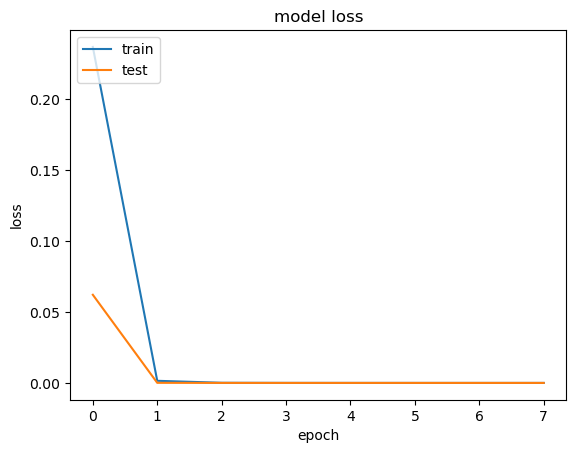

CPU times: total: 234 ms
Wall time: 239 ms


In [171]:
%%time
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

426/426 [==============================] - 2s 3ms/step
------------------------------------------------

Confusion Matrix for Model 1a:
[[9127    0]
 [   0 4501]]

Classification Report for Model 1a:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00      9127
     class_1       1.00      1.00      1.00      4501

    accuracy                           1.00     13628
   macro avg       1.00      1.00      1.00     13628
weighted avg       1.00      1.00      1.00     13628

------------------------------------------------


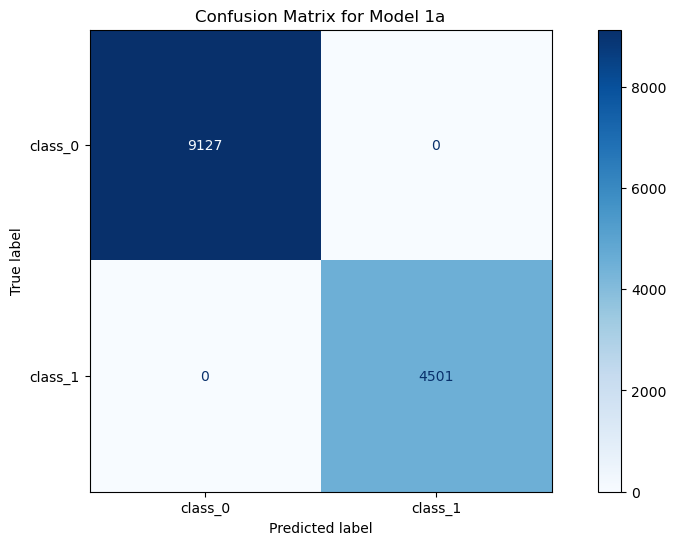

CPU times: total: 3.61 s
Wall time: 2.34 s


In [172]:
%%time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Make predictions for model2
y_pred = model.predict([
    X_station_test, X_topic_test, X_sentiment_label_test, 
     X_sentiment_score_test, X_year_test, X_month_test, X_day_test]
)
y_pred = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification

# Calculate confusion matrices
cm = confusion_matrix(y_test, y_pred)

# Classification report for model2
report = classification_report(y_test, y_pred, target_names=['class_0', 'class_1'])

print('------------------------------------------------')

print("\nConfusion Matrix for Model 1a:")
print(cm)
print("\nClassification Report for Model 1a:")
print(report)
print('------------------------------------------------')
# Plot confusion matrices
fig, ax = plt.subplots(figsize=(12, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class_0', 'class_1'])
disp.plot(cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix for Model 1a")

plt.show()

The confusion matrix and classification report for your Model indicate that your model is performing exceptionally well with an accuracy of 1.00, precision, recall, and F1-score of 1.00 for both classes. This means that model is making perfect predictions on your test data for both class_0 and class_1. The confusion matrix shows that there are no false positives or false negatives.

Here's a breakdown of the metrics:

>    Precision: The precision for both class_0 and class_1 is 1.00, which means that when the model predicts a sample as class_0 or class_1, it is always correct.

>    Recall: The recall for both class_0 and class_1 is 1.00, indicating that the model correctly identifies all instances of class_0 and class_1.

>    F1-score: The F1-score for both class_0 and class_1 is 1.00, which is the harmonic mean of precision and recall. It shows a balance between precision and recall.

>    Support: The support indicates the number of samples for each class in the test data. There are 9,208 samples of class_0 and 5,017 samples of class_1.

>    Accuracy: The overall accuracy of the model is also 1.00, which is a measure of how many samples were correctly classified.

The model's performance on this test data is excellent.


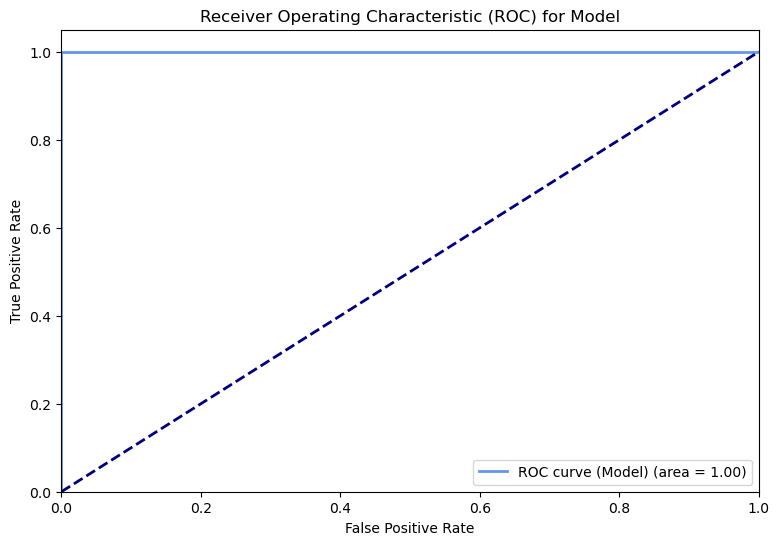

CPU times: total: 266 ms
Wall time: 241 ms


In [173]:
%%time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming binary classification (0 and 1)
lb = LabelBinarizer()

y_pred = lb.fit_transform(y_pred)

# Compute ROC curve and ROC area for each class for Model
fpr2, tpr2, _ = roc_curve(y_test, y_pred)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve for Model 2
plt.figure(figsize=(9, 6))
lw = 2

# Model ROC curve
plt.plot(fpr2, tpr2, color='cornflowerblue', lw=lw, label='ROC curve (Model) (area = %0.2f)' % roc_auc2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Model')
plt.legend(loc='lower right')
plt.show()


### Summary Conclusion:

>__In conclusion, Model achieves an exceptional ROC AUC of 1.0, indicating perfect discrimination between classes.__

>__Model showcases impeccable classification performance, with perfect precision, recall, and F1-scores for both classes, resulting in an accuracy of 1.0._ 


## ______________________________

## MODEL APPLICATION

### Make Predictions

In [174]:
%%time
# Make predictions using model1a
predictions = model.predict(
    [df.Station, df.Topic_Name, df.Sentiment_Label, 
     df.Sentiment_Score, df.Year, df.Month, df.Day]
)

2839/2839 [==============================] - 10s 3ms/step
CPU times: total: 23.3 s
Wall time: 12.2 s


In [175]:
%%time
predictions.shape, df.shape

CPU times: total: 0 ns
Wall time: 0 ns


((90847, 1), (90847, 13))

In [176]:
%%time
# Adjust the threshold as needed
threshold = 0.5
predicted_labels = [1 if pred > threshold else 0 for pred in predictions]

# Add the predicted labels to your DataFrame
df['Predicted_PopularityLabel'] = predicted_labels

CPU times: total: 297 ms
Wall time: 295 ms


In [177]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90847 entries, 0 to 94857
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Station                    90847 non-null  int32  
 1   Show                       90847 non-null  int32  
 2   No_StopWord                90847 non-null  object 
 3   Year                       90847 non-null  int64  
 4   Month                      90847 non-null  int64  
 5   Day                        90847 non-null  int64  
 6   Season                     90847 non-null  object 
 7   Cluster_Name               90847 non-null  int32  
 8   Topic_Name                 90847 non-null  int32  
 9   Overall_Trend_Score        90847 non-null  float64
 10  PopularityLabel            90847 non-null  int64  
 11  Sentiment_Label            90847 non-null  int64  
 12  Sentiment_Score            90847 non-null  float64
 13  Predicted_PopularityLabel  90847 non-null  int

### Feature Embeddings/Weights:


Feature embeddings and weights are fundamental components of our recommendation system. These embeddings capture the relationships between different features in our dataset, such as media stations, topics, sentiments, and more. These relationships are learned and encoded during the training of our ANN model. By using these embeddings, we can measure the similarity or relevance between various features. This is crucial for identifying topics, sentiments, and media stations that are closely related, enabling us to make informed recommendations


### Extract the embeddings from the Model

>* After training, we extract the embeddings from the trained model. We use the model.get_layer() function to retrieve the embeddings layers and their weights.

#### Visualize the model architecture

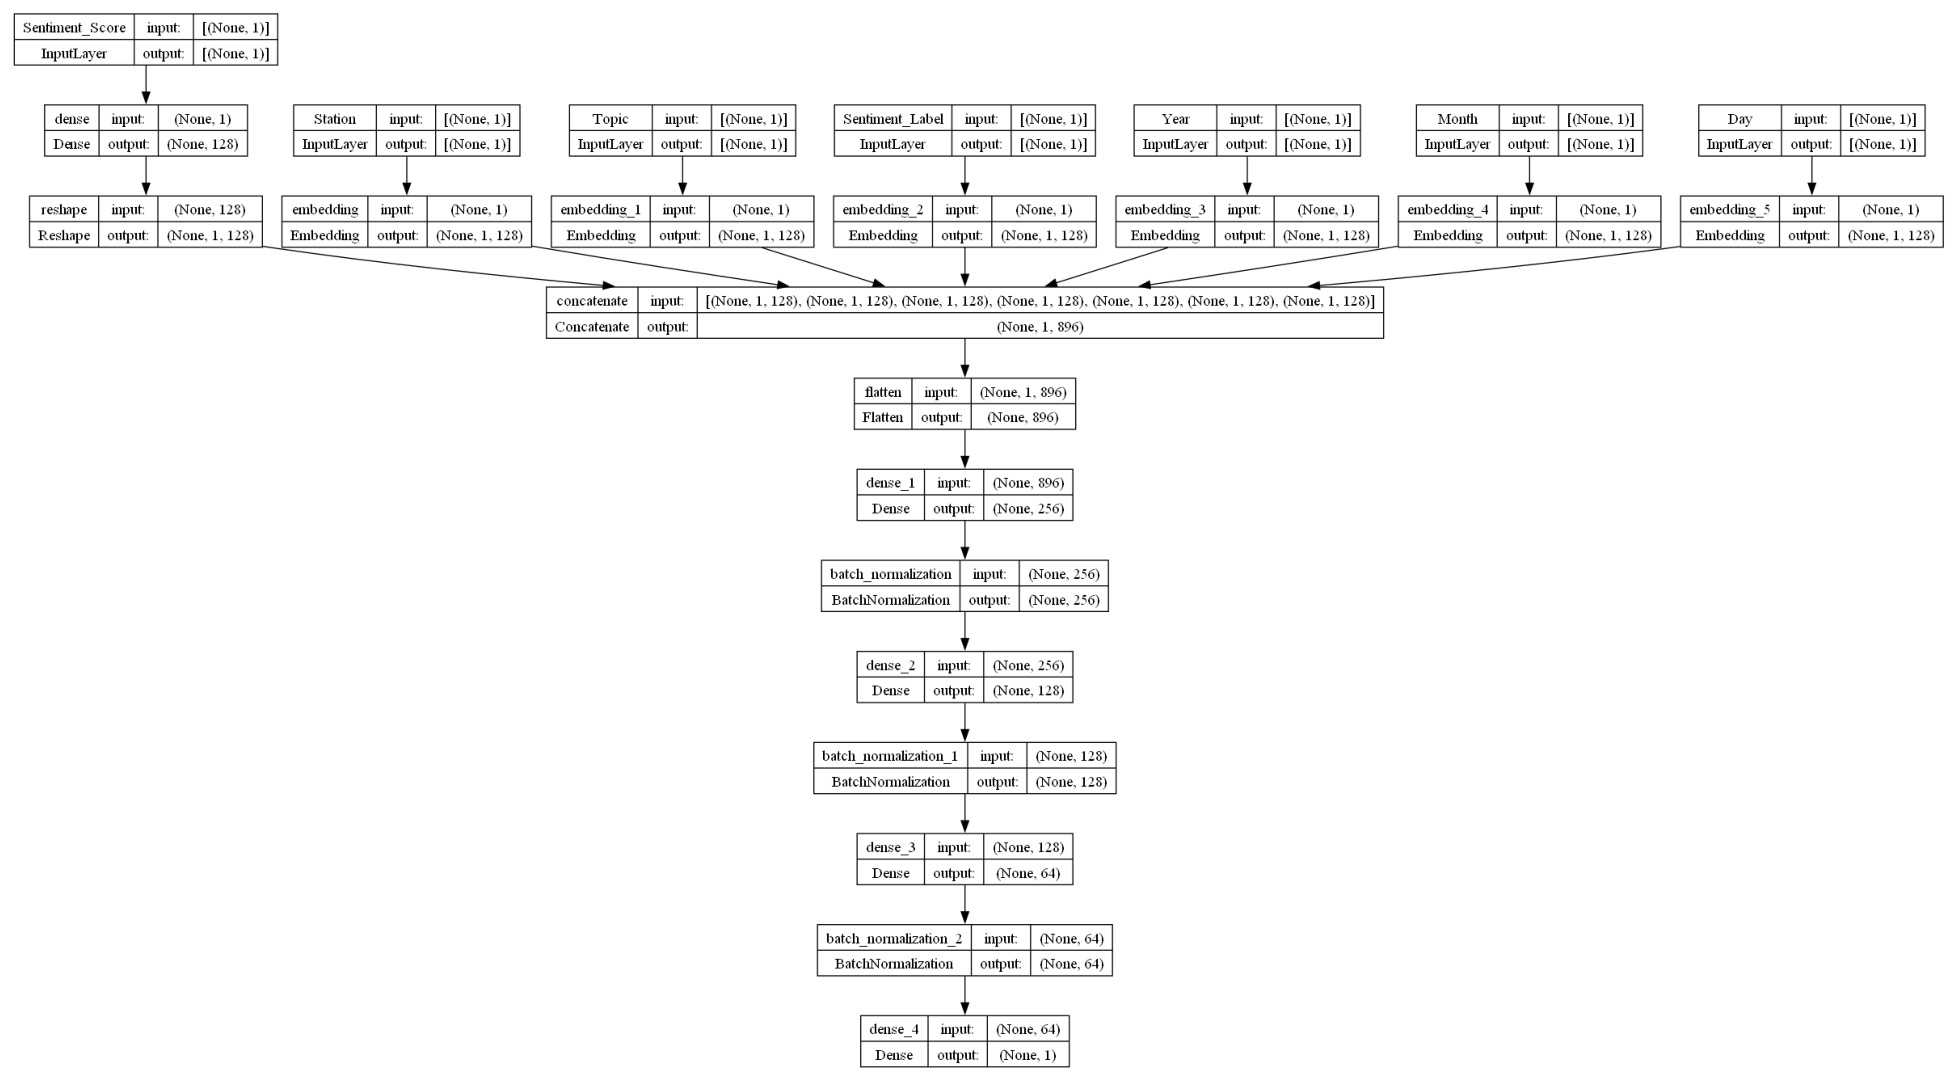

CPU times: total: 4.25 s
Wall time: 5.33 s


In [178]:
%%time
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the visualization
img = plt.imread('model.png')
plt.figure(figsize=(25, 25))
plt.imshow(img)
plt.axis('off')
plt.show()


### Model Breakdown

>1. __Input Layers:__
        These layers define the input features of your model. Each InputLayer corresponds to a specific feature in your dataset, such as Sentiment_Score, Station, Topic, Sentiment_Label, Year, Month, and Day.

>2. __Embedding Layers:__
        Embedding layers are used to convert categorical variables (like Station, Topic, Sentiment_Label, Year, Month, and Day) into dense numerical representations. These embeddings help the model learn relationships between different categories.
        Each Embedding layer takes in one of the categorical features and converts it into a dense vector of size 128.

>3. __Dense Layer for Sentiment_Score:__
        This is a Dense layer that processes the continuous feature Sentiment_Score. It has 128 units and applies the Rectified Linear Unit (ReLU) activation function.
        The purpose of this layer is to capture patterns and relationships within the Sentiment_Score feature.

>4. __Reshape Layer for Sentiment_Score:__
        After the Sentiment_Score is processed by the previous Dense layer, it is reshaped to ensure it has the same shape as the other embeddings, which is (1, 128).

>5. __Combine all Embeddings:__
        The Concatenate layer is used to combine all the embeddings. It takes the output of each Embedding layer (station, topic, sentiment label, sentiment score, year, month, and day) and concatenates them into a single tensor.
        This step combines the information from all categorical features and the processed Sentiment_Score.

>6. __Flatten Layer:__
        The Flatten layer takes the combined embeddings and flattens them into a 1D tensor. This prepares the data for the subsequent dense layers.

>7. __Additional Dense Layers:__
        Several Dense layers are added for further processing and feature transformation.
        Dense(10, activation='relu'): This layer consists of 10 units and uses the Rectified Linear Unit (ReLU) activation function.

>8. __BatchNormalization():__ A BatchNormalization layer is applied to normalize the activations.
>9. __Dense(1, activation='sigmoid'):__ The final output layer has one unit and uses the sigmoid activation function, which is common for binary classification tasks.

>10. __Model Compilation:__
        The model is compiled using binary cross-entropy loss, which is a common choice for binary classification.
        It is set to calculate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and accuracy during training.


#### List of existing layer names

In [179]:
%%time
# Get the list of existing layer names
existing_layer_names = [layer.name for layer in model.layers]

# Print the list of existing layer names
print("Existing Layer Names:")
for layer_name in existing_layer_names:
    print(layer_name)


Existing Layer Names:
Sentiment_Score
Station
Topic
Sentiment_Label
dense
Year
Month
Day
embedding
embedding_1
embedding_2
reshape
embedding_3
embedding_4
embedding_5
concatenate
flatten
dense_1
batch_normalization
dense_2
batch_normalization_1
dense_3
batch_normalization_2
dense_4
CPU times: total: 0 ns
Wall time: 491 µs


### Extract Embeddings

In [250]:
# Create a list to store the embedding layers in order
embedding_layers = []

# Loop through the layers in the model and add the embedding layers to the list
for layer in model.layers:
    if 'embedding' in layer.name:
        embedding_layers.append(layer)

# Assign the embedding layers to their respective variables
if len(embedding_layers) >= 6:
    station_embedding_layer = embedding_layers[0]
    topic_embedding_layer = embedding_layers[1]
    sentiment_embedding_layer = embedding_layers[2]
    year_embedding_layer = embedding_layers[3]
    month_embedding_layer = embedding_layers[4]
    day_embedding_layer = embedding_layers[5]
else:
    # Handle the case where there are not enough embedding layers
    print("Not enough embedding layers found in the model.")

# Now, you can access the weights of the embedding layers if they exist
if station_embedding_layer:
    station_embeddings = station_embedding_layer.get_weights()[0]
if topic_embedding_layer:
    topic_embeddings = topic_embedding_layer.get_weights()[0]
if sentiment_embedding_layer:
    sentiment_embeddings = sentiment_embedding_layer.get_weights()[0]
if year_embedding_layer:
    year_embeddings = year_embedding_layer.get_weights()[0]
if month_embedding_layer:
    month_embeddings = month_embedding_layer.get_weights()[0]
if day_embedding_layer:
    day_embeddings = day_embedding_layer.get_weights()[0]

In [181]:
 day_embeddings.shape

(31, 128)

#### Store the embeddings in a dictionary

In [182]:

# Give unique IDs to each feature entries
station_id = df['Station'].unique()
topic_id = df['Topic_Name'].unique()
sentiment_id = df['Sentiment_Label'].unique()
year_id = df['Year'].unique()  # Unique IDs for Year
month_id = df['Month'].unique()  # Unique IDs for Month
day_id = df['Day'].unique()  # Unique IDs for Day

# Create dictionaries for each type of embedding
station_embeddings_dict = {station_id: embedding for station_id, embedding in zip(station_id, station_embeddings)}
topic_embeddings_dict = {topic_id: embedding for topic_id, embedding in zip(topic_id, topic_embeddings)}
sentiment_embeddings_dict = {sentiment_id: embedding for sentiment_id, embedding in zip(sentiment_id, sentiment_embeddings)}
year_embeddings_dict = {year_id: embedding for year_id, embedding in zip(year_id, year_embeddings)}  # Dictionary for Year embeddings
month_embeddings_dict = {month_id: embedding for month_id, embedding in zip(month_id, month_embeddings)}  # Dictionary for Month embeddings
day_embeddings_dict = {day_id: embedding for day_id, embedding in zip(day_id, day_embeddings)}  # Dictionary for Day embeddings


In [183]:
%%time
year_embeddings_dict

CPU times: total: 0 ns
Wall time: 0 ns


{8: array([ 6.86074933e-03,  2.35475563e-02,  3.06948572e-02, -4.20691147e-02,
        -1.53058898e-02,  3.36820036e-02,  3.98156829e-02,  2.75367461e-02,
         1.27127115e-02, -3.63476127e-02, -1.18837841e-02,  1.37138357e-02,
         1.25785140e-04, -1.21082459e-02, -1.07497526e-02,  4.33273576e-02,
         1.02454610e-02, -3.32789607e-02,  4.23759073e-02, -2.46562511e-02,
        -3.32246348e-02,  1.07385628e-02, -1.78884249e-02, -2.72050165e-02,
        -2.26431955e-02, -1.77508380e-04, -5.10458574e-02,  8.66404548e-03,
         9.11769550e-03, -1.29345991e-02, -9.49639920e-03, -7.79423537e-03,
         2.11732369e-02,  2.71537416e-02, -4.24034446e-02, -8.24060384e-03,
        -1.84552949e-02,  3.40799317e-02, -3.67497951e-02, -3.02174166e-02,
         3.32419127e-02,  3.23634082e-03,  3.53872366e-02, -2.81020477e-02,
         3.03659569e-02,  3.12984101e-02, -4.67995070e-02, -1.52637623e-02,
        -1.67506393e-02, -1.95077248e-02,  3.77189480e-02,  5.69005497e-05,
        -

In [184]:
%%time
month_embeddings_dict

CPU times: total: 0 ns
Wall time: 0 ns


{0: array([-0.01740332,  0.00481883,  0.04277971, -0.0013869 , -0.03565043,
         0.04106509, -0.02691413,  0.04691736, -0.00451669, -0.02342317,
         0.03684933, -0.01913217,  0.02240512, -0.03679485,  0.00173792,
         0.00821206,  0.00460482,  0.01480989, -0.03518708, -0.03684611,
        -0.02022662,  0.01404696,  0.03438327, -0.04088172,  0.00210061,
        -0.04095466,  0.04110062, -0.0387415 , -0.00352186,  0.00492973,
        -0.0394624 ,  0.04044376,  0.01847926,  0.01238951, -0.01552733,
        -0.00948073,  0.00732966,  0.03549575,  0.02137288, -0.00222656,
         0.04410586,  0.0373973 , -0.04325798,  0.01780164,  0.03784908,
        -0.01995514,  0.00625925, -0.0235896 , -0.0212006 ,  0.0277009 ,
        -0.01867264,  0.00662105,  0.00711229,  0.00126894, -0.04364089,
         0.03459929, -0.03787474,  0.04304747,  0.00633082,  0.04894254,
         0.04493955,  0.01732958,  0.03769105,  0.00613053, -0.01477749,
        -0.04643111,  0.01419358, -0.02193799, -

In [185]:
%%time
day_embeddings_dict

CPU times: total: 0 ns
Wall time: 0 ns


{30: array([ 0.0373055 ,  0.01721168,  0.00728014, -0.04435257,  0.00212919,
        -0.04438421, -0.01558827,  0.02124641,  0.03894494, -0.00876939,
        -0.04223739,  0.00133406, -0.03832126,  0.0022553 , -0.02987282,
         0.03479779, -0.01546002, -0.01599388,  0.03569956,  0.00226061,
        -0.01171127,  0.04205802,  0.03042289,  0.04041015, -0.00121024,
        -0.02273748, -0.04053578, -0.04213575,  0.04851399,  0.02714702,
        -0.02211961,  0.04334443, -0.03470775,  0.03450967, -0.02101869,
        -0.04834964,  0.04859558, -0.0226645 ,  0.03901496,  0.04410281,
        -0.01182037,  0.01757328,  0.0322892 ,  0.04677225, -0.03505783,
        -0.04541566,  0.03660584,  0.03387526, -0.04407935,  0.00441331,
         0.04851108, -0.03976381, -0.02137904,  0.0006847 , -0.00811535,
         0.02345029, -0.00543257,  0.00662405, -0.00488794,  0.00374297,
        -0.03571593, -0.01750178, -0.02580729,  0.03723408,  0.01925709,
        -0.01074244,  0.02476405, -0.02207215, 

In [186]:
%%time
print("Station Embeddings\n\n", station_embeddings_dict)

Station Embeddings

 {0: array([ 4.6411015e-02,  1.4803990e-02,  4.6650060e-02, -4.3277359e-03,
        9.7199837e-03,  6.5353271e-03,  9.2483023e-03,  2.5343092e-03,
       -4.9456902e-02,  3.4934185e-02,  3.9485861e-02,  2.0986039e-02,
        3.8699098e-02, -9.5110303e-03,  1.5067861e-02,  2.7030628e-02,
        3.2500524e-02, -5.0301980e-02,  4.5338016e-02, -4.8914019e-02,
        1.4145565e-02,  4.6105340e-02,  4.2916678e-02, -2.3825224e-02,
        2.2553083e-02,  3.6454264e-02, -1.9525342e-02,  4.9655002e-02,
       -2.8305965e-02, -1.6166363e-02,  2.8330384e-02, -2.9584575e-02,
        3.9222740e-02,  2.4786560e-02, -1.6372036e-02, -4.0786438e-02,
       -4.6866047e-03,  8.7295752e-03, -3.2538541e-02,  3.4003813e-02,
       -3.0950468e-02, -1.1129015e-02,  3.0189702e-02,  2.5256280e-02,
        2.6132537e-02,  6.4851497e-03, -7.0448583e-03, -4.5346435e-02,
       -3.5734199e-02,  6.1447737e-03, -3.7617691e-02, -1.7991543e-02,
        2.1875462e-02,  1.6061747e-02,  1.8792421e-0

In [187]:
%%time
print("Topic Embeddings:\n\n", topic_embeddings_dict)

Topic Embeddings:

 {5: array([ 0.05413122, -0.03368145, -0.00371336, -0.04857403, -0.04874134,
        0.01920035,  0.02697979,  0.0170009 , -0.01507852, -0.01059229,
        0.02834496,  0.04646258, -0.0198461 , -0.01055749,  0.01216402,
        0.00063311,  0.04074808,  0.02735646,  0.0467593 , -0.01922768,
       -0.00237048, -0.01745014,  0.0307128 , -0.02893334,  0.00774631,
       -0.00031103, -0.04280962,  0.0177958 , -0.02115713, -0.00927712,
       -0.04299623,  0.01144358, -0.0263484 ,  0.01035077,  0.01517786,
        0.00919488, -0.00597033, -0.01078784,  0.02244708, -0.03190282,
        0.03216674,  0.0377623 ,  0.05797117,  0.05881418,  0.02251786,
       -0.01732101,  0.02971635,  0.0203757 , -0.00855146,  0.01858011,
       -0.03245149,  0.0097047 ,  0.03196892, -0.00242189,  0.0183658 ,
        0.03129531,  0.05281707, -0.02067728, -0.01883913,  0.04080997,
        0.0325697 , -0.01326217, -0.01680063,  0.01556622, -0.05483465,
        0.05610748, -0.05166189,  0.0213

In [188]:
%%time
print("Sentiment Embeddings:\n\n", sentiment_embeddings_dict)

Sentiment Embeddings:

 {2: array([-0.03647203, -0.00343693,  0.04017525,  0.00624353, -0.00347949,
        0.04196151,  0.03683341,  0.03483405,  0.03530556,  0.00893557,
       -0.00897423, -0.02192517,  0.01142368,  0.01944431,  0.01253856,
       -0.00740535, -0.00995305,  0.02524449,  0.00399742,  0.00872513,
       -0.02276784, -0.05003585,  0.01024791, -0.03736611, -0.00357813,
       -0.02998681,  0.03121418, -0.01469317,  0.02275375,  0.01813321,
       -0.01141242, -0.03903954, -0.03436643,  0.00275471, -0.01919837,
        0.0213146 ,  0.03420185,  0.02716362,  0.01136121, -0.00999238,
       -0.00953881, -0.0446229 , -0.01381139,  0.00426629, -0.02815872,
       -0.00353458,  0.041555  , -0.0253475 , -0.0328504 ,  0.01116237,
        0.01505035, -0.00243296, -0.0011494 ,  0.01356156, -0.01871803,
        0.0035619 ,  0.00732772, -0.00638194,  0.04709621,  0.01805825,
        0.01283612,  0.01973592,  0.00282215,  0.01345881,  0.02201989,
        0.01944014, -0.01637443,  0.

### Embedding Space: Feature relationships

In [226]:
%%time
# Define topic names
topic_names = [
    'Awareness and Concerns',
    'Climate Action',
    'Global Warming Discourse',
    'Greenhouse Gas Emissions',
    'Human Impact',
    'News and Government Actions',
    'Policy and Agreements',
    'Political Actions',
    'Public Opinion',
    'Scientific Consensus'
]

# Define station names
stations = ['MSNBC', 'FOXNEWS', 'BBCNEWS', 'CNN']

CPU times: total: 0 ns
Wall time: 0 ns


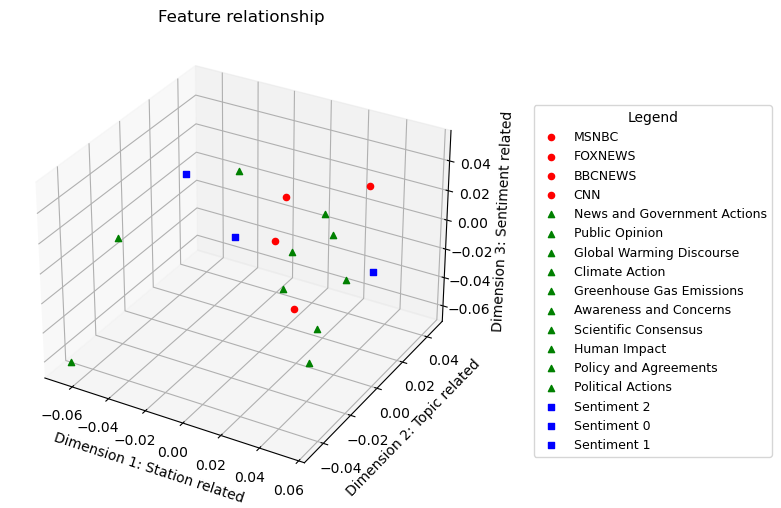

In [227]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
np.random.seed(42)

# Create a 3D scatter plot for station, topic, and sentiment embeddings
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create dictionaries for marker colors and styles
marker_colors = {'station': 'r', 'topic': 'g', 'sentiment': 'b'}
marker_styles = {'station': 'o', 'topic': '^', 'sentiment': 's'}

# Assuming you have already extracted the embeddings and created dictionaries
for station_id, embedding in station_embeddings_dict.items():
    ax.scatter(embedding[0], embedding[1], embedding[2], label=f"{stations[station_id]}", c=marker_colors['station'], marker=marker_styles['station'])

for topic_id, embedding in topic_embeddings_dict.items():
    ax.scatter(embedding[0], embedding[1], embedding[2], label=f"{topic_names[topic_id]}", c=marker_colors['topic'], marker=marker_styles['topic'])

for sentiment_id, embedding in sentiment_embeddings_dict.items():
    ax.scatter(embedding[0], embedding[1], embedding[2], label=f"Sentiment {sentiment_id}", c=marker_colors['sentiment'], marker=marker_styles['sentiment'])

ax.set_title("Feature relationship")
ax.set_xlabel("Dimension 1: Station related")
ax.set_ylabel("Dimension 2: Topic related")
ax.set_zlabel("Dimension 3: Sentiment related")

# Move the legend outside
ax.legend(title="Legend", bbox_to_anchor=(1.12, 0.85), loc='upper left', fontsize=9)

plt.show()


>* __Dimenstion 1:__ Station related features
>* __Dimenstion 2:__ Topic related features
>* __Dimenstion 3:__ Sentiment related features

> There are several topics with similar embeddings with stations on all the X-y-z dimenstion. 2 topics are quite weak realtionships with the rest. Stations are closely related to both topics and sentiments


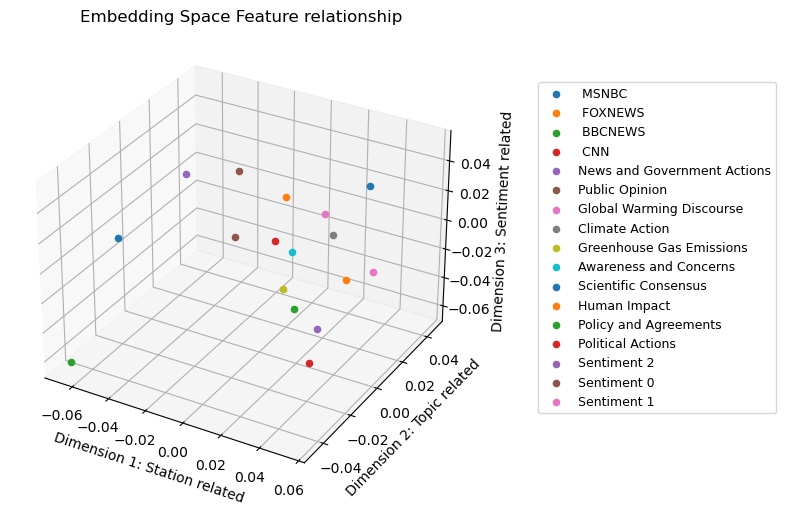

In [228]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
np.random.seed(42)

# Create a 3D scatter plot for station, topic, and sentiment embeddings
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming you have already extracted the embeddings and created dictionaries
for station_id, embedding in station_embeddings_dict.items():
    station_name = stations[station_id]  # Get the station name
    ax.scatter(embedding[0], embedding[1], embedding[2], label=f" {station_name}")

for topic_id, embedding in topic_embeddings_dict.items():
    ax.scatter(embedding[0], embedding[1], embedding[2], label=topic_names[topic_id])

for sentiment_id, embedding in sentiment_embeddings_dict.items():
    ax.scatter(embedding[0], embedding[1], embedding[2], label=f"Sentiment {sentiment_id}")

ax.set_title("Embedding Space Feature relationship")
ax.set_xlabel("Dimension 1: Station related")
ax.set_ylabel("Dimension 2: Topic related")
ax.set_zlabel("Dimension 3: Sentiment related")

# Move the legend outside
ax.legend(bbox_to_anchor=(1.13, 0.9), loc='upper left', fontsize=9)

plt.show()


### __Recommendations__

__Why Recommend topics with low sentiment:__
Pulling out low sentiment topics can serve several purposes in a recommendation system or content analysis. While it may not always be the primary focus, identifying topics associated with low sentiment can be valuable for various reasons:
>1. __Content Improvement:__ If certain topics consistently receive negative or low sentiment, it could signal issues with the content quality or how the topic is presented. Identifying these topics allows content creators to improve or revise the content to have a more positive impact on the audience.
>2. __User Experience:__ Content with low sentiment may not resonate well with the audience, potentially leading to a negative user experience. By identifying such topics, you can take steps to enhance user satisfaction by addressing the underlying issues.
>3. __Diversity and Balance:__ Recommending only topics with high sentiment can lead to a lack of diversity in content consumption. By including low sentiment topics, you can provide a more balanced and diverse range of recommendations to users.
> 4. __Content Relevance:__ Low sentiment does not necessarily mean that the content is irrelevant; it might simply reflect divisive or controversial topics. Recommending these topics can cater to users with different preferences and interests
>5. __Audience Engagement:__ In some cases, low sentiment topics may attract a specific audience interested in discussing or debating controversial subjects. Recommending these topics can enhance user engagement and encourage discussions.

In summary, pulling out low sentiment topics can help ensure a well-rounded and engaging user experience, improve content quality, and cater to a broader audience with diverse preferences. It's part of a more comprehensive recommendation strategy that considers both positive and negative sentiment topics.


### Cosine Similarity- Dot Product:

The dot product, in the context of a non personalized recommendation system, can be used to measure the similarity or relevance between stations (media outlets) and topics. It can be used to identify topics that are not receiving adequate attention in media coverage.

Here's how it is important to a recommendation system:

>*    Similarity Measurement: The dot product between embeddings (e.g., between a station and a topic) will be used to measure the similarity between them. If the dot product is high, it indicates that the station and topic are similar or related in some way. This can help you identify which topics are closely related to a particular station's coverage.

>*    Relevance Measurement: We shall use the dot product to calculate the relevance or interractions between stations and topics. If the dot product is low, it implies that there is low interractions between the station and the topic, and therefore, it could be recommended to increase coverage on that topic.

>*    Recommendation: By calculating dot products between all station-topic pairs, we identify topics that have low dot products with most stations, indicating they are not receiving adequate attention. Recommend for these low-similarity topics to stations are made to increase their coverage.

In this context, the dot product serves as a measure of station-topic affinity, allowing recommendations based on the similarity or relevance between media stations and topics. 

In [ ]:
min_year, max_year

### 1. Recommendation Component

In [229]:
# Define validate_input in the global scope
def validate_input(prompt, min_value, max_value):
    while True:
        user_input = input(prompt)
        try:
            value = int(user_input)
            if min_value <= value <= max_value:
                return value
            else:
                print(f"Value should be between {min_value} and {max_value}.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")


In [241]:
%%time
#np.random.seed(42)
# ANSI escape codes for bold and color (you can change the color code as needed)
bold_and_color = "\033[1;31m"  # 1 for bold, 31 for red text

# Reset ANSI escape codes for text formatting
reset_format = "\033[0m"

# Define your stations here
stations = ["MSNBC", "FOXNEWS", "BBCNEWS", "CNN"]

def recommendations(df, current_year, current_month, current_day):
#    min_year, max_year = 2009, 2020 

    
#     current_year = validate_input(f"Enter the year ({min_year}-{max_year}): ", min_year, max_year)
#     current_month = validate_input("Enter the month (e.g., 1-12): ", 1, 12)
#     current_day = validate_input("Enter the day (e.g., 1-31): ", 1, 31)


    # Call the Embeddings and their sizes
    station_embeddings = np.array(list(station_embeddings_dict.values()))
    topic_embeddings = np.array(list(topic_embeddings_dict.values()))
    sentiment_embeddings = np.array(list(sentiment_embeddings_dict.values()))

    # Calculate dot products for each station-topic pair
    station_topic_dot_products = np.dot(station_embeddings, topic_embeddings.T)
    # Calculate dot products for each station-sentiment pair
    station_sentiment_dot_products = np.dot(station_embeddings, sentiment_embeddings.T)

    # Calculate the absolute values of dot products
    station_topic_dot_products = np.abs(station_topic_dot_products)
    station_sentiment_dot_products = np.abs(station_sentiment_dot_products)

    # Define the desired percentile
    percentile = 25

    # Calculate the threshold as the value at the desired percentile
    coverage_threshold = np.percentile(station_topic_dot_products, percentile)
    sentiment_threshold = np.percentile(station_sentiment_dot_products, percentile)

    # Generate the Lists for low coverage and Low Sentiment Topics
    low_coverage_topics = {}
    for i, station in enumerate(stations):
        low_coverage_indices = np.where(station_topic_dot_products[i] < coverage_threshold)[0]
        low_coverage_topic_names = [topic_names[j] for j in low_coverage_indices]
        low_coverage_values = station_topic_dot_products[i, low_coverage_indices]
        low_coverage_topics[station] = list(zip(low_coverage_topic_names, low_coverage_values))

#     print(bold_and_color + "-------------------------------------------------\nRecommended Topics per Station with Low Coverage:\n-------------------------------------------------" + reset_format)
    print(bold_and_color + f"-------------------------------------------------\nRecommended Topics per Station with Low Coverage: ({current_year}-{current_month}-{current_day}) \n" + "-------------------------------------------------" + reset_format)

    for station, topics_values in low_coverage_topics.items():
        print(bold_and_color + f" {station}:" + reset_format)
        for topic, value in topics_values:
            print(bold_and_color + f"   {topic}: {value}" + reset_format)

    low_sentiment_topics = {}

    for i, station in enumerate(stations):
        low_sentiment_indices = np.where(station_sentiment_dot_products[i] < sentiment_threshold)[0]
        low_sentiment_topic_names = [topic_names[j] for j in low_sentiment_indices]
        low_sentiment_values = station_sentiment_dot_products[i, low_sentiment_indices]
        low_sentiment_topics[station] = list(zip(low_sentiment_topic_names, low_sentiment_values))
#     print(bold_and_color + "-------------------------------------------------\nRecommended Topics per Station with Low Sentiment: ({current_year}-{current_month}-{current_day}) \n"\n-------------------------------------------------" + reset_format)
    print(bold_and_color + f"-------------------------------------------------\nRecommended Topics per Station with Low Sentiment: ({current_year}-{current_month}-{current_day}) \n" + "-------------------------------------------------" + reset_format)

          
    for station, topics_values in low_sentiment_topics.items():
        print(bold_and_color + f" {station}:" + reset_format)
        for topic, value in topics_values:
            print(bold_and_color + f"   {topic}: {value}" + reset_format)

    print(bold_and_color + '\n----------------------------------------------------------------------------------------------------------\n' + reset_format)

    # Set the Seaborn color palette
    sns.set_palette("deep")

    # Function to plot low coverage and low sentiment bar graphs for a given station
    def plot_station_graphs(station_name, low_coverage_data, low_sentiment_data, bar_width=0.4):
        topics_low_coverage = [topic[0] for topic in low_coverage_data.get(station_name, [])]
        values_low_coverage = [topic[1] for topic in low_coverage_data.get(station_name, [])]
        topics_low_sentiment = [topic[0] for topic in low_sentiment_data.get(station_name, [])]
        values_low_sentiment = [topic[1] for topic in low_sentiment_data.get(station_name, [])]

        plt.figure(figsize=(10, 5))

        if topics_low_coverage:
            plt.subplot(1, 2, 1)
            positions_low_coverage = list(range(len(topics_low_coverage)))
            colors_low_coverage = sns.color_palette("deep", len(topics_low_coverage))
            plt.bar(positions_low_coverage, values_low_coverage, width=bar_width, color=colors_low_coverage)
            plt.xticks(positions_low_coverage, topics_low_coverage, rotation=45, ha="right")
            plt.title(f"Low Coverage Topics for {station_name} ({current_year}-{current_month}-{current_day}) \n")
            plt.xlabel("Subject Areas")

        if topics_low_sentiment:
            plt.subplot(1, 2, 2)
            positions_low_sentiment = list(range(len(topics_low_sentiment)))
            colors_low_sentiment = sns.color_palette("deep", len(topics_low_sentiment))
            plt.bar(positions_low_sentiment, values_low_sentiment, width=bar_width, color=colors_low_sentiment)
            plt.xticks(positions_low_sentiment, topics_low_sentiment, rotation=45, ha="right")
            #plt.title(f"Low Sentiment Topics for {station_name} ({current_year}-{current_month}-{current_day}) \n")
            plt.title(f"Low Sentiment Topics for {station_name} ({current_year}-{current_month}-{current_day}) \n")

            plt.xlabel("Subject Areas")

        plt.tight_layout()
        plt.show()

    for station in stations:
        plot_station_graphs(station, low_coverage_topics, low_sentiment_topics, bar_width=0.4)
# Call the recommendations function
#recommendations(df, current_year, current_month, current_day)

CPU times: total: 0 ns
Wall time: 3.75 ms


### 2. Trending Coverage Areas Component

The combined trend scores plots provide valuable insights into the popularity and relevance of various topics related to a specific subject over different time periods, including yearly, monthly, and daily trends. These plots are particularly useful for understanding how different topics gain or lose prominence in the context of the subject.

>* __"Overall Trend Score":__
>        This bar chart displays the overall trend scores for each topic related to the subject.
>        The scores are calculated over multiple years, providing a long-term perspective on topic popularity.
>        Topics with higher bars indicate they have been consistently covered over the years.

>* __"Year Trend Score":__
>        This chart focuses on the trend scores for the current year (as specified by the user).
>        It highlights the recent popularity of each topic.
>        A high score suggests that a topic is currently being covered while low score implies a topic is not being given attention.

>*  __"Month Trend Score":__
>        This chart delves even deeper, offering insights into the popularity of topics within the current month.
>        It is especially useful for tracking short-term trends and assessing the subject's real-time coverage.

>*  __"Day Trend Score":__
>        The daily trend score chart shows how topics have been trending on a specific day, combining both year and month selections.
>        This is ideal for pinpointing recent spikes in interest or the emergence of unexpected trends.

These plots help decision-makers, analysts, and enthusiasts gain a comprehensive understanding of how specific topics within the subject matter evolve over time. By tracking trends on multiple timescales, users can make data-driven decisions, identify emerging interests, and respond to changing dynamics effectively.

In [334]:
%%time

def trending_coverage_areas(df, current_year, current_month, current_day):
    # Define the functions for calculating trends
    def calculate_yearly_trend(df):
        yearly_trend = df_trend.groupby(['Year', 'Topic_Name'])['Topic_Name'].count().unstack(fill_value=0)
        yearly_trend = yearly_trend.div(yearly_trend.sum(axis=1), axis=0)
        return yearly_trend

    def calculate_average_yearly_trend(df):
        yearly_trend = calculate_yearly_trend(df)
        average_yearly_trend = yearly_trend.mean()
        return average_yearly_trend

    def calculate_current_year_average_trend(df, current_year):
        current_year_data = df_trend[df_trend['Year'] == current_year]
        current_year_trend = current_year_data.groupby('Topic_Name')['Topic_Name'].count().div(current_year_data['Topic_Name'].count())
        return current_year_trend

    def calculate_current_month_average_trend(df, current_year, current_month):
        current_month_data = df_trend[(df_trend['Year'] == current_year) & (df_trend['Month'] == current_month)]
        current_month_trend = current_month_data.groupby('Topic_Name')['Topic_Name'].count().div(current_month_data['Topic_Name'].count())
        return current_month_trend

    def calculate_current_day_average_trend(df, current_year, current_month, current_day):
        current_day_data = df_trend[(df_trend['Year'] == current_year) & (df_trend['Month'] == current_month) & (df_trend['Day'] == current_day)]
        current_day_trend = current_day_data.groupby('Topic_Name')['Topic_Name'].count().div(current_day_data['Topic_Name'].count())
        return current_day_trend

#     current_year = int(input("Enter the current year: "))
#     current_month = int(input("Enter the current month: "))
#     current_day = int(input("Enter the current day: "))
    
    # Trend Scores Calculation
    trend_scores = {
        "Overall Trend Score": calculate_average_yearly_trend(df),
        f"Current Year Trend Score ({current_year})": calculate_current_year_average_trend(df, current_year),
        f"Current Month Trend Score ({current_year}-{current_month})": calculate_current_month_average_trend(df, current_year, current_month),
        f"Current Day Trend Score ({current_year}-{current_month}-{current_day})": calculate_current_day_average_trend(df, current_year, current_month, current_day)
    }
    
    # Create a stacked area chart
    yearly_scores = calculate_yearly_trend(df)
    
    # Stacked Area Chart
    plt.figure(figsize=(12, 6))
    yearly_scores.plot(kind='area', stacked=True, colormap='tab20', ax=plt.gca())
    plt.title('Topic Trends Over Time', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    

# Create subplots for bar charts
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Trending Media Coverage Areas", fontsize=16, color='green', y=0.93)

# Define the trend scores for different time intervals
    trend_scores = {
        "Overall Trend Score": calculate_average_yearly_trend(df),
        f"Current Year Trend Score ({current_year})": calculate_current_year_average_trend(df, current_year),
        f"Current Month Trend Score ({current_year}-{current_month})": calculate_current_month_average_trend(df, current_year, current_month),
        f"Current Day Trend Score ({current_year}-{current_month}-{current_day})": calculate_current_day_average_trend(df, current_year, current_month, current_day)
    }

    # Create bar charts for trend scores
    for i, (title, trend) in enumerate(trend_scores.items()):
        ax = axes[i // 2, i % 2]
        sns.barplot(x=topic_names, y=[trend.get(topic, 0) for topic in topic_names], ax=ax)
        ax.set_title(title)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        # Add data labels as percentages to the stacked area chart
        for topic in yearly_scores.columns:
            last_val = yearly_scores[topic].iloc[-1]
            ax.annotate(f"{topic}: {last_val * 100:.2f}%", xy=(current_year, last_val), fontsize=9, color='darkred')

        # Adjust the y-axis limits based on the maximum bar value
        max_bar_value = ax.patches[0].get_height()
        for p in ax.patches:
            max_bar_value = max(max_bar_value, p.get_height())
            ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9, color='darkred', xytext=(0, 5), textcoords='offset points')
        ax.set_ylim(0, max_bar_value + 0.1)  # Adjust the y-axis limits based on the maximum bar value

    plt.tight_layout(rect=[0, 0, 1, 0.94])

# Calling the function:
#trending_coverage_areas(df, current_year, current_month, current_day)


CPU times: total: 0 ns
Wall time: 0 ns


### 3. Coverage Popularity Analysis

In [342]:
%%time
def coverage_popularity_analysis(df, current_year, current_month, current_day):
    def categorize_topics(df, current_year, current_month, current_day):
        # Filter the DataFrame based on the current year, month, and day
        filtered_df = df[(df['Year'] == current_year) & (df['Month'] == current_month) & (df['Day'] == current_day)]

        # Calculate the mean Overall_Trend_Score and Sentiment_Score_y for each topic for the given day
        daily_topic_scores = filtered_df.groupby('Topic_Name').agg({
            'Overall_Trend_Score': 'mean',
            'Sentiment_Score': 'mean'
        }).reset_index()

        # Calculate the overall trend mean for the entire DataFrame
        overall_trend_mean = df['Overall_Trend_Score'].mean()

        # Determine the PopularityLabel based on the mean trend score for the day
        daily_topic_scores['Predicted_PopularityLabel'] = daily_topic_scores['Overall_Trend_Score'].apply(lambda x: 1 if x >= overall_trend_mean else 0)

        # Create a list of all topics mentioned in the DataFrame
        all_topics = df['Topic_Name'].unique()

        # Find the topics that were not mentioned on the given day
        not_mentioned_topics = [topic for topic in all_topics if topic not in daily_topic_scores['Topic_Name'].unique()]

        # Categorize topics into most popular, least popular, and not mentioned
        most_popular_topics = daily_topic_scores[daily_topic_scores['Predicted_PopularityLabel'] == 1]
        least_popular_topics = daily_topic_scores[daily_topic_scores['Predicted_PopularityLabel'] == 0]

        # Create DataFrames for not mentioned topics with default values
        not_mentioned_df = pd.DataFrame({'Topic_Name': not_mentioned_topics, 'Predicted_PopularityLabel': 0, 'Sentiment_Score': 0.0, 'Overall_Trend_Score': 0.0})
#         not_mentioned_df = pd.DataFrame({'Topic_Name': not_mentioned_topics, 'Predicted_PopularityLabel': 0, 'Sentiment_Score': 0.0, 'Overall_Trend_Score': 0.0})

        return most_popular_topics, least_popular_topics, not_mentioned_df

    most_popular_df, least_popular_df, not_mentioned_df = categorize_topics(df, current_year, current_month, current_day)
    
    
    # ANSI escape codes for bold and color (you can change the color code as needed)
    bold_and_color = "\033[1;31m"  # 1 for bold, 31 for red text

    # Reset ANSI escape codes for text formatting
    reset_format = "\033[0m"
    
    # Organize and display the resulting DataFrames
    print("------------------------------------------------------------------------")
    most_popular_df = most_popular_df[['Topic_Name', 'Overall_Trend_Score', 'Sentiment_Score', 'Predicted_PopularityLabel']]
    print(f"\n{bold_and_color}Most Mentioned Topics on {current_year}-{current_month}-{current_day}:\n")
    print(most_popular_df.to_string(index=False))

    print("\n------------------------------------------------------------------------")
    least_popular_df = least_popular_df[['Topic_Name', 'Overall_Trend_Score', 'Sentiment_Score', 'Predicted_PopularityLabel']]
    print(f"\nLeast Mentioned Climate Areas on {current_year}-{current_month}-{current_day}:\n")
    print(least_popular_df.to_string(index=False))
    
    print("------------------------------------------------------------------------\n")
    print(f"\nAreas not mentioned at all on: {current_year}-{current_month}-{current_day}:\n")
    print(not_mentioned_df.to_string(index=False))
    print("------------------------------------------------------------------------\n")

    # Create subplots for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle("\nPopularity Analysis (%)", fontsize=16, y=1.05, fontweight='bold')

    # Generate pie chart for Most Popular Topics
    weights = most_popular_df['Overall_Trend_Score'] / most_popular_df['Overall_Trend_Score'].sum()
    labels = most_popular_df['Topic_Name']
    axes[0].pie(most_popular_df['Overall_Trend_Score'], labels=most_popular_df['Topic_Name'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#     axes[0].set_title(f"Most Popular Topics(%) ({current_year}-{current_month}-{current_day})", color:'green', fontwight:'bold')
    axes[0].set_title(f"Most Popular Topics(%) ({current_year}-{current_month}-{current_day})", color='green', fontweight='bold', y=0.97)

    
    # Generate pie chart for Least Popular Topics
    weights = least_popular_df['Overall_Trend_Score'] / least_popular_df['Overall_Trend_Score'].sum()
    labels = least_popular_df['Topic_Name']
    axes[1].pie(least_popular_df['Overall_Trend_Score'], labels=least_popular_df['Topic_Name'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    axes[1].set_title(f"Least Popular Topics(%) ({current_year}-{current_month}-{current_day})", color='green', fontweight='bold', y=0.97)

    # Display the pie charts
    plt.show()


CPU times: total: 15.6 ms
Wall time: 13.1 ms


# ____________________________________

# SYSTEM INTEGRATION AND USER INTERFACE

Enter the year (2009-2020): 2015
Enter the month (e.g., 1-12): 3
Enter the day (e.g., 1-31): 6
-------------------------------------------------
Recommended Topics per Station with Low Coverage: (2015-3-6) 
-------------------------------------------------
 MSNBC:
   Climate Action: 0.0027348650619387627
   Public Opinion: 0.003255283460021019
 FOXNEWS:
   Global Warming Discourse: 0.00024520885199308395
   Greenhouse Gas Emissions: 0.002248282078653574
   Public Opinion: 0.00011792825534939766
 BBCNEWS:
   Policy and Agreements: 0.0025916644372045994
   Political Actions: 0.0023761913180351257
   Scientific Consensus: 0.0027597001753747463
 CNN:
   Global Warming Discourse: 0.0035642581060528755
   Public Opinion: 0.0013122293166816235
-------------------------------------------------
Recommended Topics per Station with Low Sentiment: (2015-3-6) 
-------------------------------------------------
 MSNBC:
 FOXNEWS:
   Climate Action: 0.0008923341520130634
 BBCNEWS:
   Climate Action: 0.

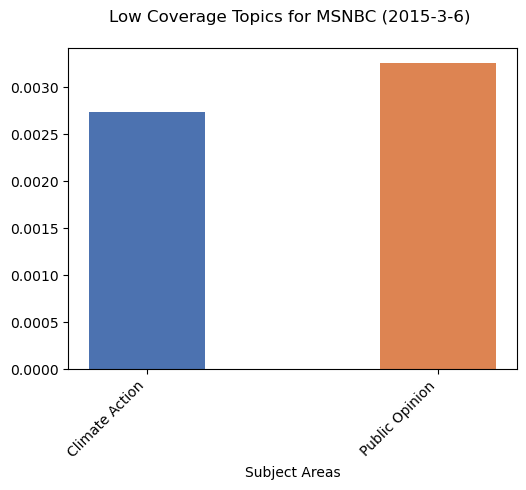

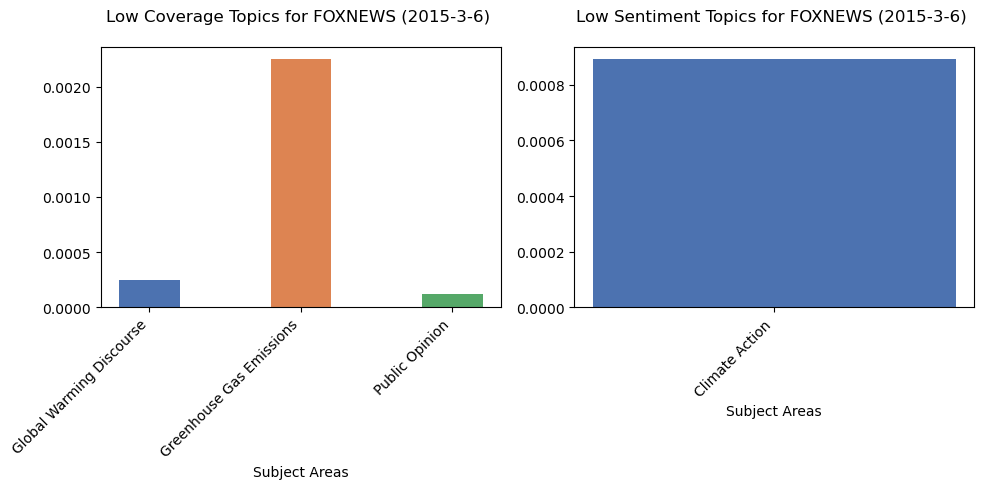

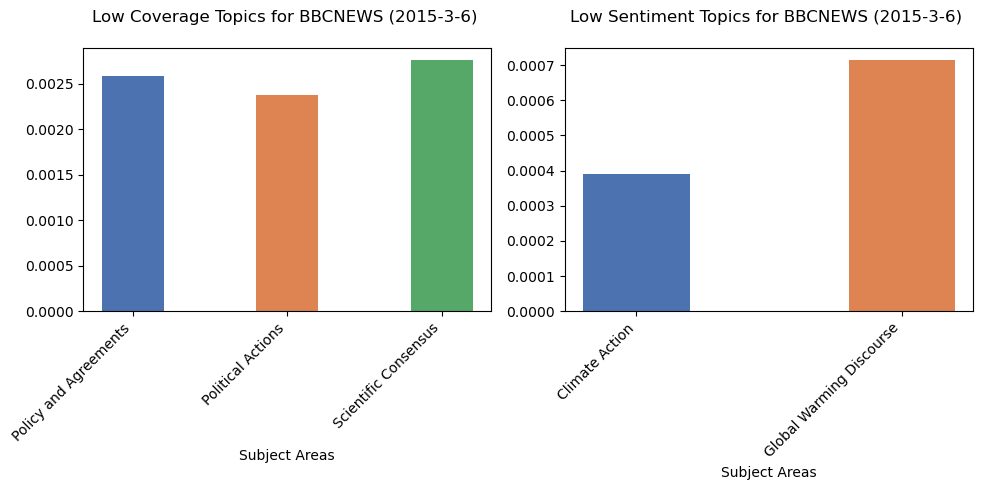

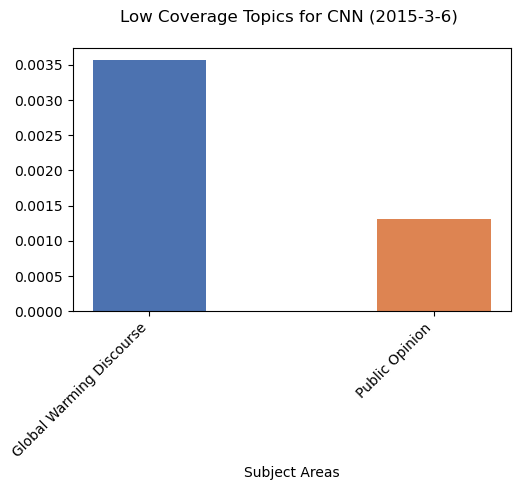

------------------------------------------------------------------------

Most Mentioned Topics on 2015-3-6:

           Topic_Name  Overall_Trend_Score  Sentiment_Score  Predicted_PopularityLabel
Policy and Agreements             0.193086         1.389851                          1
       Public Opinion             0.166694         1.089105                          1

------------------------------------------------------------------------

Least Mentioned Climate Areas on 2015-3-6:

              Topic_Name  Overall_Trend_Score  Sentiment_Score  Predicted_PopularityLabel
          Climate Action             0.074923         1.019276                          0
Global Warming Discourse             0.107898         1.231852                          0
Greenhouse Gas Emissions             0.059852         0.903291                          0
------------------------------------------------------------------------


Areas not mentioned at all on: 2015-3-6:

                 Topic_Name  Pred

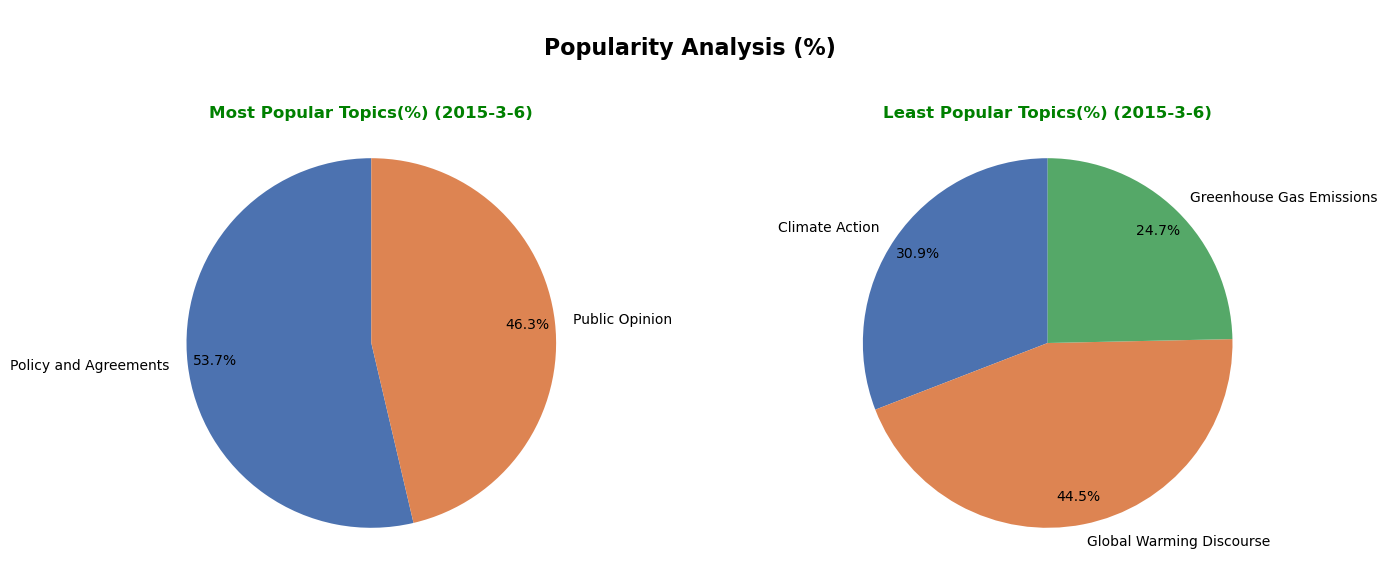

----------------------------------------------------------------
CPU times: total: 8.75 s
Wall time: 17.6 s


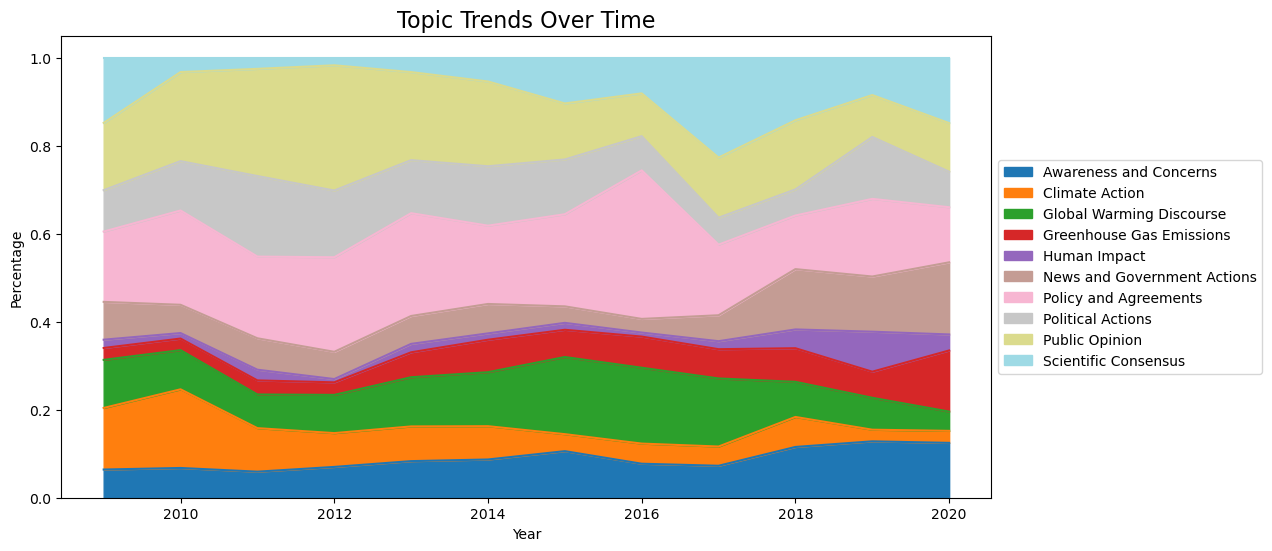

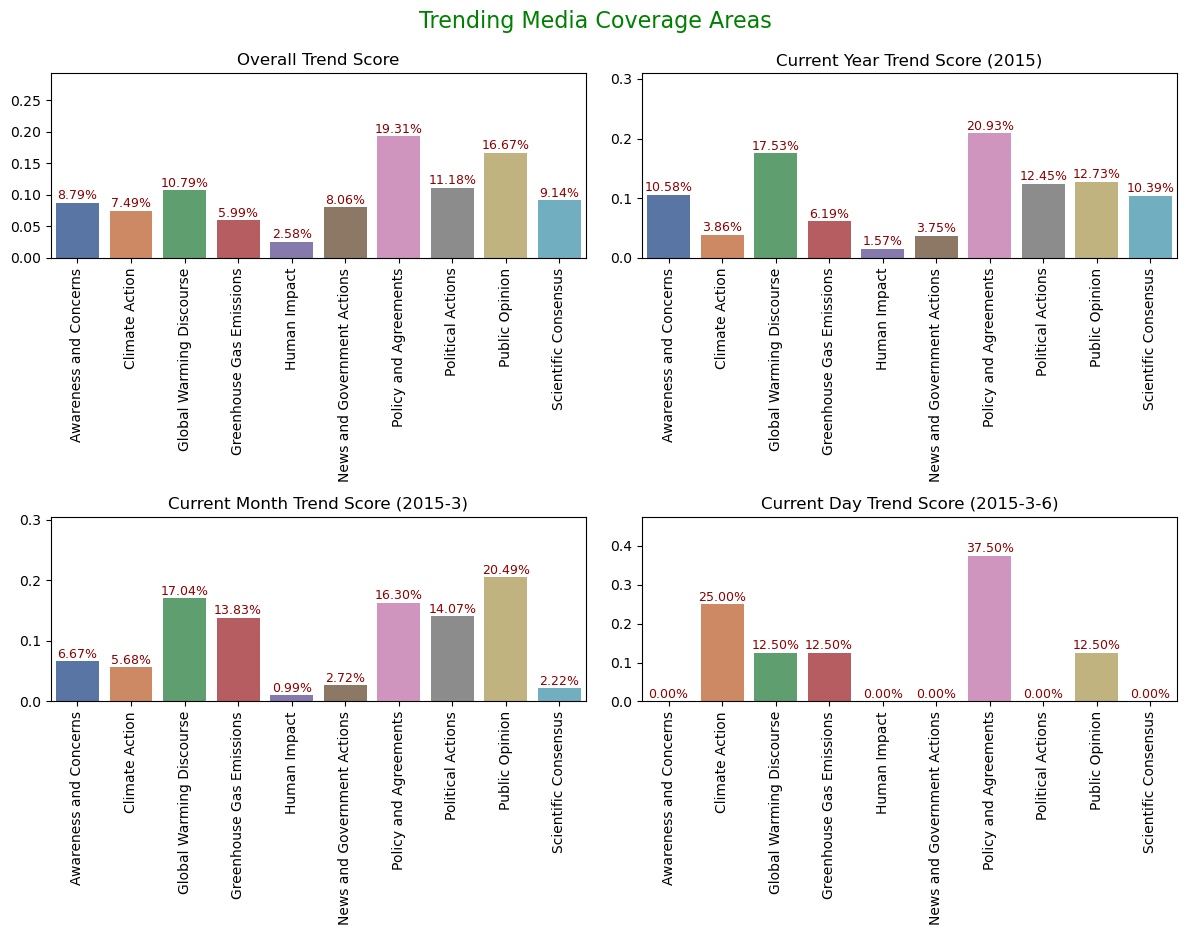

In [346]:
%%time
def intergrated_outputs(df, current_year, current_month, current_day):
    # Call the functions in sequence
    recommendations(df, current_year, current_month, current_day)
    coverage_popularity_analysis(df, current_year, current_month, current_day)
    trending_coverage_areas(df, current_year, current_month, current_day)
    #recommendations(df, current_year, current_month, current_day)

def get_input():
#Input the querry date    
    current_year = validate_input(f"Enter the year ({min_year}-{max_year}): ", min_year, max_year)
    current_month = validate_input("Enter the month (e.g., 1-12): ", 1, 12)
    current_day = validate_input("Enter the day (e.g., 1-31): ", 1, 31)

    return current_year, current_month, current_day

# Call this combined function
current_year, current_month, current_day = get_input()
intergrated_outputs(df_final, current_year, current_month, current_day)
print("----------------------------------------------------------------")
